# Summarize recorded interactions

In [1]:
# Import some useful modules
import json
import sys
import networkx
import pandas
import numpy

import matplotlib.pyplot as plotter
from pathlib import Path
from IPython.display import display, HTML

Specify the RESULTS_DIR used for recording interactions

In [2]:
DATA_DIR = Path("/home/ashinde/PhD/CaffineBravery/results/results_final/results_l3_fae_conf_bias/")
DATA_FILES = list(DATA_DIR.iterdir())

for _file in DATA_FILES:
    print(f"Using {_file}")

Using /home/ashinde/PhD/CaffineBravery/results/results_final/results_l3_fae_conf_bias/1280429864_attl0_pol_graph.json
Using /home/ashinde/PhD/CaffineBravery/results/results_final/results_l3_fae_conf_bias/544386226_attl0_pol_graph.json
Using /home/ashinde/PhD/CaffineBravery/results/results_final/results_l3_fae_conf_bias/314411620_defl1_active_pol_graph.json
Using /home/ashinde/PhD/CaffineBravery/results/results_final/results_l3_fae_conf_bias/1642679791_defl1_passive_pol_graph.json
Using /home/ashinde/PhD/CaffineBravery/results/results_final/results_l3_fae_conf_bias/247162961_attl2_pol_graph.json
Using /home/ashinde/PhD/CaffineBravery/results/results_final/results_l3_fae_conf_bias/2092709730_defl3_pol_graph.json
Using /home/ashinde/PhD/CaffineBravery/results/results_final/results_l3_fae_conf_bias/trace.0.json
Using /home/ashinde/PhD/CaffineBravery/results/results_final/results_l3_fae_conf_bias/trace.1.json
Using /home/ashinde/PhD/CaffineBravery/results/results_final/results_l3_fae_conf_b

In [3]:
# Common utility function for reading JSON from a file
def load_json(fname):

    data = None

    with open(fname) as f:
        data = json.load(f)

    return data

---
Take a look at the policy graphs of the agents

In [4]:
# Draw policy graphs
import graphviz


def get_edge_map(edges):
    start = 0
    edge_map = {}
    multi_edge_map = {}
    
    for src, children in edges.items():
        for obs, child in children.items():
            
            # index this observation if not already done
            if obs not in edge_map.keys():
                edge_map[obs] = start
                start += 1
                
            # Add obs to (src, dst) key
            if (src, child) not in multi_edge_map.keys():
                multi_edge_map[(src, child)] = [edge_map[obs]]
            
            else:
                _l = multi_edge_map[(src, child)]
                _l.append(edge_map[obs])
                multi_edge_map[(src, child)] = _l
                
    return edge_map, multi_edge_map


def get_graphviz_graph(json_data):
    
    # initialize empty graph
    G = graphviz.Digraph()
    
    nodes = json_data["nodes"]
    edges = json_data["edges"]
    
    edge_map, multi_edge_map = get_edge_map(edges)
    print(f"Edge map is:")
    for e, i in edge_map.items():
        print(f"{i}:{e}")

    for k, v in nodes.items():
        l = v["act"] + "_start" if "start" in v.keys() else v["act"]
        G.node(k, label=l, fontsize="12")
        
    for s, t in multi_edge_map.keys():
        G.edge(s, t, label=str(multi_edge_map[(s, t)]))
        
    return G

---
## Plot policy graphs

Displaying /home/ashinde/PhD/CaffineBravery/results/results_final/results_l3_fae_conf_bias/1280429864_attl0_pol_graph.json
Edge map is:
0:[(HostObs, none), (ActionResult, success), (ConnObs, active)]
1:[(HostObs, none), (ActionResult, success), (ConnObs, inactive)]
2:[(HostObs, user_files), (ActionResult, failure), (ConnObs, active)]
3:[(HostObs, user_files), (ActionResult, failure), (ConnObs, inactive)]
4:[(HostObs, user_files), (ActionResult, success), (ConnObs, active)]
5:[(HostObs, user_files), (ActionResult, success), (ConnObs, inactive)]
6:[(HostObs, none), (ActionResult, failure), (ConnObs, active)]
7:[(HostObs, none), (ActionResult, failure), (ConnObs, inactive)]


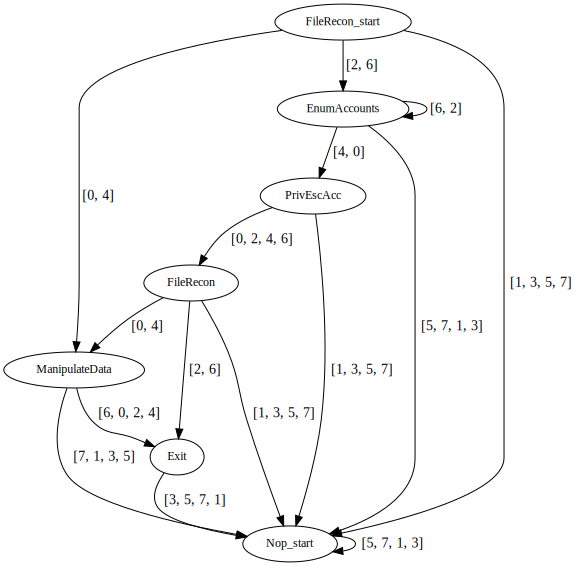

Displaying /home/ashinde/PhD/CaffineBravery/results/results_final/results_l3_fae_conf_bias/544386226_attl0_pol_graph.json
Edge map is:
0:[(HostObs, user_files), (ActionResult, failure), (ConnObs, inactive)]
1:[(HostObs, user_files), (ActionResult, success), (ConnObs, inactive)]
2:[(HostObs, none), (ActionResult, failure), (ConnObs, inactive)]
3:[(HostObs, none), (ActionResult, success), (ConnObs, inactive)]
4:[(HostObs, none), (ActionResult, success), (ConnObs, active)]
5:[(HostObs, user_files), (ActionResult, failure), (ConnObs, active)]
6:[(HostObs, user_files), (ActionResult, success), (ConnObs, active)]
7:[(HostObs, none), (ActionResult, failure), (ConnObs, active)]


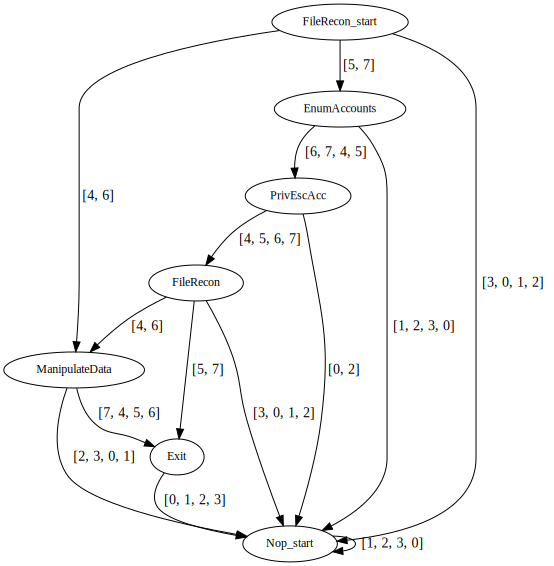

Displaying /home/ashinde/PhD/CaffineBravery/results/results_final/results_l3_fae_conf_bias/314411620_defl1_active_pol_graph.json
Edge map is:
0:[(EndPtAlerts, file_enum)]
1:[(EndPtAlerts, file_write)]
2:[(EndPtAlerts, none)]
3:[(EndPtAlerts, su_login)]


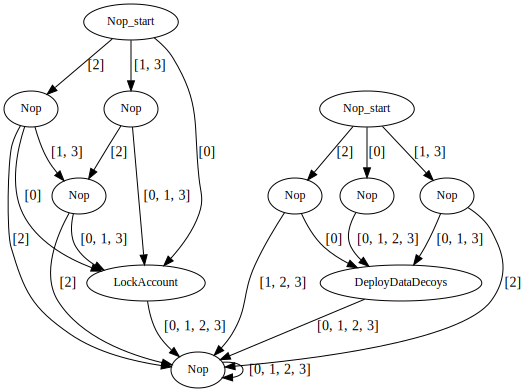

Displaying /home/ashinde/PhD/CaffineBravery/results/results_final/results_l3_fae_conf_bias/1642679791_defl1_passive_pol_graph.json
Edge map is:
0:[(EndPtAlerts, file_enum)]
1:[(EndPtAlerts, file_write)]
2:[(EndPtAlerts, none)]
3:[(EndPtAlerts, su_login)]


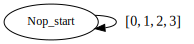

Displaying /home/ashinde/PhD/CaffineBravery/results/results_final/results_l3_fae_conf_bias/247162961_attl2_pol_graph.json
Edge map is:
0:[(HostObs, user_files), (ActionResult, success), (ConnObs, active)]
1:[(HostObs, user_files), (ActionResult, success), (ConnObs, inactive)]
2:[(HostObs, none), (ActionResult, failure), (ConnObs, active)]
3:[(HostObs, none), (ActionResult, failure), (ConnObs, inactive)]
4:[(HostObs, none), (ActionResult, success), (ConnObs, active)]
5:[(HostObs, none), (ActionResult, success), (ConnObs, inactive)]
6:[(HostObs, user_files), (ActionResult, failure), (ConnObs, active)]
7:[(HostObs, user_files), (ActionResult, failure), (ConnObs, inactive)]


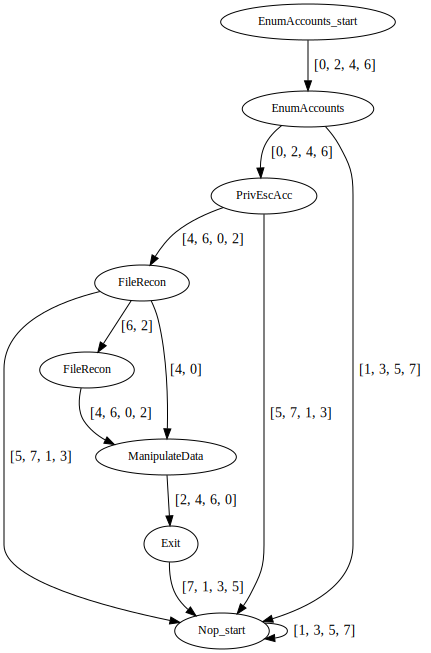

Displaying /home/ashinde/PhD/CaffineBravery/results/results_final/results_l3_fae_conf_bias/2092709730_defl3_pol_graph.json
Edge map is:
0:[(EndPtAlerts, file_enum)]
1:[(EndPtAlerts, file_write)]
2:[(EndPtAlerts, none)]
3:[(EndPtAlerts, su_login)]


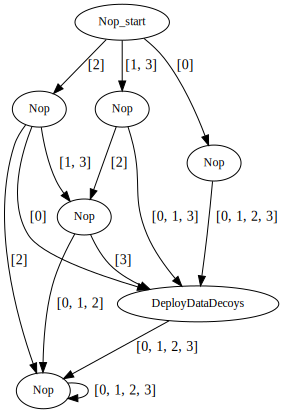

In [5]:
GRAPH_FILES = list(filter(lambda x: "pol_graph" in x.parts[-1], DATA_FILES))

for g in GRAPH_FILES:
    print(f"Displaying {g}")
    data = load_json(g)
    G = get_graphviz_graph(data)
    display(G)

---
Summarize the actual interactions

In [6]:
# Get the trace files
TRACE_FILES = list(filter(lambda x: "trace" in x.parts[-1], DATA_FILES))

for _file in TRACE_FILES:
    print(f"Using trace from {_file}")


Using trace from /home/ashinde/PhD/CaffineBravery/results/results_final/results_l3_fae_conf_bias/trace.0.json
Using trace from /home/ashinde/PhD/CaffineBravery/results/results_final/results_l3_fae_conf_bias/trace.1.json
Using trace from /home/ashinde/PhD/CaffineBravery/results/results_final/results_l3_fae_conf_bias/trace.2.json
Using trace from /home/ashinde/PhD/CaffineBravery/results/results_final/results_l3_fae_conf_bias/trace.3.json
Using trace from /home/ashinde/PhD/CaffineBravery/results/results_final/results_l3_fae_conf_bias/trace.4.json
Using trace from /home/ashinde/PhD/CaffineBravery/results/results_final/results_l3_fae_conf_bias/trace.5.json
Using trace from /home/ashinde/PhD/CaffineBravery/results/results_final/results_l3_fae_conf_bias/trace.6.json
Using trace from /home/ashinde/PhD/CaffineBravery/results/results_final/results_l3_fae_conf_bias/trace.7.json
Using trace from /home/ashinde/PhD/CaffineBravery/results/results_final/results_l3_fae_conf_bias/trace.8.json
Using trac

+++++++++++++++++++ Begin Interaction +++++++++++++++++++


,agent_i.thetaj.AttackerFrame.att,agent_i.observation.EndPtAlerts'
0,1.0,none
1,1.0,su_login
2,1.0,none
3,1.0,su_login
4,1.0,file_enum
5,1.0,file_write
6,1.0,file_write
7,1.0,none
8,1.0,file_write
9,1.0,none


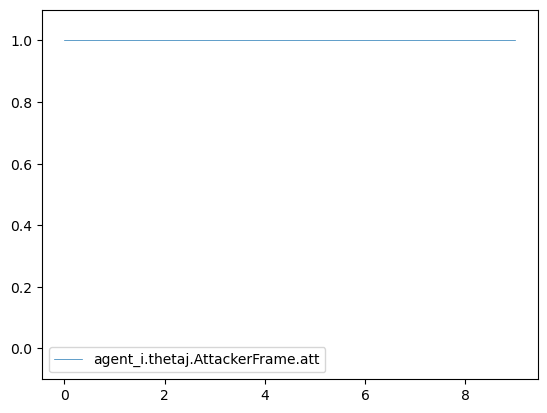

,agent_j.thetaj.DefFrame.highCap,agent_j.thetaj.DefFrame.lowCap,agent_j.observation.HostObs',agent_j.observation.ActionResult',agent_j.observation.ConnObs'
0,0.500000,0.500000,none,success,active
1,0.500000,0.500000,none,success,active
2,0.393939,0.606061,none,success,active
3,0.344262,0.655738,none,failure,active
4,0.298691,0.701309,none,failure,active
5,0.254573,0.745427,user_files,success,active
6,0.254573,0.745427,user_files,success,inactive
7,0.254573,0.745427,user_files,failure,inactive
8,0.254573,0.745427,none,failure,inactive
9,0.254573,0.745427,user_files,failure,inactive


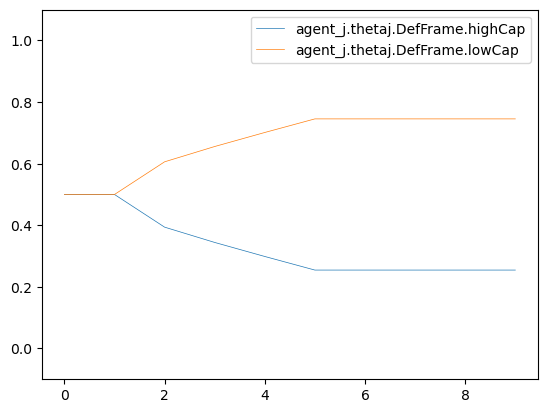

=============DataFound============


,state.DataFound.no,state.DataFound.yes,agent_i.action,agent_j.action
0,1.0,0.0,Nop,EnumAccounts
1,1.0,0.0,Nop,EnumAccounts
2,1.0,0.0,Nop,PrivEscAcc
3,1.0,0.0,Nop,FileRecon
4,1.0,0.0,Nop,FileRecon
5,1.0,0.0,Nop,ManipulateData
6,1.0,0.0,Nop,Exit
7,1.0,0.0,Nop,Nop
8,1.0,0.0,Nop,Nop
9,1.0,0.0,Nop,Nop


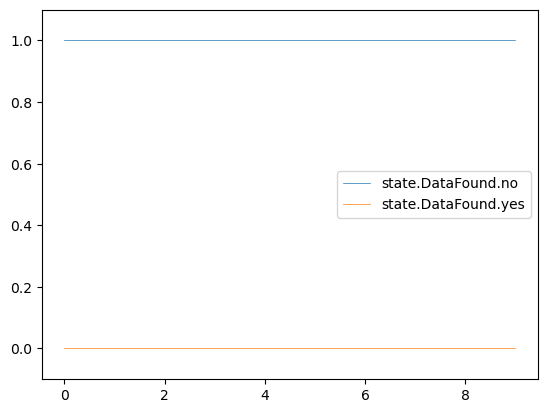

,agent_i.DataFound.no,agent_i.DataFound.yes,agent_i.action,agent_j.action,agent_i.observation.EndPtAlerts'
0,1.0,0.0,Nop,EnumAccounts,none
1,1.0,0.0,Nop,EnumAccounts,su_login
2,1.0,0.0,Nop,PrivEscAcc,none
3,1.0,0.0,Nop,FileRecon,su_login
4,1.0,0.0,Nop,FileRecon,file_enum
5,1.0,0.0,Nop,ManipulateData,file_write
6,1.0,0.0,Nop,Exit,file_write
7,1.0,0.0,Nop,Nop,none
8,1.0,0.0,Nop,Nop,file_write
9,1.0,0.0,Nop,Nop,none


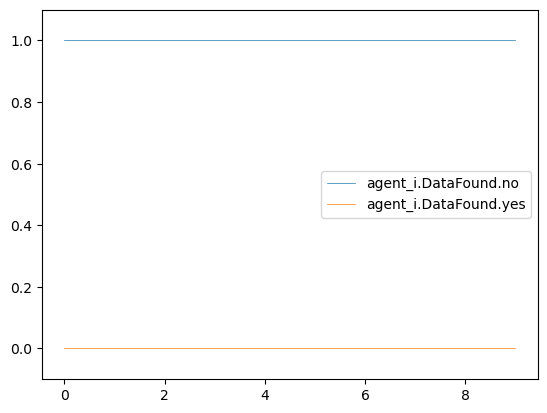

,agent_j.DataFound.no,agent_j.DataFound.yes,agent_j.action,agent_i.action,agent_j.observation.HostObs',agent_j.observation.ActionResult',agent_j.observation.ConnObs'
0,1.000000,0.000000,EnumAccounts,Nop,none,success,active
1,1.000000,0.000000,EnumAccounts,Nop,none,success,active
2,1.000000,0.000000,PrivEscAcc,Nop,none,success,active
3,1.000000,0.000000,FileRecon,Nop,none,failure,active
4,0.519605,0.480395,FileRecon,Nop,none,failure,active
5,0.548243,0.451757,ManipulateData,Nop,user_files,success,active
6,0.548243,0.451757,Exit,Nop,user_files,success,inactive
7,0.548243,0.451757,Nop,Nop,user_files,failure,inactive
8,0.548243,0.451757,Nop,Nop,none,failure,inactive
9,0.548243,0.451757,Nop,Nop,user_files,failure,inactive


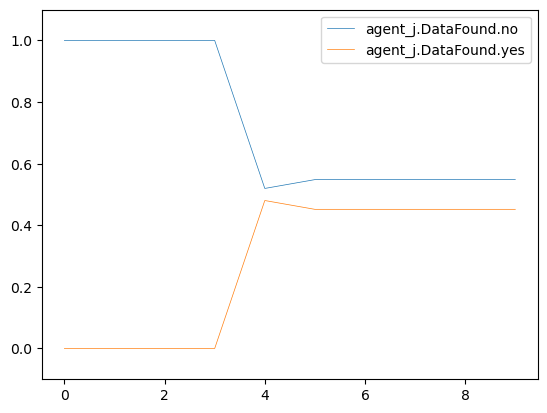

=============HostType============


,state.HostType.critical,state.HostType.critical_honeypot,state.HostType.honeypot,agent_i.action,agent_j.action
0,0.0,0.0,1.0,Nop,EnumAccounts
1,0.0,0.0,1.0,Nop,EnumAccounts
2,0.0,0.0,1.0,Nop,PrivEscAcc
3,0.0,0.0,1.0,Nop,FileRecon
4,0.0,0.0,1.0,Nop,FileRecon
5,0.0,0.0,1.0,Nop,ManipulateData
6,0.0,0.0,1.0,Nop,Exit
7,0.0,0.0,1.0,Nop,Nop
8,0.0,0.0,1.0,Nop,Nop
9,0.0,0.0,1.0,Nop,Nop


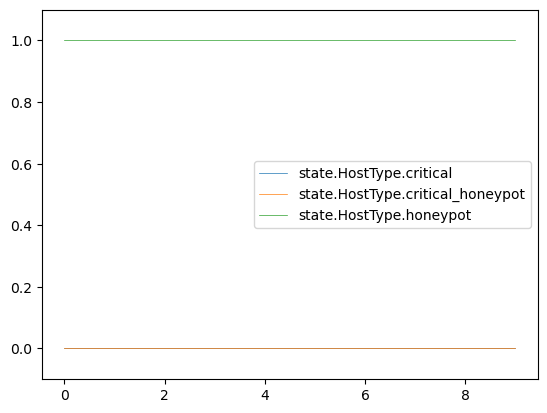

,agent_i.HostType.critical,agent_i.HostType.critical_honeypot,agent_i.HostType.honeypot,agent_i.action,agent_j.action,agent_i.observation.EndPtAlerts'
0,0.0,0.0,1.0,Nop,EnumAccounts,none
1,0.0,0.0,1.0,Nop,EnumAccounts,su_login
2,0.0,0.0,1.0,Nop,PrivEscAcc,none
3,0.0,0.0,1.0,Nop,FileRecon,su_login
4,0.0,0.0,1.0,Nop,FileRecon,file_enum
5,0.0,0.0,1.0,Nop,ManipulateData,file_write
6,0.0,0.0,1.0,Nop,Exit,file_write
7,0.0,0.0,1.0,Nop,Nop,none
8,0.0,0.0,1.0,Nop,Nop,file_write
9,0.0,0.0,1.0,Nop,Nop,none


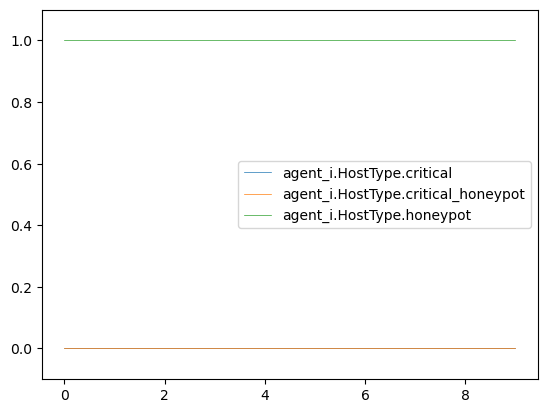

,agent_j.HostType.critical,agent_j.HostType.critical_honeypot,agent_j.HostType.honeypot,agent_j.action,agent_i.action,agent_j.observation.HostObs',agent_j.observation.ActionResult',agent_j.observation.ConnObs'
0,0.0,1.0,0.0,EnumAccounts,Nop,none,success,active
1,0.0,1.0,0.0,EnumAccounts,Nop,none,success,active
2,0.0,1.0,0.0,PrivEscAcc,Nop,none,success,active
3,0.0,1.0,0.0,FileRecon,Nop,none,failure,active
4,0.0,1.0,0.0,FileRecon,Nop,none,failure,active
5,0.0,1.0,0.0,ManipulateData,Nop,user_files,success,active
6,0.0,1.0,0.0,Exit,Nop,user_files,success,inactive
7,0.0,1.0,0.0,Nop,Nop,user_files,failure,inactive
8,0.0,1.0,0.0,Nop,Nop,none,failure,inactive
9,0.0,1.0,0.0,Nop,Nop,user_files,failure,inactive


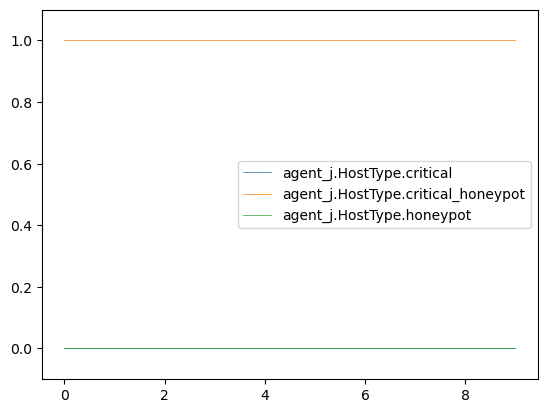

=============AccessLevel============


,state.AccessLevel.root,state.AccessLevel.user,agent_i.action,agent_j.action
0,0.0,1.0,Nop,EnumAccounts
1,0.0,1.0,Nop,EnumAccounts
2,0.0,1.0,Nop,PrivEscAcc
3,1.0,0.0,Nop,FileRecon
4,1.0,0.0,Nop,FileRecon
5,1.0,0.0,Nop,ManipulateData
6,1.0,0.0,Nop,Exit
7,1.0,0.0,Nop,Nop
8,1.0,0.0,Nop,Nop
9,1.0,0.0,Nop,Nop


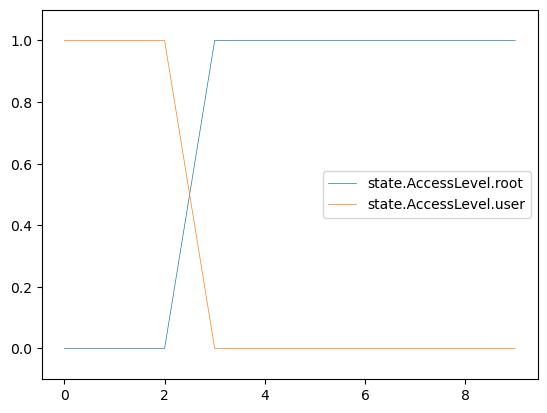

,agent_i.AccessLevel.root,agent_i.AccessLevel.user,agent_i.action,agent_j.action,agent_i.observation.EndPtAlerts'
0,0.000000,1.000000,Nop,EnumAccounts,none
1,0.000000,1.000000,Nop,EnumAccounts,su_login
2,0.000000,1.000000,Nop,PrivEscAcc,none
3,0.019800,0.980200,Nop,FileRecon,su_login
4,0.019800,0.980200,Nop,FileRecon,file_enum
5,0.114368,0.885632,Nop,ManipulateData,file_write
6,0.469506,0.530494,Nop,Exit,file_write
7,0.469506,0.530494,Nop,Nop,none
8,0.469506,0.530494,Nop,Nop,file_write
9,0.469506,0.530494,Nop,Nop,none


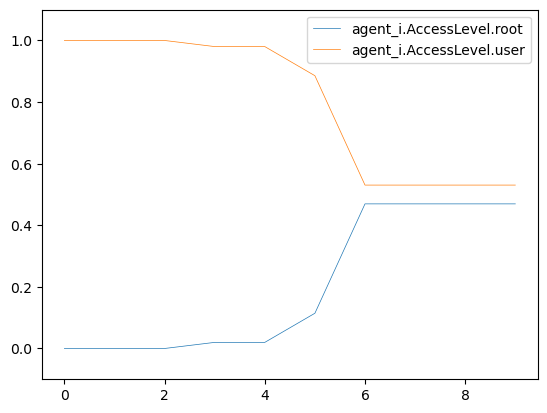

,agent_j.AccessLevel.root,agent_j.AccessLevel.user,agent_j.action,agent_i.action,agent_j.observation.HostObs',agent_j.observation.ActionResult',agent_j.observation.ConnObs'
0,0.000000,1.000000,EnumAccounts,Nop,none,success,active
1,0.000000,1.000000,EnumAccounts,Nop,none,success,active
2,0.000000,1.000000,PrivEscAcc,Nop,none,success,active
3,0.960175,0.039825,FileRecon,Nop,none,failure,active
4,0.955546,0.044454,FileRecon,Nop,none,failure,active
5,0.950134,0.049866,ManipulateData,Nop,user_files,success,active
6,0.950134,0.049866,Exit,Nop,user_files,success,inactive
7,0.950134,0.049866,Nop,Nop,user_files,failure,inactive
8,0.950134,0.049866,Nop,Nop,none,failure,inactive
9,0.950134,0.049866,Nop,Nop,user_files,failure,inactive


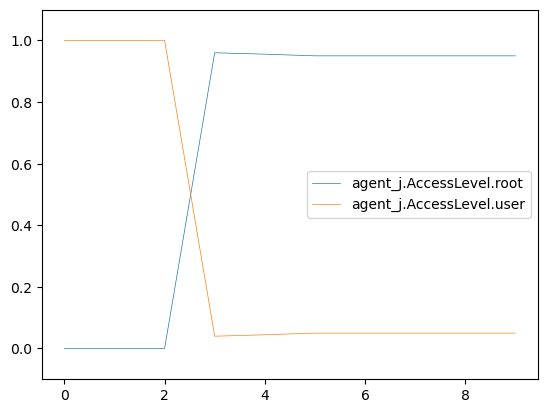

=============DataPrivs============


,state.DataPrivs.root,state.DataPrivs.user,agent_i.action,agent_j.action
0,1.0,0.0,Nop,EnumAccounts
1,1.0,0.0,Nop,EnumAccounts
2,1.0,0.0,Nop,PrivEscAcc
3,1.0,0.0,Nop,FileRecon
4,1.0,0.0,Nop,FileRecon
5,1.0,0.0,Nop,ManipulateData
6,1.0,0.0,Nop,Exit
7,1.0,0.0,Nop,Nop
8,1.0,0.0,Nop,Nop
9,1.0,0.0,Nop,Nop


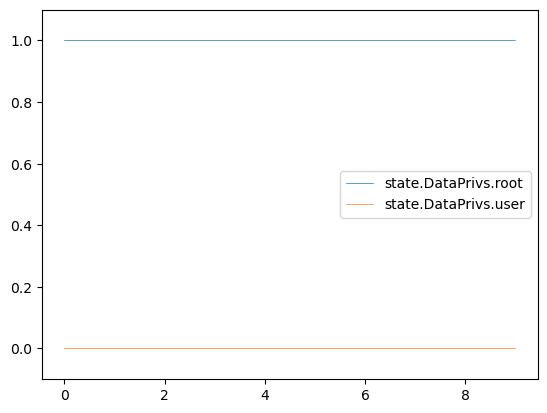

,agent_i.DataPrivs.root,agent_i.DataPrivs.user,agent_i.action,agent_j.action,agent_i.observation.EndPtAlerts'
0,1.0,0.0,Nop,EnumAccounts,none
1,1.0,0.0,Nop,EnumAccounts,su_login
2,1.0,0.0,Nop,PrivEscAcc,none
3,1.0,0.0,Nop,FileRecon,su_login
4,1.0,0.0,Nop,FileRecon,file_enum
5,1.0,0.0,Nop,ManipulateData,file_write
6,1.0,0.0,Nop,Exit,file_write
7,1.0,0.0,Nop,Nop,none
8,1.0,0.0,Nop,Nop,file_write
9,1.0,0.0,Nop,Nop,none


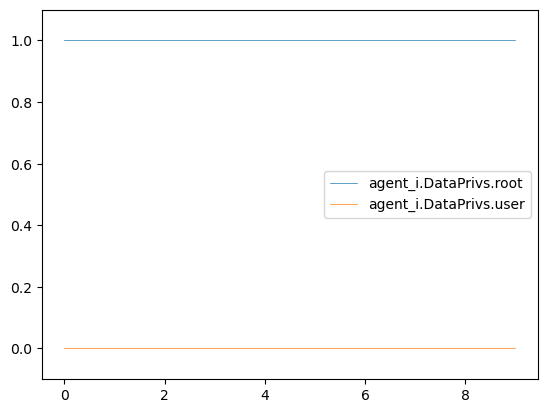

,agent_j.DataPrivs.root,agent_j.DataPrivs.user,agent_j.action,agent_i.action,agent_j.observation.HostObs',agent_j.observation.ActionResult',agent_j.observation.ConnObs'
0,0.500000,0.500000,EnumAccounts,Nop,none,success,active
1,0.500000,0.500000,EnumAccounts,Nop,none,success,active
2,0.500000,0.500000,PrivEscAcc,Nop,none,success,active
3,0.500000,0.500000,FileRecon,Nop,none,failure,active
4,0.502411,0.497589,FileRecon,Nop,none,failure,active
5,0.505229,0.494771,ManipulateData,Nop,user_files,success,active
6,0.505229,0.494771,Exit,Nop,user_files,success,inactive
7,0.505229,0.494771,Nop,Nop,user_files,failure,inactive
8,0.505229,0.494771,Nop,Nop,none,failure,inactive
9,0.505229,0.494771,Nop,Nop,user_files,failure,inactive


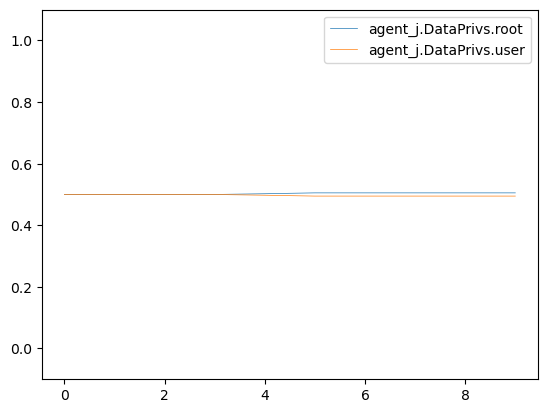

=============EscAccounts============


,state.EscAccounts.no,state.EscAccounts.yes,agent_i.action,agent_j.action
0,0.0,1.0,Nop,EnumAccounts
1,0.0,1.0,Nop,EnumAccounts
2,0.0,1.0,Nop,PrivEscAcc
3,0.0,1.0,Nop,FileRecon
4,0.0,1.0,Nop,FileRecon
5,0.0,1.0,Nop,ManipulateData
6,0.0,1.0,Nop,Exit
7,0.0,1.0,Nop,Nop
8,0.0,1.0,Nop,Nop
9,0.0,1.0,Nop,Nop


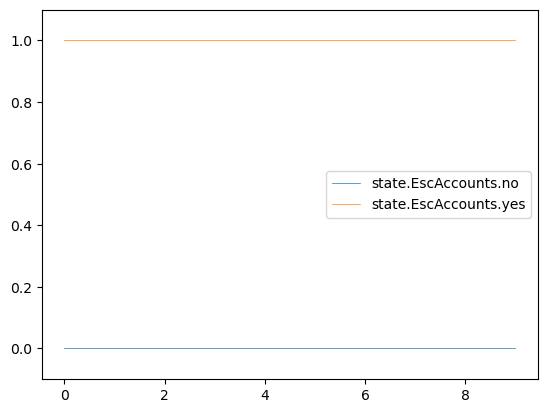

,agent_i.EscAccounts.no,agent_i.EscAccounts.yes,agent_i.action,agent_j.action,agent_i.observation.EndPtAlerts'
0,0.0,1.0,Nop,EnumAccounts,none
1,0.0,1.0,Nop,EnumAccounts,su_login
2,0.0,1.0,Nop,PrivEscAcc,none
3,0.0,1.0,Nop,FileRecon,su_login
4,0.0,1.0,Nop,FileRecon,file_enum
5,0.0,1.0,Nop,ManipulateData,file_write
6,0.0,1.0,Nop,Exit,file_write
7,0.0,1.0,Nop,Nop,none
8,0.0,1.0,Nop,Nop,file_write
9,0.0,1.0,Nop,Nop,none


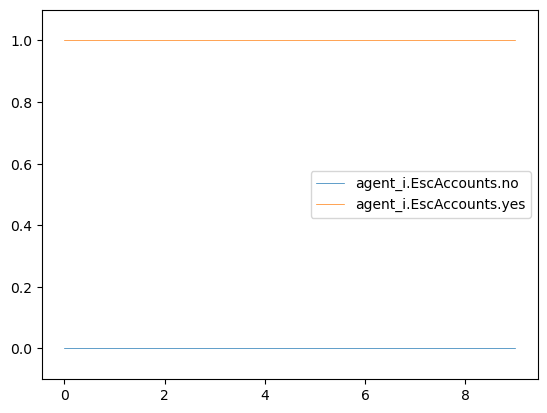

,agent_j.EscAccounts.no,agent_j.EscAccounts.yes,agent_j.action,agent_i.action,agent_j.observation.HostObs',agent_j.observation.ActionResult',agent_j.observation.ConnObs'
0,0.500000,0.500000,EnumAccounts,Nop,none,success,active
1,0.408682,0.591318,EnumAccounts,Nop,none,success,active
2,0.312959,0.687041,PrivEscAcc,Nop,none,success,active
3,0.039430,0.960569,FileRecon,Nop,none,failure,active
4,0.044014,0.955986,FileRecon,Nop,none,failure,active
5,0.049372,0.950628,ManipulateData,Nop,user_files,success,active
6,0.049372,0.950628,Exit,Nop,user_files,success,inactive
7,0.049372,0.950628,Nop,Nop,user_files,failure,inactive
8,0.049372,0.950628,Nop,Nop,none,failure,inactive
9,0.049372,0.950628,Nop,Nop,user_files,failure,inactive


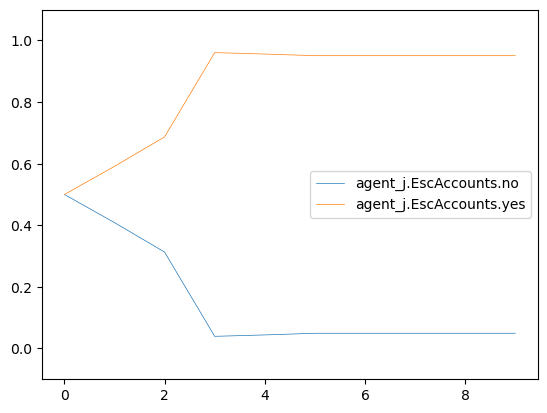

=============AccFound============


,state.AccFound.no,state.AccFound.yes,agent_i.action,agent_j.action
0,1.0,0.0,Nop,EnumAccounts
1,0.0,1.0,Nop,EnumAccounts
2,0.0,1.0,Nop,PrivEscAcc
3,0.0,1.0,Nop,FileRecon
4,0.0,1.0,Nop,FileRecon
5,0.0,1.0,Nop,ManipulateData
6,0.0,1.0,Nop,Exit
7,0.0,1.0,Nop,Nop
8,0.0,1.0,Nop,Nop
9,0.0,1.0,Nop,Nop


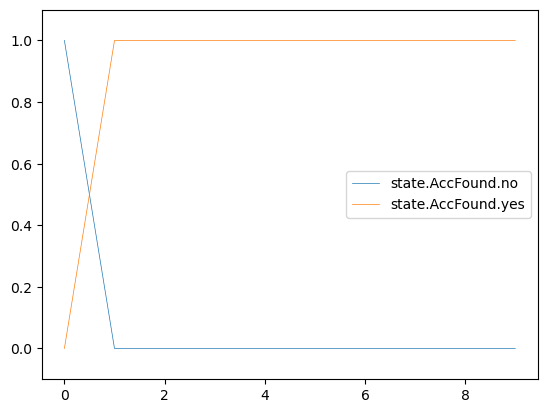

,agent_i.AccFound.no,agent_i.AccFound.yes,agent_i.action,agent_j.action,agent_i.observation.EndPtAlerts'
0,1.000000,0.000000,Nop,EnumAccounts,none
1,0.887500,0.112500,Nop,EnumAccounts,su_login
2,0.876250,0.123750,Nop,PrivEscAcc,none
3,0.980200,0.019800,Nop,FileRecon,su_login
4,0.980200,0.019800,Nop,FileRecon,file_enum
5,0.885632,0.114368,Nop,ManipulateData,file_write
6,0.530494,0.469506,Nop,Exit,file_write
7,0.530494,0.469506,Nop,Nop,none
8,0.530494,0.469506,Nop,Nop,file_write
9,0.530494,0.469506,Nop,Nop,none


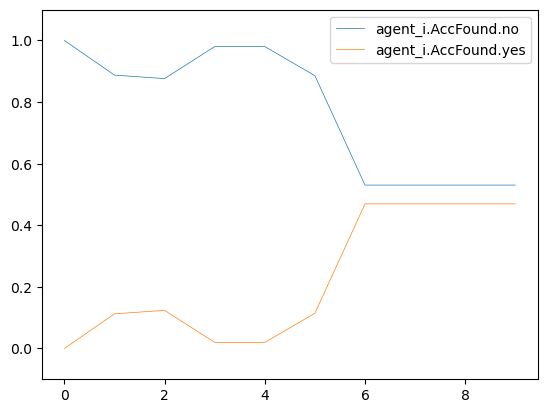

,agent_j.AccFound.no,agent_j.AccFound.yes,agent_j.action,agent_i.action,agent_j.observation.HostObs',agent_j.observation.ActionResult',agent_j.observation.ConnObs'
0,1.000000,0.000000,EnumAccounts,Nop,none,success,active
1,0.449550,0.550450,EnumAccounts,Nop,none,success,active
2,0.316088,0.683912,PrivEscAcc,Nop,none,success,active
3,0.039825,0.960175,FileRecon,Nop,none,failure,active
4,0.044454,0.955546,FileRecon,Nop,none,failure,active
5,0.049866,0.950134,ManipulateData,Nop,user_files,success,active
6,0.049866,0.950134,Exit,Nop,user_files,success,inactive
7,0.049866,0.950134,Nop,Nop,user_files,failure,inactive
8,0.049866,0.950134,Nop,Nop,none,failure,inactive
9,0.049866,0.950134,Nop,Nop,user_files,failure,inactive


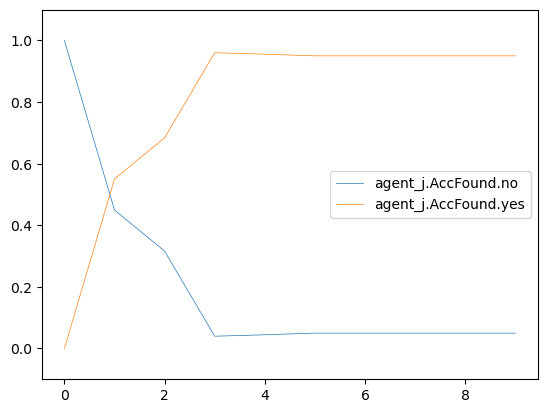

=============HostHasData============


,state.HostHasData.no,state.HostHasData.yes,agent_i.action,agent_j.action
0,1.0,0.0,Nop,EnumAccounts
1,1.0,0.0,Nop,EnumAccounts
2,1.0,0.0,Nop,PrivEscAcc
3,1.0,0.0,Nop,FileRecon
4,1.0,0.0,Nop,FileRecon
5,1.0,0.0,Nop,ManipulateData
6,1.0,0.0,Nop,Exit
7,1.0,0.0,Nop,Nop
8,1.0,0.0,Nop,Nop
9,1.0,0.0,Nop,Nop


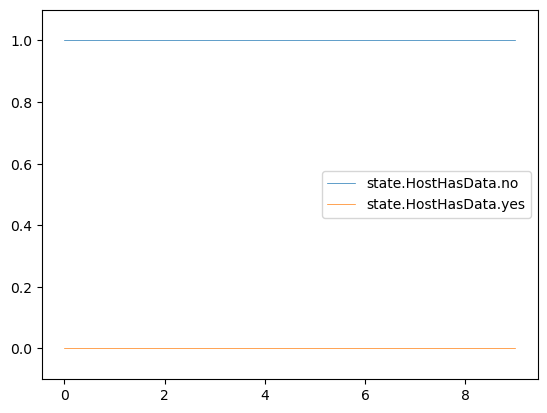

,agent_i.HostHasData.no,agent_i.HostHasData.yes,agent_i.action,agent_j.action,agent_i.observation.EndPtAlerts'
0,1.0,0.0,Nop,EnumAccounts,none
1,1.0,0.0,Nop,EnumAccounts,su_login
2,1.0,0.0,Nop,PrivEscAcc,none
3,1.0,0.0,Nop,FileRecon,su_login
4,1.0,0.0,Nop,FileRecon,file_enum
5,1.0,0.0,Nop,ManipulateData,file_write
6,1.0,0.0,Nop,Exit,file_write
7,1.0,0.0,Nop,Nop,none
8,1.0,0.0,Nop,Nop,file_write
9,1.0,0.0,Nop,Nop,none


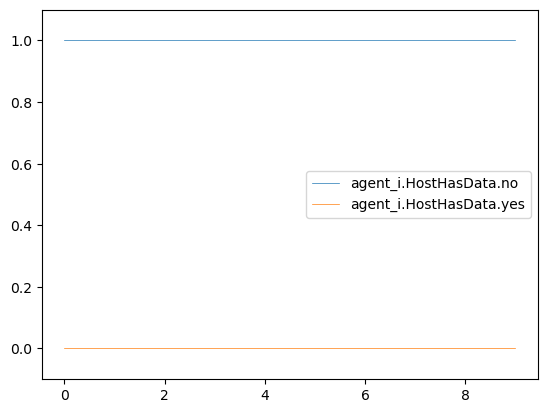

,agent_j.HostHasData.no,agent_j.HostHasData.yes,agent_j.action,agent_i.action,agent_j.observation.HostObs',agent_j.observation.ActionResult',agent_j.observation.ConnObs'
0,0.500000,0.500000,EnumAccounts,Nop,none,success,active
1,0.500000,0.500000,EnumAccounts,Nop,none,success,active
2,0.500000,0.500000,PrivEscAcc,Nop,none,success,active
3,0.344262,0.655738,FileRecon,Nop,none,failure,active
4,0.423658,0.576342,FileRecon,Nop,none,failure,active
5,0.518646,0.481354,ManipulateData,Nop,user_files,success,active
6,0.518646,0.481354,Exit,Nop,user_files,success,inactive
7,0.518646,0.481354,Nop,Nop,user_files,failure,inactive
8,0.518646,0.481354,Nop,Nop,none,failure,inactive
9,0.518646,0.481354,Nop,Nop,user_files,failure,inactive


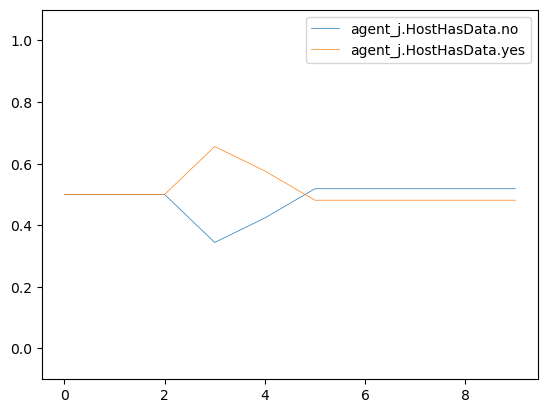

=============AttActive============


,state.AttActive.no,state.AttActive.yes,agent_i.action,agent_j.action
0,0.0,1.0,Nop,EnumAccounts
1,0.0,1.0,Nop,EnumAccounts
2,0.0,1.0,Nop,PrivEscAcc
3,0.0,1.0,Nop,FileRecon
4,0.0,1.0,Nop,FileRecon
5,0.0,1.0,Nop,ManipulateData
6,0.0,1.0,Nop,Exit
7,1.0,0.0,Nop,Nop
8,1.0,0.0,Nop,Nop
9,1.0,0.0,Nop,Nop


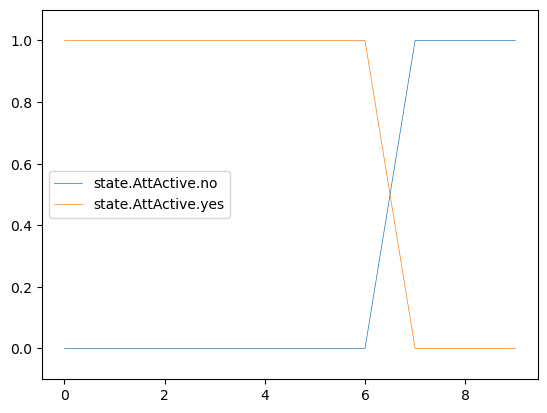

,agent_i.AttActive.no,agent_i.AttActive.yes,agent_i.action,agent_j.action,agent_i.observation.EndPtAlerts'
0,0.500000,0.500000,Nop,EnumAccounts,none
1,0.875000,0.125000,Nop,EnumAccounts,su_login
2,0.875000,0.125000,Nop,PrivEscAcc,none
3,0.980000,0.020000,Nop,FileRecon,su_login
4,0.980000,0.020000,Nop,FileRecon,file_enum
5,0.884477,0.115523,Nop,ManipulateData,file_write
6,0.526824,0.473176,Nop,Exit,file_write
7,1.000000,0.000000,Nop,Nop,none
8,1.000000,0.000000,Nop,Nop,file_write
9,1.000000,0.000000,Nop,Nop,none


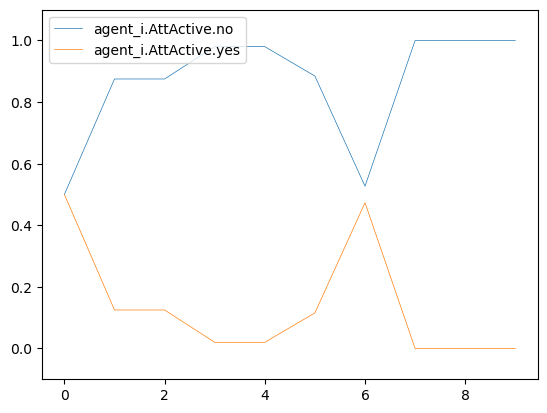

,agent_j.AttActive.no,agent_j.AttActive.yes,agent_j.action,agent_i.action,agent_j.observation.HostObs',agent_j.observation.ActionResult',agent_j.observation.ConnObs'
0,0.0,1.0,EnumAccounts,Nop,none,success,active
1,0.0,1.0,EnumAccounts,Nop,none,success,active
2,0.0,1.0,PrivEscAcc,Nop,none,success,active
3,0.0,1.0,FileRecon,Nop,none,failure,active
4,0.0,1.0,FileRecon,Nop,none,failure,active
5,0.0,1.0,ManipulateData,Nop,user_files,success,active
6,0.0,1.0,Exit,Nop,user_files,success,inactive
7,1.0,0.0,Nop,Nop,user_files,failure,inactive
8,1.0,0.0,Nop,Nop,none,failure,inactive
9,1.0,0.0,Nop,Nop,user_files,failure,inactive


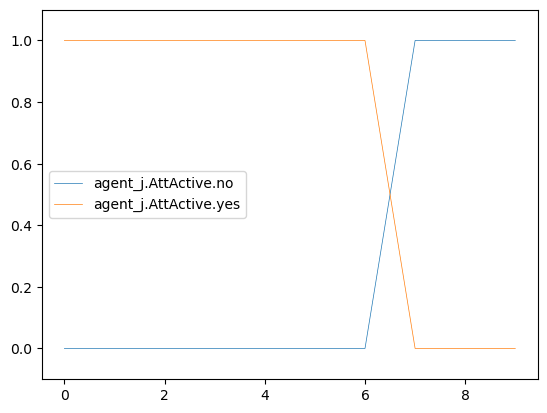

=============DataInjected============


,state.DataInjected.no,state.DataInjected.yes,agent_i.action,agent_j.action
0,1.0,0.0,Nop,EnumAccounts
1,1.0,0.0,Nop,EnumAccounts
2,1.0,0.0,Nop,PrivEscAcc
3,1.0,0.0,Nop,FileRecon
4,1.0,0.0,Nop,FileRecon
5,1.0,0.0,Nop,ManipulateData
6,1.0,0.0,Nop,Exit
7,1.0,0.0,Nop,Nop
8,1.0,0.0,Nop,Nop
9,1.0,0.0,Nop,Nop


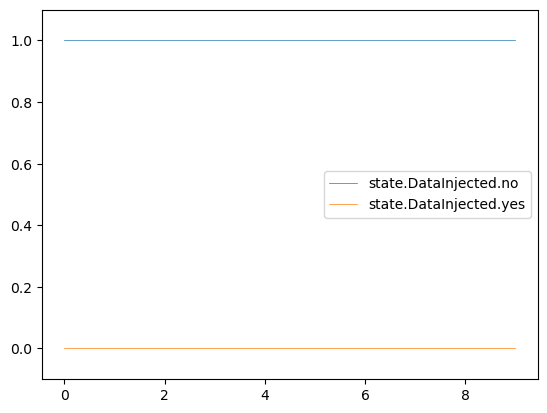

,agent_i.DataInjected.no,agent_i.DataInjected.yes,agent_i.action,agent_j.action,agent_i.observation.EndPtAlerts'
0,1.0,0.0,Nop,EnumAccounts,none
1,1.0,0.0,Nop,EnumAccounts,su_login
2,1.0,0.0,Nop,PrivEscAcc,none
3,1.0,0.0,Nop,FileRecon,su_login
4,1.0,0.0,Nop,FileRecon,file_enum
5,1.0,0.0,Nop,ManipulateData,file_write
6,1.0,0.0,Nop,Exit,file_write
7,1.0,0.0,Nop,Nop,none
8,1.0,0.0,Nop,Nop,file_write
9,1.0,0.0,Nop,Nop,none


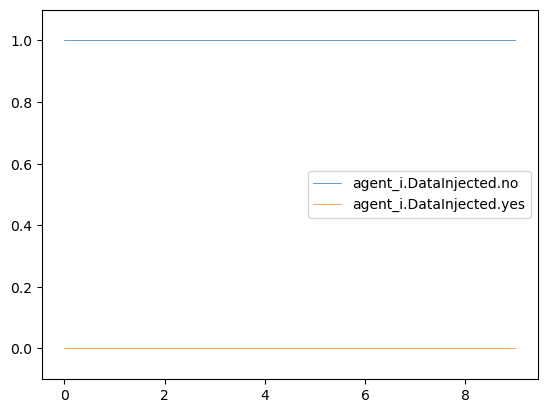

,agent_j.DataInjected.no,agent_j.DataInjected.yes,agent_j.action,agent_i.action,agent_j.observation.HostObs',agent_j.observation.ActionResult',agent_j.observation.ConnObs'
0,1.000000,0.000000,EnumAccounts,Nop,none,success,active
1,1.000000,0.000000,EnumAccounts,Nop,none,success,active
2,1.000000,0.000000,PrivEscAcc,Nop,none,success,active
3,1.000000,0.000000,FileRecon,Nop,none,failure,active
4,1.000000,0.000000,FileRecon,Nop,none,failure,active
5,1.000000,0.000000,ManipulateData,Nop,user_files,success,active
6,0.548243,0.451757,Exit,Nop,user_files,success,inactive
7,0.548243,0.451757,Nop,Nop,user_files,failure,inactive
8,0.548243,0.451757,Nop,Nop,none,failure,inactive
9,0.548243,0.451757,Nop,Nop,user_files,failure,inactive


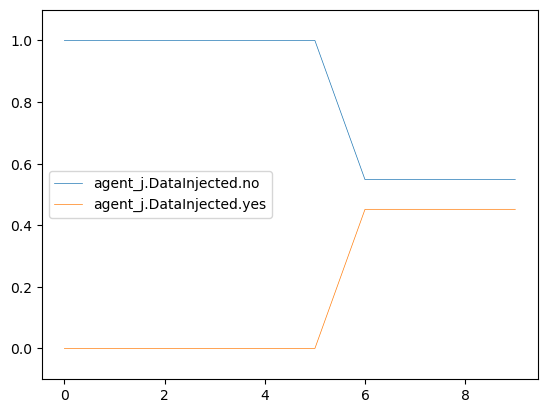

+++++++++++++++++++ End Interaction +++++++++++++++++++
+++++++++++++++++++ Begin Interaction +++++++++++++++++++


,agent_i.thetaj.AttackerFrame.att,agent_i.observation.EndPtAlerts'
0,1.0,file_enum
1,1.0,file_write
2,1.0,su_login
3,1.0,file_enum
4,1.0,none
5,1.0,none
6,1.0,none
7,1.0,file_enum
8,1.0,none
9,1.0,none


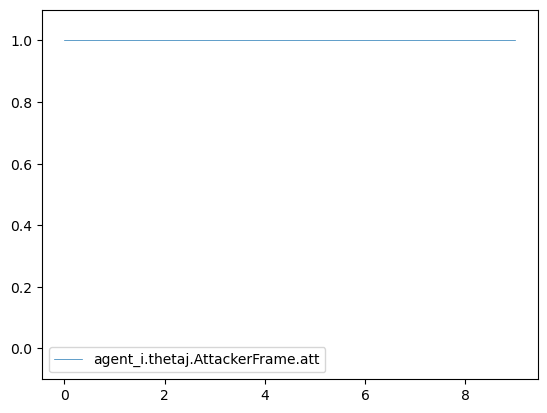

,agent_j.thetaj.DefFrame.highCap,agent_j.thetaj.DefFrame.lowCap,agent_j.observation.HostObs',agent_j.observation.ActionResult',agent_j.observation.ConnObs'
0,0.500000,0.500000,user_files,success,active
1,0.500000,0.500000,none,success,active
2,0.393939,0.606061,none,success,active
3,0.344262,0.655738,none,success,active
4,0.372842,0.627158,none,failure,active
5,0.372842,0.627158,user_files,success,inactive
6,0.372842,0.627158,none,failure,inactive
7,0.372842,0.627158,none,success,inactive
8,0.372842,0.627158,none,failure,inactive
9,0.372842,0.627158,user_files,success,inactive


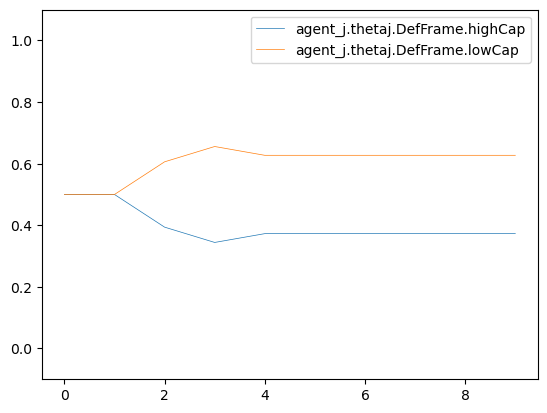

=============DataFound============


,state.DataFound.no,state.DataFound.yes,agent_i.action,agent_j.action
0,1.0,0.0,Nop,EnumAccounts
1,1.0,0.0,Nop,EnumAccounts
2,1.0,0.0,DeployDataDecoys,PrivEscAcc
3,1.0,0.0,Nop,FileRecon
4,0.0,1.0,Nop,ManipulateData
5,0.0,1.0,Nop,Exit
6,0.0,1.0,Nop,Nop
7,0.0,1.0,Nop,Nop
8,0.0,1.0,Nop,Nop
9,0.0,1.0,Nop,Nop


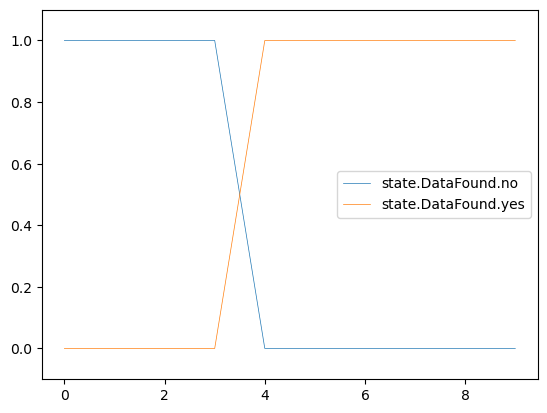

,agent_i.DataFound.no,agent_i.DataFound.yes,agent_i.action,agent_j.action,agent_i.observation.EndPtAlerts'
0,1.000000,0.000000,Nop,EnumAccounts,file_enum
1,1.000000,0.000000,Nop,EnumAccounts,file_write
2,1.000000,0.000000,DeployDataDecoys,PrivEscAcc,su_login
3,1.000000,0.000000,Nop,FileRecon,file_enum
4,0.111590,0.888410,Nop,ManipulateData,none
5,0.048234,0.951766,Nop,Exit,none
6,0.039382,0.960618,Nop,Nop,none
7,0.039382,0.960618,Nop,Nop,file_enum
8,0.039382,0.960618,Nop,Nop,none
9,0.039382,0.960618,Nop,Nop,none


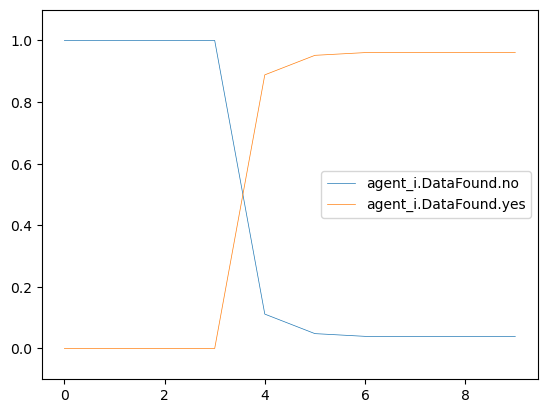

,agent_j.DataFound.no,agent_j.DataFound.yes,agent_j.action,agent_i.action,agent_j.observation.HostObs',agent_j.observation.ActionResult',agent_j.observation.ConnObs'
0,1.000000,0.000000,EnumAccounts,Nop,user_files,success,active
1,1.000000,0.000000,EnumAccounts,Nop,none,success,active
2,1.000000,0.000000,PrivEscAcc,DeployDataDecoys,none,success,active
3,1.000000,0.000000,FileRecon,Nop,none,success,active
4,0.323793,0.676207,ManipulateData,Nop,none,failure,active
5,0.323793,0.676207,Exit,Nop,user_files,success,inactive
6,0.323793,0.676207,Nop,Nop,none,failure,inactive
7,0.323793,0.676207,Nop,Nop,none,success,inactive
8,0.323793,0.676207,Nop,Nop,none,failure,inactive
9,0.323793,0.676207,Nop,Nop,user_files,success,inactive


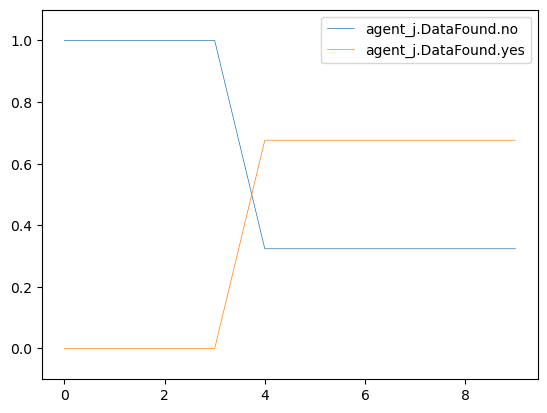

=============HostType============


,state.HostType.critical,state.HostType.critical_honeypot,state.HostType.honeypot,agent_i.action,agent_j.action
0,0.0,0.0,1.0,Nop,EnumAccounts
1,0.0,0.0,1.0,Nop,EnumAccounts
2,0.0,0.0,1.0,DeployDataDecoys,PrivEscAcc
3,0.0,0.0,1.0,Nop,FileRecon
4,0.0,0.0,1.0,Nop,ManipulateData
5,0.0,0.0,1.0,Nop,Exit
6,0.0,0.0,1.0,Nop,Nop
7,0.0,0.0,1.0,Nop,Nop
8,0.0,0.0,1.0,Nop,Nop
9,0.0,0.0,1.0,Nop,Nop


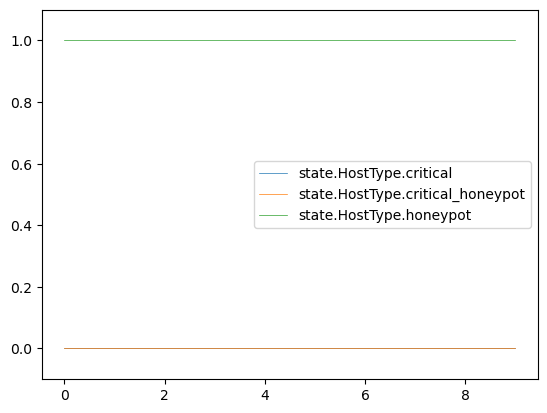

,agent_i.HostType.critical,agent_i.HostType.critical_honeypot,agent_i.HostType.honeypot,agent_i.action,agent_j.action,agent_i.observation.EndPtAlerts'
0,0.0,0.0,1.0,Nop,EnumAccounts,file_enum
1,0.0,0.0,1.0,Nop,EnumAccounts,file_write
2,0.0,0.0,1.0,DeployDataDecoys,PrivEscAcc,su_login
3,0.0,0.0,1.0,Nop,FileRecon,file_enum
4,0.0,0.0,1.0,Nop,ManipulateData,none
5,0.0,0.0,1.0,Nop,Exit,none
6,0.0,0.0,1.0,Nop,Nop,none
7,0.0,0.0,1.0,Nop,Nop,file_enum
8,0.0,0.0,1.0,Nop,Nop,none
9,0.0,0.0,1.0,Nop,Nop,none


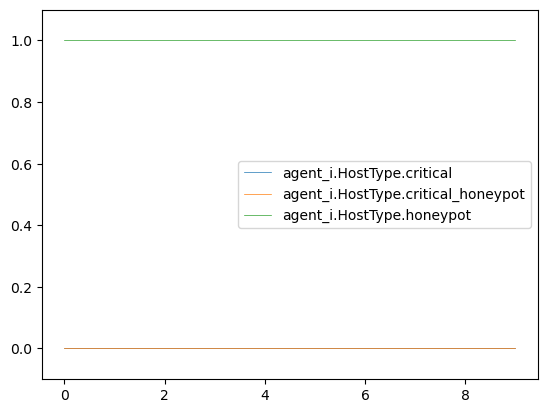

,agent_j.HostType.critical,agent_j.HostType.critical_honeypot,agent_j.HostType.honeypot,agent_j.action,agent_i.action,agent_j.observation.HostObs',agent_j.observation.ActionResult',agent_j.observation.ConnObs'
0,0.0,1.0,0.0,EnumAccounts,Nop,user_files,success,active
1,0.0,1.0,0.0,EnumAccounts,Nop,none,success,active
2,0.0,1.0,0.0,PrivEscAcc,DeployDataDecoys,none,success,active
3,0.0,1.0,0.0,FileRecon,Nop,none,success,active
4,0.0,1.0,0.0,ManipulateData,Nop,none,failure,active
5,0.0,1.0,0.0,Exit,Nop,user_files,success,inactive
6,0.0,1.0,0.0,Nop,Nop,none,failure,inactive
7,0.0,1.0,0.0,Nop,Nop,none,success,inactive
8,0.0,1.0,0.0,Nop,Nop,none,failure,inactive
9,0.0,1.0,0.0,Nop,Nop,user_files,success,inactive


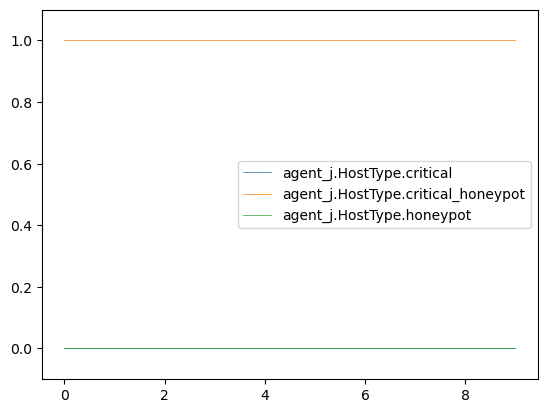

=============AccessLevel============


,state.AccessLevel.root,state.AccessLevel.user,agent_i.action,agent_j.action
0,0.0,1.0,Nop,EnumAccounts
1,0.0,1.0,Nop,EnumAccounts
2,0.0,1.0,DeployDataDecoys,PrivEscAcc
3,1.0,0.0,Nop,FileRecon
4,1.0,0.0,Nop,ManipulateData
5,1.0,0.0,Nop,Exit
6,1.0,0.0,Nop,Nop
7,1.0,0.0,Nop,Nop
8,1.0,0.0,Nop,Nop
9,1.0,0.0,Nop,Nop


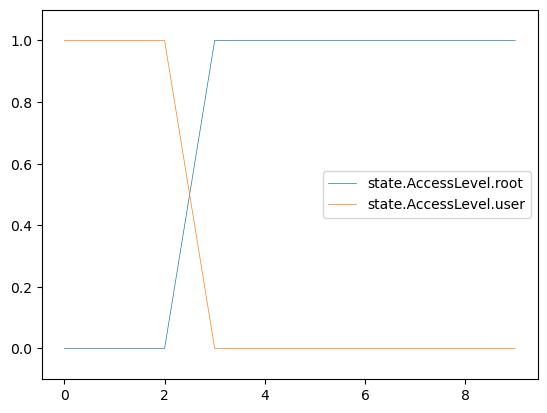

,agent_i.AccessLevel.root,agent_i.AccessLevel.user,agent_i.action,agent_j.action,agent_i.observation.EndPtAlerts'
0,0.000000,1.000000,Nop,EnumAccounts,file_enum
1,0.000000,1.000000,Nop,EnumAccounts,file_write
2,0.000000,1.000000,DeployDataDecoys,PrivEscAcc,su_login
3,0.970200,0.029800,Nop,FileRecon,file_enum
4,0.987122,0.012878,Nop,ManipulateData,none
5,0.970200,0.029800,Nop,Exit,none
6,0.973610,0.026390,Nop,Nop,none
7,0.973610,0.026390,Nop,Nop,file_enum
8,0.973610,0.026390,Nop,Nop,none
9,0.973610,0.026390,Nop,Nop,none


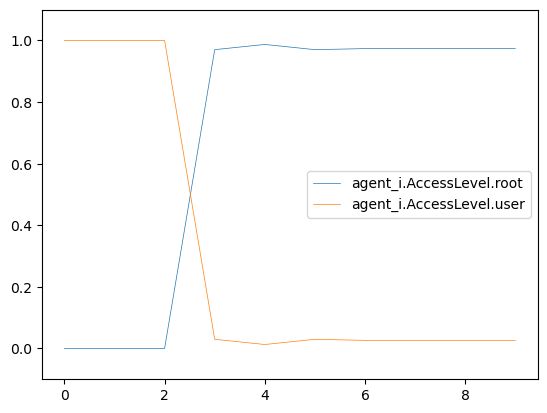

,agent_j.AccessLevel.root,agent_j.AccessLevel.user,agent_j.action,agent_i.action,agent_j.observation.HostObs',agent_j.observation.ActionResult',agent_j.observation.ConnObs'
0,0.000000,1.000000,EnumAccounts,Nop,user_files,success,active
1,0.000000,1.000000,EnumAccounts,Nop,none,success,active
2,0.000000,1.000000,PrivEscAcc,DeployDataDecoys,none,success,active
3,0.960175,0.039825,FileRecon,Nop,none,success,active
4,0.964642,0.035358,ManipulateData,Nop,none,failure,active
5,0.964642,0.035358,Exit,Nop,user_files,success,inactive
6,0.964642,0.035358,Nop,Nop,none,failure,inactive
7,0.964642,0.035358,Nop,Nop,none,success,inactive
8,0.964642,0.035358,Nop,Nop,none,failure,inactive
9,0.964642,0.035358,Nop,Nop,user_files,success,inactive


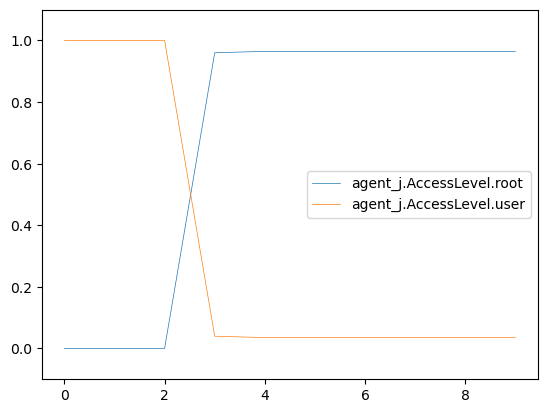

=============DataPrivs============


,state.DataPrivs.root,state.DataPrivs.user,agent_i.action,agent_j.action
0,1.0,0.0,Nop,EnumAccounts
1,1.0,0.0,Nop,EnumAccounts
2,1.0,0.0,DeployDataDecoys,PrivEscAcc
3,1.0,0.0,Nop,FileRecon
4,1.0,0.0,Nop,ManipulateData
5,1.0,0.0,Nop,Exit
6,1.0,0.0,Nop,Nop
7,1.0,0.0,Nop,Nop
8,1.0,0.0,Nop,Nop
9,1.0,0.0,Nop,Nop


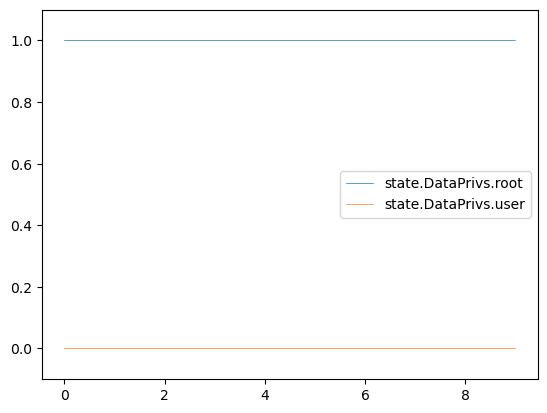

,agent_i.DataPrivs.root,agent_i.DataPrivs.user,agent_i.action,agent_j.action,agent_i.observation.EndPtAlerts'
0,1.0,0.0,Nop,EnumAccounts,file_enum
1,1.0,0.0,Nop,EnumAccounts,file_write
2,1.0,0.0,DeployDataDecoys,PrivEscAcc,su_login
3,1.0,0.0,Nop,FileRecon,file_enum
4,1.0,0.0,Nop,ManipulateData,none
5,1.0,0.0,Nop,Exit,none
6,1.0,0.0,Nop,Nop,none
7,1.0,0.0,Nop,Nop,file_enum
8,1.0,0.0,Nop,Nop,none
9,1.0,0.0,Nop,Nop,none


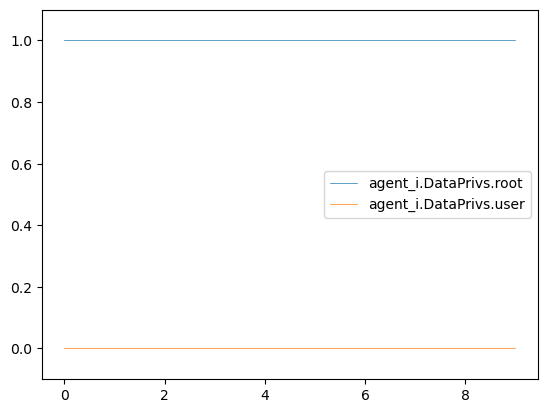

,agent_j.DataPrivs.root,agent_j.DataPrivs.user,agent_j.action,agent_i.action,agent_j.observation.HostObs',agent_j.observation.ActionResult',agent_j.observation.ConnObs'
0,0.500000,0.500000,EnumAccounts,Nop,user_files,success,active
1,0.500000,0.500000,EnumAccounts,Nop,none,success,active
2,0.500000,0.500000,PrivEscAcc,DeployDataDecoys,none,success,active
3,0.500000,0.500000,FileRecon,Nop,none,success,active
4,0.497674,0.502326,ManipulateData,Nop,none,failure,active
5,0.497674,0.502326,Exit,Nop,user_files,success,inactive
6,0.497674,0.502326,Nop,Nop,none,failure,inactive
7,0.497674,0.502326,Nop,Nop,none,success,inactive
8,0.497674,0.502326,Nop,Nop,none,failure,inactive
9,0.497674,0.502326,Nop,Nop,user_files,success,inactive


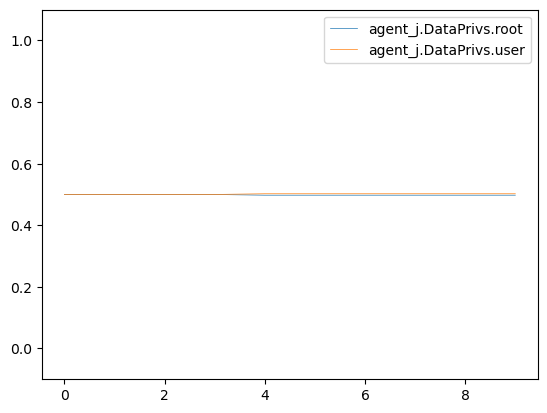

=============EscAccounts============


,state.EscAccounts.no,state.EscAccounts.yes,agent_i.action,agent_j.action
0,0.0,1.0,Nop,EnumAccounts
1,0.0,1.0,Nop,EnumAccounts
2,0.0,1.0,DeployDataDecoys,PrivEscAcc
3,0.0,1.0,Nop,FileRecon
4,0.0,1.0,Nop,ManipulateData
5,0.0,1.0,Nop,Exit
6,0.0,1.0,Nop,Nop
7,0.0,1.0,Nop,Nop
8,0.0,1.0,Nop,Nop
9,0.0,1.0,Nop,Nop


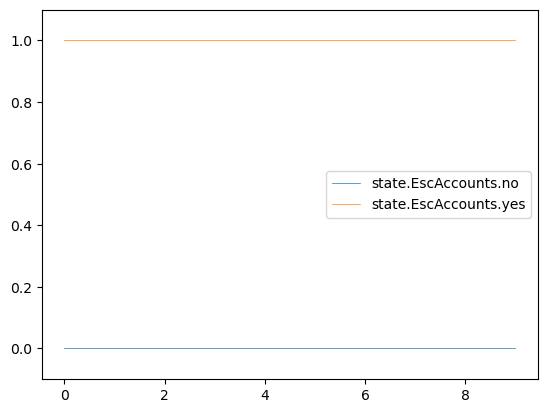

,agent_i.EscAccounts.no,agent_i.EscAccounts.yes,agent_i.action,agent_j.action,agent_i.observation.EndPtAlerts'
0,0.0,1.0,Nop,EnumAccounts,file_enum
1,0.0,1.0,Nop,EnumAccounts,file_write
2,0.0,1.0,DeployDataDecoys,PrivEscAcc,su_login
3,0.0,1.0,Nop,FileRecon,file_enum
4,0.0,1.0,Nop,ManipulateData,none
5,0.0,1.0,Nop,Exit,none
6,0.0,1.0,Nop,Nop,none
7,0.0,1.0,Nop,Nop,file_enum
8,0.0,1.0,Nop,Nop,none
9,0.0,1.0,Nop,Nop,none


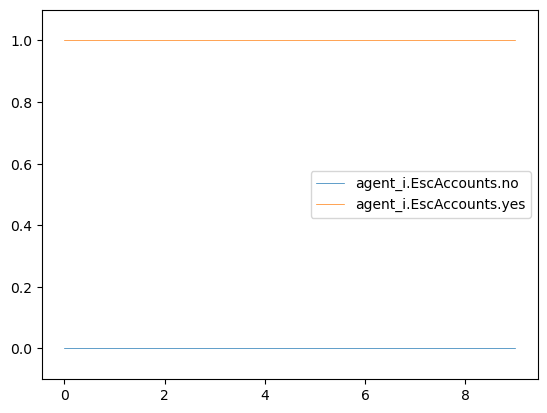

,agent_j.EscAccounts.no,agent_j.EscAccounts.yes,agent_j.action,agent_i.action,agent_j.observation.HostObs',agent_j.observation.ActionResult',agent_j.observation.ConnObs'
0,0.500000,0.500000,EnumAccounts,Nop,user_files,success,active
1,0.408682,0.591318,EnumAccounts,Nop,none,success,active
2,0.312959,0.687041,PrivEscAcc,DeployDataDecoys,none,success,active
3,0.039430,0.960569,FileRecon,Nop,none,success,active
4,0.035008,0.964992,ManipulateData,Nop,none,failure,active
5,0.035008,0.964992,Exit,Nop,user_files,success,inactive
6,0.035008,0.964992,Nop,Nop,none,failure,inactive
7,0.035008,0.964992,Nop,Nop,none,success,inactive
8,0.035008,0.964992,Nop,Nop,none,failure,inactive
9,0.035008,0.964992,Nop,Nop,user_files,success,inactive


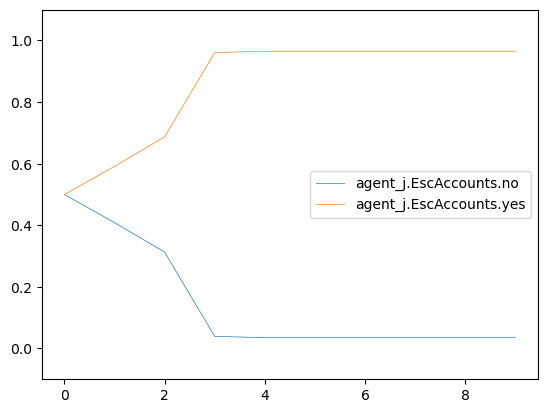

=============AccFound============


,state.AccFound.no,state.AccFound.yes,agent_i.action,agent_j.action
0,1.0,0.0,Nop,EnumAccounts
1,0.0,1.0,Nop,EnumAccounts
2,0.0,1.0,DeployDataDecoys,PrivEscAcc
3,0.0,1.0,Nop,FileRecon
4,0.0,1.0,Nop,ManipulateData
5,0.0,1.0,Nop,Exit
6,0.0,1.0,Nop,Nop
7,0.0,1.0,Nop,Nop
8,0.0,1.0,Nop,Nop
9,0.0,1.0,Nop,Nop


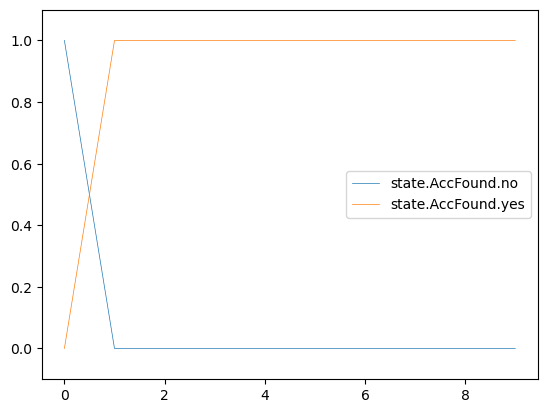

,agent_i.AccFound.no,agent_i.AccFound.yes,agent_i.action,agent_j.action,agent_i.observation.EndPtAlerts'
0,1.000000,0.000000,Nop,EnumAccounts,file_enum
1,0.212500,0.787500,Nop,EnumAccounts,file_write
2,0.133750,0.866250,DeployDataDecoys,PrivEscAcc,su_login
3,0.029800,0.970200,Nop,FileRecon,file_enum
4,0.012878,0.987122,Nop,ManipulateData,none
5,0.029800,0.970200,Nop,Exit,none
6,0.026390,0.973610,Nop,Nop,none
7,0.026390,0.973610,Nop,Nop,file_enum
8,0.026390,0.973610,Nop,Nop,none
9,0.026390,0.973610,Nop,Nop,none


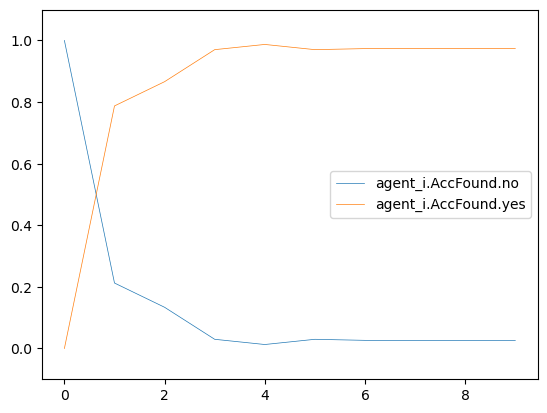

,agent_j.AccFound.no,agent_j.AccFound.yes,agent_j.action,agent_i.action,agent_j.observation.HostObs',agent_j.observation.ActionResult',agent_j.observation.ConnObs'
0,1.000000,0.000000,EnumAccounts,Nop,user_files,success,active
1,0.449550,0.550450,EnumAccounts,Nop,none,success,active
2,0.316088,0.683912,PrivEscAcc,DeployDataDecoys,none,success,active
3,0.039825,0.960175,FileRecon,Nop,none,success,active
4,0.035358,0.964642,ManipulateData,Nop,none,failure,active
5,0.035358,0.964642,Exit,Nop,user_files,success,inactive
6,0.035358,0.964642,Nop,Nop,none,failure,inactive
7,0.035358,0.964642,Nop,Nop,none,success,inactive
8,0.035358,0.964642,Nop,Nop,none,failure,inactive
9,0.035358,0.964642,Nop,Nop,user_files,success,inactive


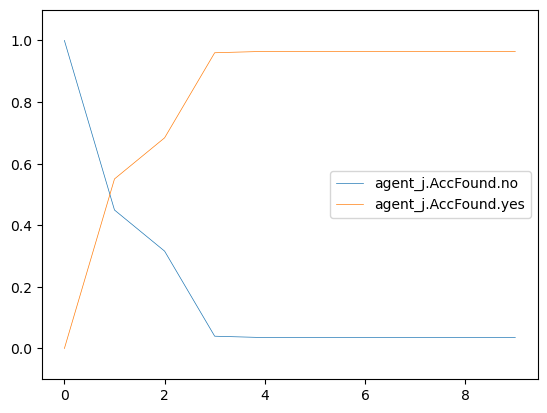

=============HostHasData============


,state.HostHasData.no,state.HostHasData.yes,agent_i.action,agent_j.action
0,1.0,0.0,Nop,EnumAccounts
1,1.0,0.0,Nop,EnumAccounts
2,1.0,0.0,DeployDataDecoys,PrivEscAcc
3,0.0,1.0,Nop,FileRecon
4,0.0,1.0,Nop,ManipulateData
5,0.0,1.0,Nop,Exit
6,0.0,1.0,Nop,Nop
7,0.0,1.0,Nop,Nop
8,0.0,1.0,Nop,Nop
9,0.0,1.0,Nop,Nop


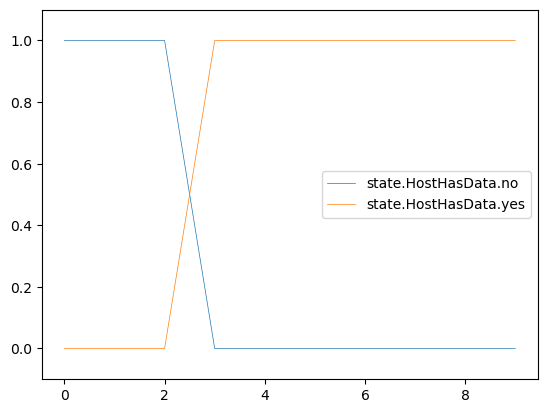

,agent_i.HostHasData.no,agent_i.HostHasData.yes,agent_i.action,agent_j.action,agent_i.observation.EndPtAlerts'
0,1.0,0.0,Nop,EnumAccounts,file_enum
1,1.0,0.0,Nop,EnumAccounts,file_write
2,1.0,0.0,DeployDataDecoys,PrivEscAcc,su_login
3,0.0,1.0,Nop,FileRecon,file_enum
4,0.0,1.0,Nop,ManipulateData,none
5,0.0,1.0,Nop,Exit,none
6,0.0,1.0,Nop,Nop,none
7,0.0,1.0,Nop,Nop,file_enum
8,0.0,1.0,Nop,Nop,none
9,0.0,1.0,Nop,Nop,none


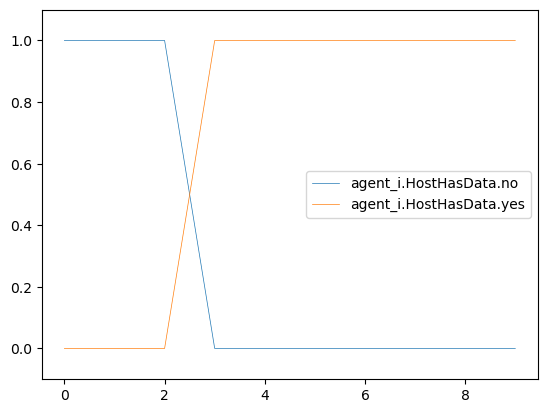

,agent_j.HostHasData.no,agent_j.HostHasData.yes,agent_j.action,agent_i.action,agent_j.observation.HostObs',agent_j.observation.ActionResult',agent_j.observation.ConnObs'
0,0.500000,0.500000,EnumAccounts,Nop,user_files,success,active
1,0.500000,0.500000,EnumAccounts,Nop,none,success,active
2,0.500000,0.500000,PrivEscAcc,DeployDataDecoys,none,success,active
3,0.344262,0.655738,FileRecon,Nop,none,success,active
4,0.264004,0.735996,ManipulateData,Nop,none,failure,active
5,0.264004,0.735996,Exit,Nop,user_files,success,inactive
6,0.264004,0.735996,Nop,Nop,none,failure,inactive
7,0.264004,0.735996,Nop,Nop,none,success,inactive
8,0.264004,0.735996,Nop,Nop,none,failure,inactive
9,0.264004,0.735996,Nop,Nop,user_files,success,inactive


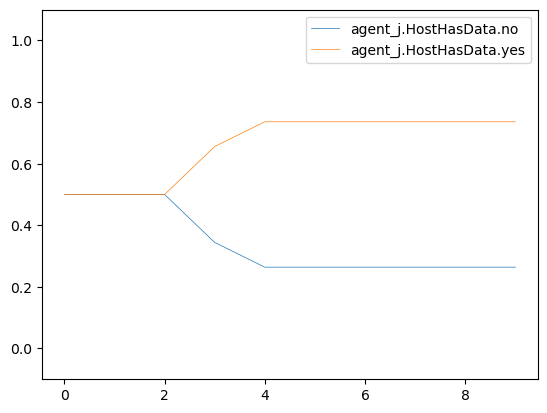

=============AttActive============


,state.AttActive.no,state.AttActive.yes,agent_i.action,agent_j.action
0,0.0,1.0,Nop,EnumAccounts
1,0.0,1.0,Nop,EnumAccounts
2,0.0,1.0,DeployDataDecoys,PrivEscAcc
3,0.0,1.0,Nop,FileRecon
4,0.0,1.0,Nop,ManipulateData
5,0.0,1.0,Nop,Exit
6,1.0,0.0,Nop,Nop
7,1.0,0.0,Nop,Nop
8,1.0,0.0,Nop,Nop
9,1.0,0.0,Nop,Nop


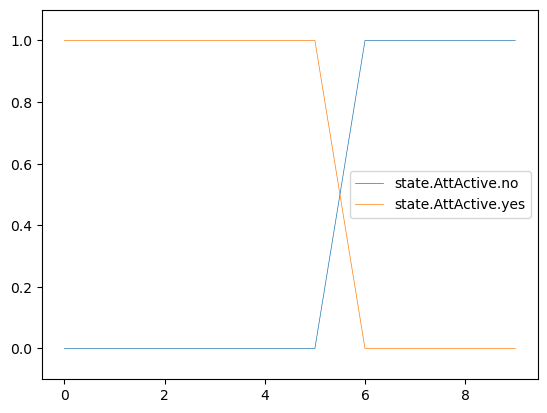

,agent_i.AttActive.no,agent_i.AttActive.yes,agent_i.action,agent_j.action,agent_i.observation.EndPtAlerts'
0,0.500000,0.500000,Nop,EnumAccounts,file_enum
1,0.125000,0.875000,Nop,EnumAccounts,file_write
2,0.125000,0.875000,DeployDataDecoys,PrivEscAcc,su_login
3,0.020000,0.980000,Nop,FileRecon,file_enum
4,0.002907,0.997093,Nop,ManipulateData,none
5,0.020000,0.980000,Nop,Exit,none
6,0.968902,0.031098,Nop,Nop,none
7,1.000000,0.000000,Nop,Nop,file_enum
8,1.000000,0.000000,Nop,Nop,none
9,1.000000,0.000000,Nop,Nop,none


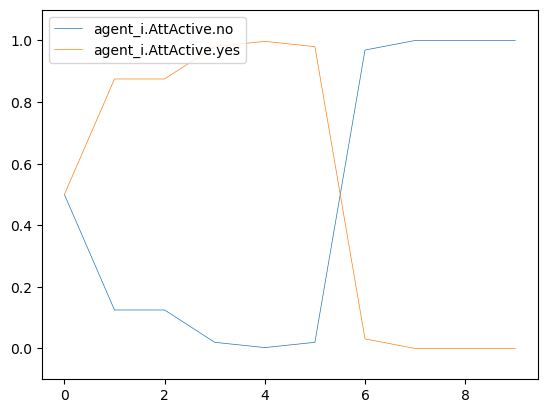

,agent_j.AttActive.no,agent_j.AttActive.yes,agent_j.action,agent_i.action,agent_j.observation.HostObs',agent_j.observation.ActionResult',agent_j.observation.ConnObs'
0,0.0,1.0,EnumAccounts,Nop,user_files,success,active
1,0.0,1.0,EnumAccounts,Nop,none,success,active
2,0.0,1.0,PrivEscAcc,DeployDataDecoys,none,success,active
3,0.0,1.0,FileRecon,Nop,none,success,active
4,0.0,1.0,ManipulateData,Nop,none,failure,active
5,0.0,1.0,Exit,Nop,user_files,success,inactive
6,1.0,0.0,Nop,Nop,none,failure,inactive
7,1.0,0.0,Nop,Nop,none,success,inactive
8,1.0,0.0,Nop,Nop,none,failure,inactive
9,1.0,0.0,Nop,Nop,user_files,success,inactive


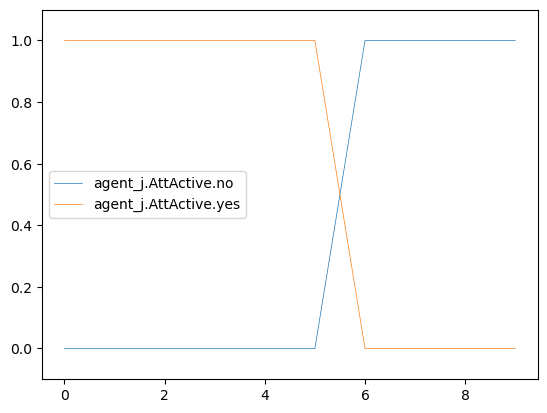

=============DataInjected============


,state.DataInjected.no,state.DataInjected.yes,agent_i.action,agent_j.action
0,1.0,0.0,Nop,EnumAccounts
1,1.0,0.0,Nop,EnumAccounts
2,1.0,0.0,DeployDataDecoys,PrivEscAcc
3,1.0,0.0,Nop,FileRecon
4,1.0,0.0,Nop,ManipulateData
5,0.0,1.0,Nop,Exit
6,0.0,1.0,Nop,Nop
7,0.0,1.0,Nop,Nop
8,0.0,1.0,Nop,Nop
9,0.0,1.0,Nop,Nop


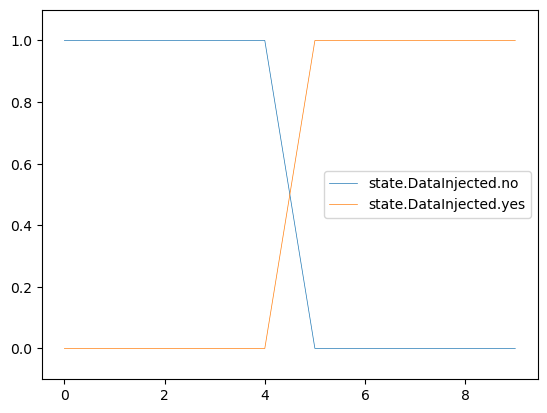

,agent_i.DataInjected.no,agent_i.DataInjected.yes,agent_i.action,agent_j.action,agent_i.observation.EndPtAlerts'
0,1.000000,0.000000,Nop,EnumAccounts,file_enum
1,1.000000,0.000000,Nop,EnumAccounts,file_write
2,1.000000,0.000000,DeployDataDecoys,PrivEscAcc,su_login
3,1.000000,0.000000,Nop,FileRecon,file_enum
4,1.000000,0.000000,Nop,ManipulateData,none
5,0.214138,0.785862,Nop,Exit,none
6,0.039382,0.960618,Nop,Nop,none
7,0.039382,0.960618,Nop,Nop,file_enum
8,0.039382,0.960618,Nop,Nop,none
9,0.039382,0.960618,Nop,Nop,none


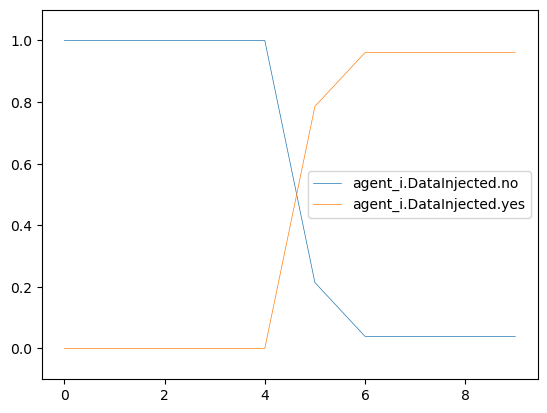

,agent_j.DataInjected.no,agent_j.DataInjected.yes,agent_j.action,agent_i.action,agent_j.observation.HostObs',agent_j.observation.ActionResult',agent_j.observation.ConnObs'
0,1.000000,0.000000,EnumAccounts,Nop,user_files,success,active
1,1.000000,0.000000,EnumAccounts,Nop,none,success,active
2,1.000000,0.000000,PrivEscAcc,DeployDataDecoys,none,success,active
3,1.000000,0.000000,FileRecon,Nop,none,success,active
4,1.000000,0.000000,ManipulateData,Nop,none,failure,active
5,0.323793,0.676207,Exit,Nop,user_files,success,inactive
6,0.323793,0.676207,Nop,Nop,none,failure,inactive
7,0.323793,0.676207,Nop,Nop,none,success,inactive
8,0.323793,0.676207,Nop,Nop,none,failure,inactive
9,0.323793,0.676207,Nop,Nop,user_files,success,inactive


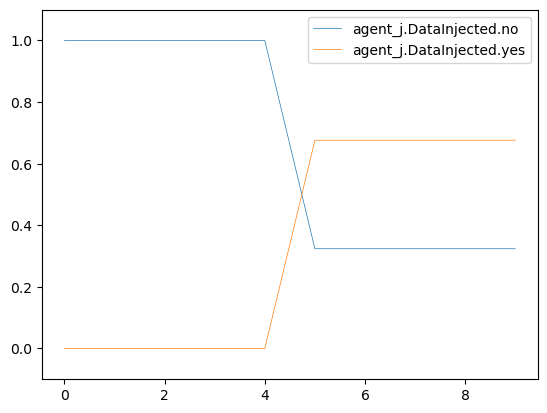

+++++++++++++++++++ End Interaction +++++++++++++++++++
+++++++++++++++++++ Begin Interaction +++++++++++++++++++


,agent_i.thetaj.AttackerFrame.att,agent_i.observation.EndPtAlerts'
0,1.0,file_enum
1,1.0,file_enum
2,1.0,su_login
3,1.0,file_enum
4,1.0,file_write
5,1.0,none
6,1.0,none
7,1.0,none
8,1.0,file_enum
9,1.0,none


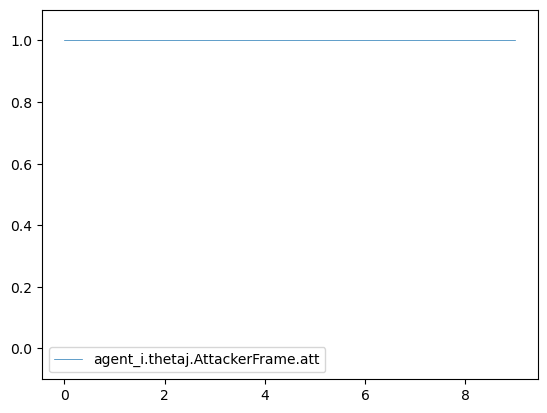

,agent_j.thetaj.DefFrame.highCap,agent_j.thetaj.DefFrame.lowCap,agent_j.observation.HostObs',agent_j.observation.ActionResult',agent_j.observation.ConnObs'
0,0.500000,0.500000,none,failure,active
1,0.500000,0.500000,user_files,success,active
2,0.393939,0.606061,user_files,success,active
3,0.344262,0.655738,none,success,active
4,0.372010,0.627990,user_files,failure,active
5,0.372010,0.627990,user_files,success,inactive
6,0.372010,0.627990,none,success,inactive
7,0.372010,0.627990,none,failure,inactive
8,0.372010,0.627990,user_files,failure,inactive
9,0.372010,0.627990,none,failure,inactive


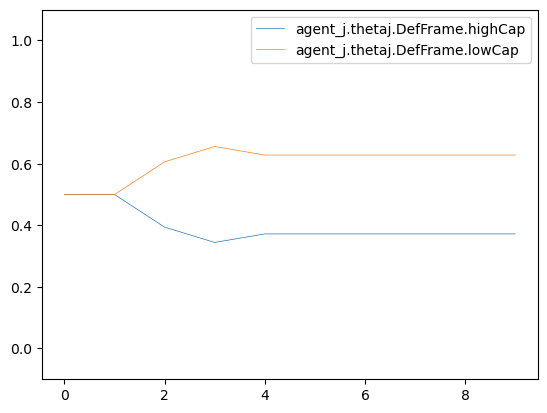

=============DataFound============


,state.DataFound.no,state.DataFound.yes,agent_i.action,agent_j.action
0,1.0,0.0,Nop,EnumAccounts
1,1.0,0.0,Nop,EnumAccounts
2,1.0,0.0,DeployDataDecoys,PrivEscAcc
3,1.0,0.0,Nop,FileRecon
4,0.0,1.0,Nop,ManipulateData
5,0.0,1.0,Nop,Exit
6,0.0,1.0,Nop,Nop
7,0.0,1.0,Nop,Nop
8,0.0,1.0,Nop,Nop
9,0.0,1.0,Nop,Nop


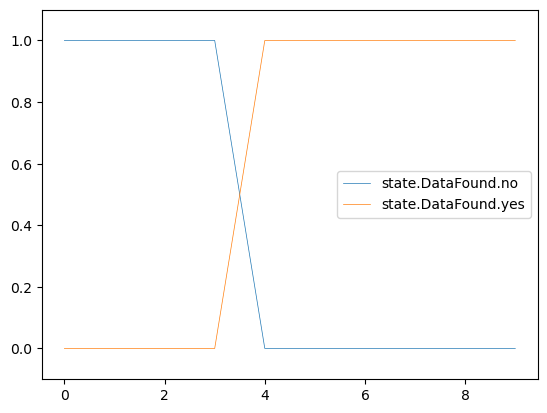

,agent_i.DataFound.no,agent_i.DataFound.yes,agent_i.action,agent_j.action,agent_i.observation.EndPtAlerts'
0,1.000000,0.000000,Nop,EnumAccounts,file_enum
1,1.000000,0.000000,Nop,EnumAccounts,file_enum
2,1.000000,0.000000,DeployDataDecoys,PrivEscAcc,su_login
3,1.000000,0.000000,Nop,FileRecon,file_enum
4,0.109371,0.890629,Nop,ManipulateData,file_write
5,0.016101,0.983899,Nop,Exit,none
6,0.013867,0.986133,Nop,Nop,none
7,0.013867,0.986133,Nop,Nop,none
8,0.013867,0.986133,Nop,Nop,file_enum
9,0.013867,0.986133,Nop,Nop,none


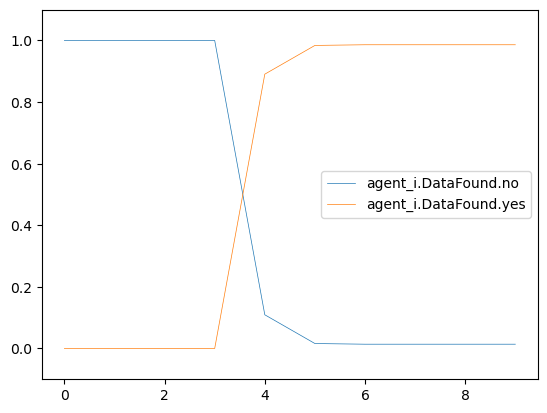

,agent_j.DataFound.no,agent_j.DataFound.yes,agent_j.action,agent_i.action,agent_j.observation.HostObs',agent_j.observation.ActionResult',agent_j.observation.ConnObs'
0,1.000000,0.000000,EnumAccounts,Nop,none,failure,active
1,1.000000,0.000000,EnumAccounts,Nop,user_files,success,active
2,1.000000,0.000000,PrivEscAcc,DeployDataDecoys,user_files,success,active
3,1.000000,0.000000,FileRecon,Nop,none,success,active
4,0.337744,0.662256,ManipulateData,Nop,user_files,failure,active
5,0.337744,0.662256,Exit,Nop,user_files,success,inactive
6,0.337744,0.662256,Nop,Nop,none,success,inactive
7,0.337744,0.662256,Nop,Nop,none,failure,inactive
8,0.337744,0.662256,Nop,Nop,user_files,failure,inactive
9,0.337744,0.662256,Nop,Nop,none,failure,inactive


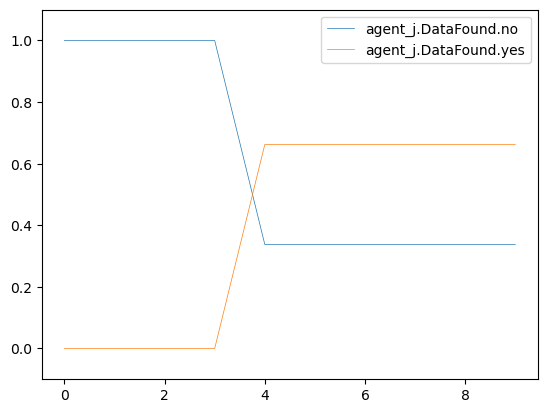

=============HostType============


,state.HostType.critical,state.HostType.critical_honeypot,state.HostType.honeypot,agent_i.action,agent_j.action
0,0.0,0.0,1.0,Nop,EnumAccounts
1,0.0,0.0,1.0,Nop,EnumAccounts
2,0.0,0.0,1.0,DeployDataDecoys,PrivEscAcc
3,0.0,0.0,1.0,Nop,FileRecon
4,0.0,0.0,1.0,Nop,ManipulateData
5,0.0,0.0,1.0,Nop,Exit
6,0.0,0.0,1.0,Nop,Nop
7,0.0,0.0,1.0,Nop,Nop
8,0.0,0.0,1.0,Nop,Nop
9,0.0,0.0,1.0,Nop,Nop


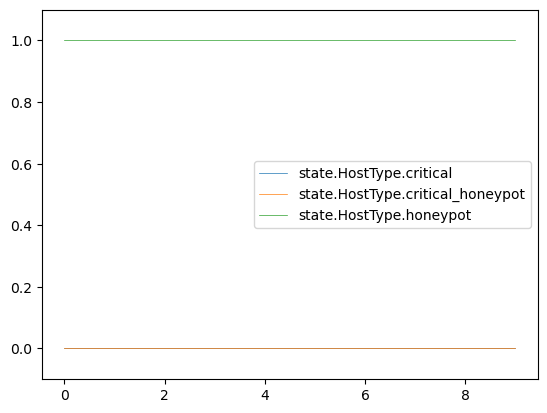

,agent_i.HostType.critical,agent_i.HostType.critical_honeypot,agent_i.HostType.honeypot,agent_i.action,agent_j.action,agent_i.observation.EndPtAlerts'
0,0.0,0.0,1.0,Nop,EnumAccounts,file_enum
1,0.0,0.0,1.0,Nop,EnumAccounts,file_enum
2,0.0,0.0,1.0,DeployDataDecoys,PrivEscAcc,su_login
3,0.0,0.0,1.0,Nop,FileRecon,file_enum
4,0.0,0.0,1.0,Nop,ManipulateData,file_write
5,0.0,0.0,1.0,Nop,Exit,none
6,0.0,0.0,1.0,Nop,Nop,none
7,0.0,0.0,1.0,Nop,Nop,none
8,0.0,0.0,1.0,Nop,Nop,file_enum
9,0.0,0.0,1.0,Nop,Nop,none


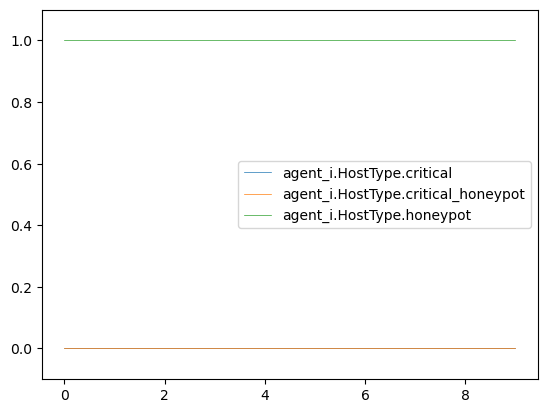

,agent_j.HostType.critical,agent_j.HostType.critical_honeypot,agent_j.HostType.honeypot,agent_j.action,agent_i.action,agent_j.observation.HostObs',agent_j.observation.ActionResult',agent_j.observation.ConnObs'
0,0.0,1.0,0.0,EnumAccounts,Nop,none,failure,active
1,0.0,1.0,0.0,EnumAccounts,Nop,user_files,success,active
2,0.0,1.0,0.0,PrivEscAcc,DeployDataDecoys,user_files,success,active
3,0.0,1.0,0.0,FileRecon,Nop,none,success,active
4,0.0,1.0,0.0,ManipulateData,Nop,user_files,failure,active
5,0.0,1.0,0.0,Exit,Nop,user_files,success,inactive
6,0.0,1.0,0.0,Nop,Nop,none,success,inactive
7,0.0,1.0,0.0,Nop,Nop,none,failure,inactive
8,0.0,1.0,0.0,Nop,Nop,user_files,failure,inactive
9,0.0,1.0,0.0,Nop,Nop,none,failure,inactive


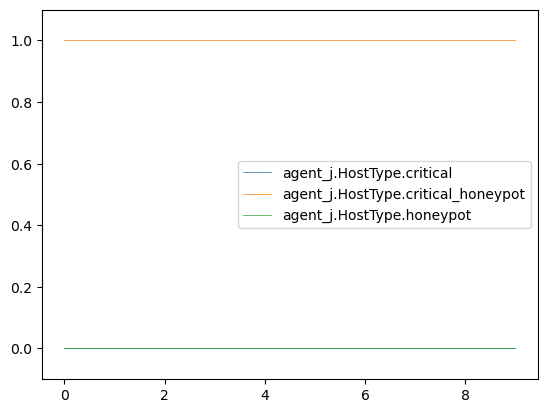

=============AccessLevel============


,state.AccessLevel.root,state.AccessLevel.user,agent_i.action,agent_j.action
0,0.0,1.0,Nop,EnumAccounts
1,0.0,1.0,Nop,EnumAccounts
2,0.0,1.0,DeployDataDecoys,PrivEscAcc
3,1.0,0.0,Nop,FileRecon
4,1.0,0.0,Nop,ManipulateData
5,1.0,0.0,Nop,Exit
6,1.0,0.0,Nop,Nop
7,1.0,0.0,Nop,Nop
8,1.0,0.0,Nop,Nop
9,1.0,0.0,Nop,Nop


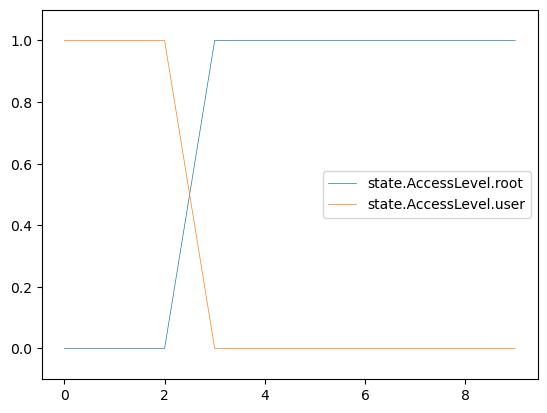

,agent_i.AccessLevel.root,agent_i.AccessLevel.user,agent_i.action,agent_j.action,agent_i.observation.EndPtAlerts'
0,0.000000,1.000000,Nop,EnumAccounts,file_enum
1,0.000000,1.000000,Nop,EnumAccounts,file_enum
2,0.000000,1.000000,DeployDataDecoys,PrivEscAcc,su_login
3,0.987122,0.012878,Nop,FileRecon,file_enum
4,0.989588,0.010412,Nop,ManipulateData,file_write
5,0.997207,0.002793,Nop,Exit,none
6,0.998478,0.001522,Nop,Nop,none
7,0.998478,0.001522,Nop,Nop,none
8,0.998478,0.001522,Nop,Nop,file_enum
9,0.998478,0.001522,Nop,Nop,none


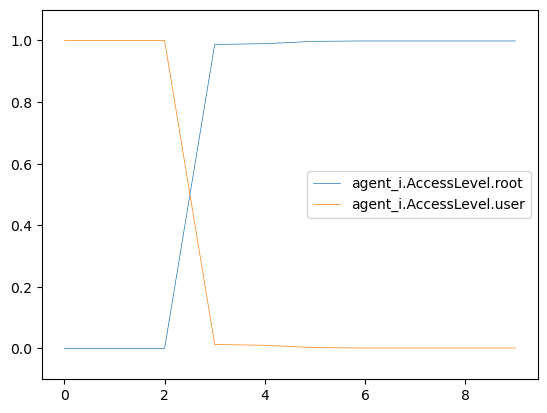

,agent_j.AccessLevel.root,agent_j.AccessLevel.user,agent_j.action,agent_i.action,agent_j.observation.HostObs',agent_j.observation.ActionResult',agent_j.observation.ConnObs'
0,0.000000,1.000000,EnumAccounts,Nop,none,failure,active
1,0.000000,1.000000,EnumAccounts,Nop,user_files,success,active
2,0.000000,1.000000,PrivEscAcc,DeployDataDecoys,user_files,success,active
3,0.909011,0.090989,FileRecon,Nop,none,success,active
4,0.918705,0.081295,ManipulateData,Nop,user_files,failure,active
5,0.918705,0.081295,Exit,Nop,user_files,success,inactive
6,0.918705,0.081295,Nop,Nop,none,success,inactive
7,0.918705,0.081295,Nop,Nop,none,failure,inactive
8,0.918705,0.081295,Nop,Nop,user_files,failure,inactive
9,0.918705,0.081295,Nop,Nop,none,failure,inactive


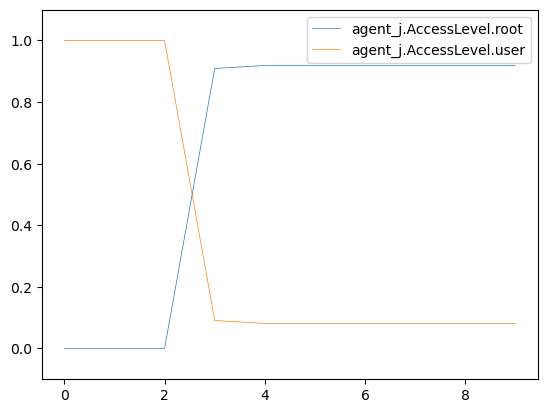

=============DataPrivs============


,state.DataPrivs.root,state.DataPrivs.user,agent_i.action,agent_j.action
0,1.0,0.0,Nop,EnumAccounts
1,1.0,0.0,Nop,EnumAccounts
2,1.0,0.0,DeployDataDecoys,PrivEscAcc
3,1.0,0.0,Nop,FileRecon
4,1.0,0.0,Nop,ManipulateData
5,1.0,0.0,Nop,Exit
6,1.0,0.0,Nop,Nop
7,1.0,0.0,Nop,Nop
8,1.0,0.0,Nop,Nop
9,1.0,0.0,Nop,Nop


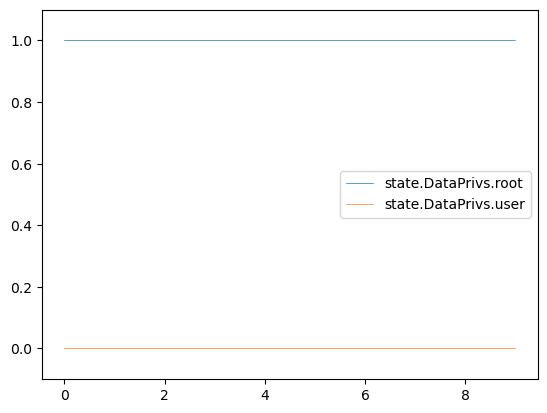

,agent_i.DataPrivs.root,agent_i.DataPrivs.user,agent_i.action,agent_j.action,agent_i.observation.EndPtAlerts'
0,1.0,0.0,Nop,EnumAccounts,file_enum
1,1.0,0.0,Nop,EnumAccounts,file_enum
2,1.0,0.0,DeployDataDecoys,PrivEscAcc,su_login
3,1.0,0.0,Nop,FileRecon,file_enum
4,1.0,0.0,Nop,ManipulateData,file_write
5,1.0,0.0,Nop,Exit,none
6,1.0,0.0,Nop,Nop,none
7,1.0,0.0,Nop,Nop,none
8,1.0,0.0,Nop,Nop,file_enum
9,1.0,0.0,Nop,Nop,none


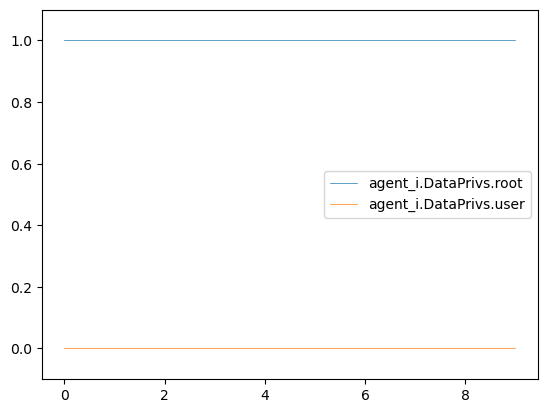

,agent_j.DataPrivs.root,agent_j.DataPrivs.user,agent_j.action,agent_i.action,agent_j.observation.HostObs',agent_j.observation.ActionResult',agent_j.observation.ConnObs'
0,0.500000,0.500000,EnumAccounts,Nop,none,failure,active
1,0.500000,0.500000,EnumAccounts,Nop,user_files,success,active
2,0.500000,0.500000,PrivEscAcc,DeployDataDecoys,user_files,success,active
3,0.500000,0.500000,FileRecon,Nop,none,success,active
4,0.494668,0.505332,ManipulateData,Nop,user_files,failure,active
5,0.494668,0.505332,Exit,Nop,user_files,success,inactive
6,0.494668,0.505332,Nop,Nop,none,success,inactive
7,0.494668,0.505332,Nop,Nop,none,failure,inactive
8,0.494668,0.505332,Nop,Nop,user_files,failure,inactive
9,0.494668,0.505332,Nop,Nop,none,failure,inactive


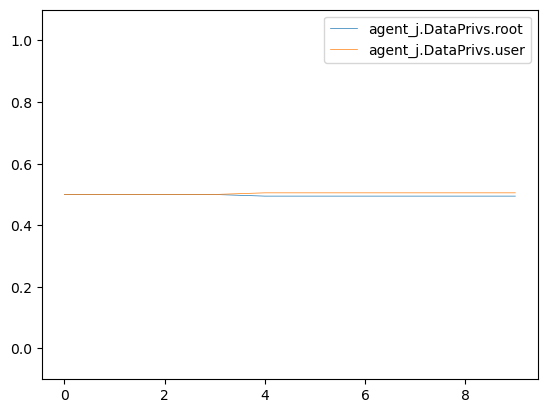

=============EscAccounts============


,state.EscAccounts.no,state.EscAccounts.yes,agent_i.action,agent_j.action
0,0.0,1.0,Nop,EnumAccounts
1,0.0,1.0,Nop,EnumAccounts
2,0.0,1.0,DeployDataDecoys,PrivEscAcc
3,0.0,1.0,Nop,FileRecon
4,0.0,1.0,Nop,ManipulateData
5,0.0,1.0,Nop,Exit
6,0.0,1.0,Nop,Nop
7,0.0,1.0,Nop,Nop
8,0.0,1.0,Nop,Nop
9,0.0,1.0,Nop,Nop


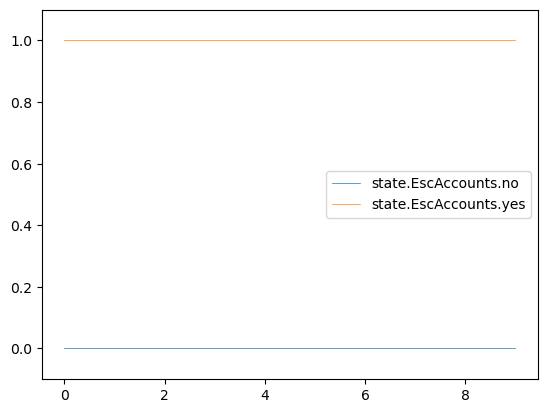

,agent_i.EscAccounts.no,agent_i.EscAccounts.yes,agent_i.action,agent_j.action,agent_i.observation.EndPtAlerts'
0,0.0,1.0,Nop,EnumAccounts,file_enum
1,0.0,1.0,Nop,EnumAccounts,file_enum
2,0.0,1.0,DeployDataDecoys,PrivEscAcc,su_login
3,0.0,1.0,Nop,FileRecon,file_enum
4,0.0,1.0,Nop,ManipulateData,file_write
5,0.0,1.0,Nop,Exit,none
6,0.0,1.0,Nop,Nop,none
7,0.0,1.0,Nop,Nop,none
8,0.0,1.0,Nop,Nop,file_enum
9,0.0,1.0,Nop,Nop,none


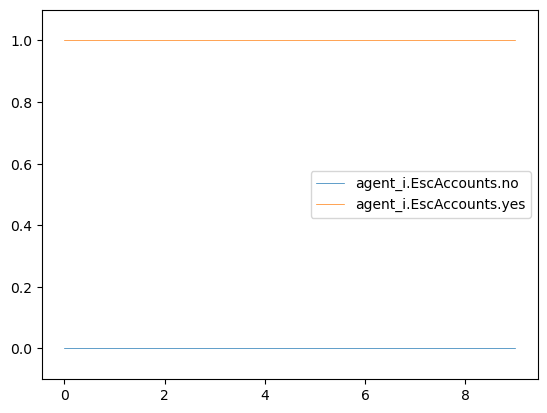

,agent_j.EscAccounts.no,agent_j.EscAccounts.yes,agent_j.action,agent_i.action,agent_j.observation.HostObs',agent_j.observation.ActionResult',agent_j.observation.ConnObs'
0,0.500000,0.500000,EnumAccounts,Nop,none,failure,active
1,0.589321,0.410679,EnumAccounts,Nop,user_files,success,active
2,0.489602,0.510398,PrivEscAcc,DeployDataDecoys,user_files,success,active
3,0.090088,0.909912,FileRecon,Nop,none,success,active
4,0.080491,0.919509,ManipulateData,Nop,user_files,failure,active
5,0.080491,0.919509,Exit,Nop,user_files,success,inactive
6,0.080491,0.919509,Nop,Nop,none,success,inactive
7,0.080491,0.919509,Nop,Nop,none,failure,inactive
8,0.080491,0.919509,Nop,Nop,user_files,failure,inactive
9,0.080491,0.919509,Nop,Nop,none,failure,inactive


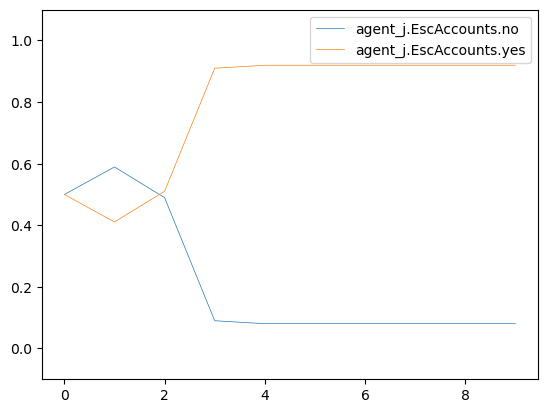

=============AccFound============


,state.AccFound.no,state.AccFound.yes,agent_i.action,agent_j.action
0,1.0,0.0,Nop,EnumAccounts
1,1.0,0.0,Nop,EnumAccounts
2,0.0,1.0,DeployDataDecoys,PrivEscAcc
3,0.0,1.0,Nop,FileRecon
4,0.0,1.0,Nop,ManipulateData
5,0.0,1.0,Nop,Exit
6,0.0,1.0,Nop,Nop
7,0.0,1.0,Nop,Nop
8,0.0,1.0,Nop,Nop
9,0.0,1.0,Nop,Nop


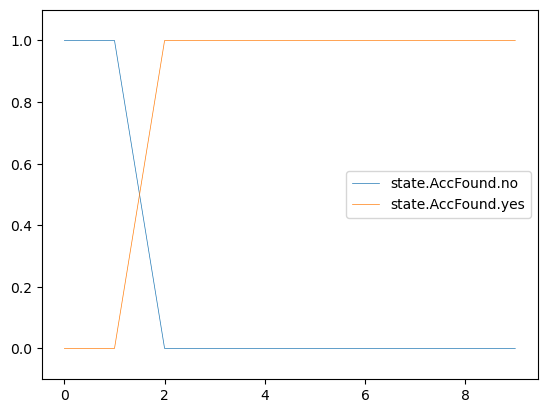

,agent_i.AccFound.no,agent_i.AccFound.yes,agent_i.action,agent_j.action,agent_i.observation.EndPtAlerts'
0,1.000000,0.000000,Nop,EnumAccounts,file_enum
1,0.212500,0.787500,Nop,EnumAccounts,file_enum
2,0.029800,0.970200,DeployDataDecoys,PrivEscAcc,su_login
3,0.012878,0.987122,Nop,FileRecon,file_enum
4,0.010412,0.989588,Nop,ManipulateData,file_write
5,0.002793,0.997207,Nop,Exit,none
6,0.001522,0.998478,Nop,Nop,none
7,0.001522,0.998478,Nop,Nop,none
8,0.001522,0.998478,Nop,Nop,file_enum
9,0.001522,0.998478,Nop,Nop,none


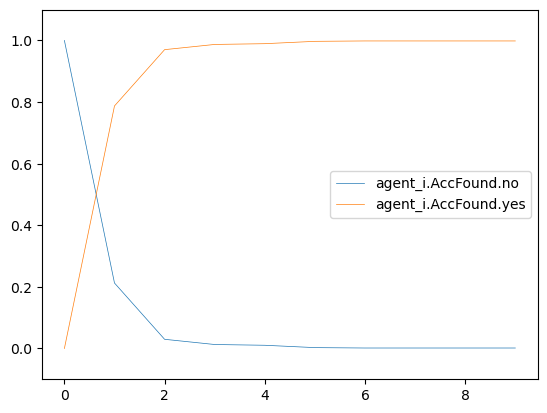

,agent_j.AccFound.no,agent_j.AccFound.yes,agent_j.action,agent_i.action,agent_j.observation.HostObs',agent_j.observation.ActionResult',agent_j.observation.ConnObs'
0,1.000000,0.000000,EnumAccounts,Nop,none,failure,active
1,0.648253,0.351747,EnumAccounts,Nop,user_files,success,active
2,0.494498,0.505502,PrivEscAcc,DeployDataDecoys,user_files,success,active
3,0.090989,0.909011,FileRecon,Nop,none,success,active
4,0.081295,0.918705,ManipulateData,Nop,user_files,failure,active
5,0.081295,0.918705,Exit,Nop,user_files,success,inactive
6,0.081295,0.918705,Nop,Nop,none,success,inactive
7,0.081295,0.918705,Nop,Nop,none,failure,inactive
8,0.081295,0.918705,Nop,Nop,user_files,failure,inactive
9,0.081295,0.918705,Nop,Nop,none,failure,inactive


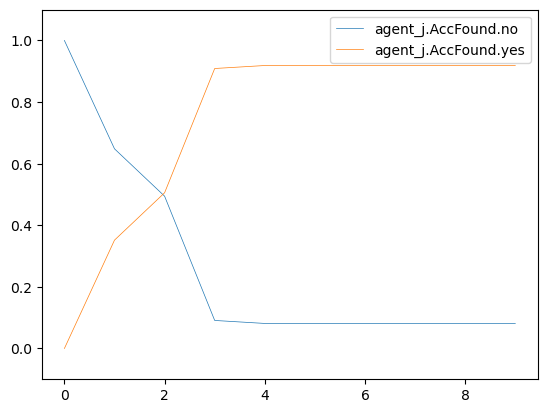

=============HostHasData============


,state.HostHasData.no,state.HostHasData.yes,agent_i.action,agent_j.action
0,1.0,0.0,Nop,EnumAccounts
1,1.0,0.0,Nop,EnumAccounts
2,1.0,0.0,DeployDataDecoys,PrivEscAcc
3,0.0,1.0,Nop,FileRecon
4,0.0,1.0,Nop,ManipulateData
5,0.0,1.0,Nop,Exit
6,0.0,1.0,Nop,Nop
7,0.0,1.0,Nop,Nop
8,0.0,1.0,Nop,Nop
9,0.0,1.0,Nop,Nop


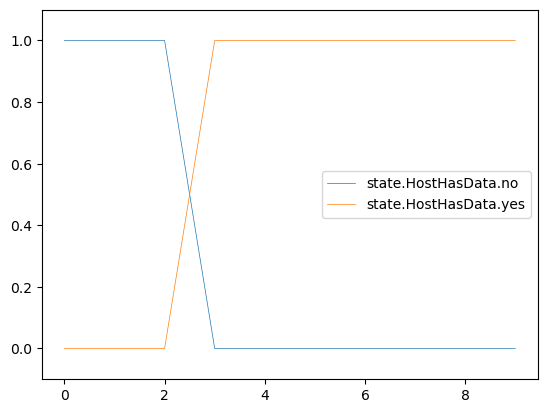

,agent_i.HostHasData.no,agent_i.HostHasData.yes,agent_i.action,agent_j.action,agent_i.observation.EndPtAlerts'
0,1.0,0.0,Nop,EnumAccounts,file_enum
1,1.0,0.0,Nop,EnumAccounts,file_enum
2,1.0,0.0,DeployDataDecoys,PrivEscAcc,su_login
3,0.0,1.0,Nop,FileRecon,file_enum
4,0.0,1.0,Nop,ManipulateData,file_write
5,0.0,1.0,Nop,Exit,none
6,0.0,1.0,Nop,Nop,none
7,0.0,1.0,Nop,Nop,none
8,0.0,1.0,Nop,Nop,file_enum
9,0.0,1.0,Nop,Nop,none


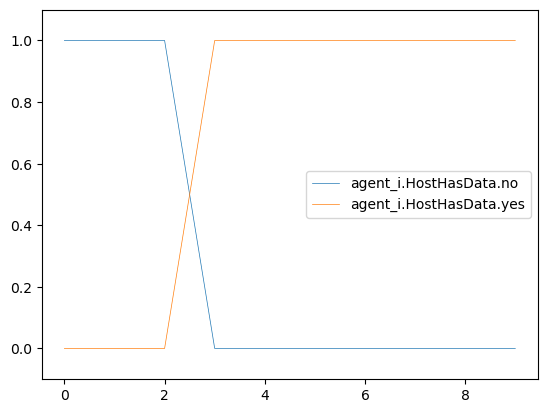

,agent_j.HostHasData.no,agent_j.HostHasData.yes,agent_j.action,agent_i.action,agent_j.observation.HostObs',agent_j.observation.ActionResult',agent_j.observation.ConnObs'
0,0.500000,0.500000,EnumAccounts,Nop,none,failure,active
1,0.500000,0.500000,EnumAccounts,Nop,user_files,success,active
2,0.500000,0.500000,PrivEscAcc,DeployDataDecoys,user_files,success,active
3,0.344262,0.655738,FileRecon,Nop,none,success,active
4,0.265795,0.734205,ManipulateData,Nop,user_files,failure,active
5,0.265795,0.734205,Exit,Nop,user_files,success,inactive
6,0.265795,0.734205,Nop,Nop,none,success,inactive
7,0.265795,0.734205,Nop,Nop,none,failure,inactive
8,0.265795,0.734205,Nop,Nop,user_files,failure,inactive
9,0.265795,0.734205,Nop,Nop,none,failure,inactive


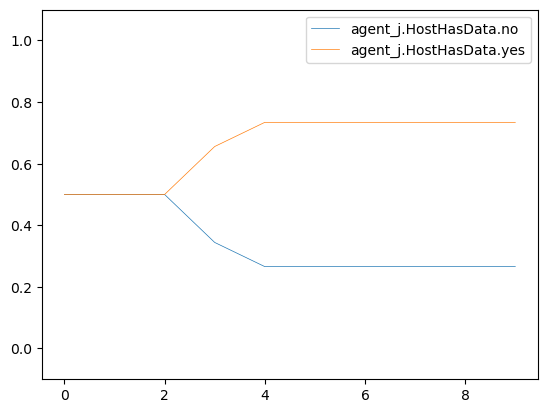

=============AttActive============


,state.AttActive.no,state.AttActive.yes,agent_i.action,agent_j.action
0,0.0,1.0,Nop,EnumAccounts
1,0.0,1.0,Nop,EnumAccounts
2,0.0,1.0,DeployDataDecoys,PrivEscAcc
3,0.0,1.0,Nop,FileRecon
4,0.0,1.0,Nop,ManipulateData
5,0.0,1.0,Nop,Exit
6,1.0,0.0,Nop,Nop
7,1.0,0.0,Nop,Nop
8,1.0,0.0,Nop,Nop
9,1.0,0.0,Nop,Nop


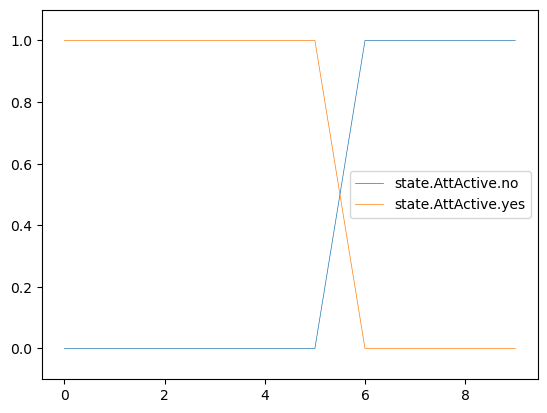

,agent_i.AttActive.no,agent_i.AttActive.yes,agent_i.action,agent_j.action,agent_i.observation.EndPtAlerts'
0,0.500000,0.500000,Nop,EnumAccounts,file_enum
1,0.125000,0.875000,Nop,EnumAccounts,file_enum
2,0.020000,0.980000,DeployDataDecoys,PrivEscAcc,su_login
3,0.002907,0.997093,Nop,FileRecon,file_enum
4,0.000416,0.999584,Nop,ManipulateData,file_write
5,0.000071,0.999929,Nop,Exit,none
6,0.995322,0.004678,Nop,Nop,none
7,1.000000,0.000000,Nop,Nop,none
8,1.000000,0.000000,Nop,Nop,file_enum
9,1.000000,0.000000,Nop,Nop,none


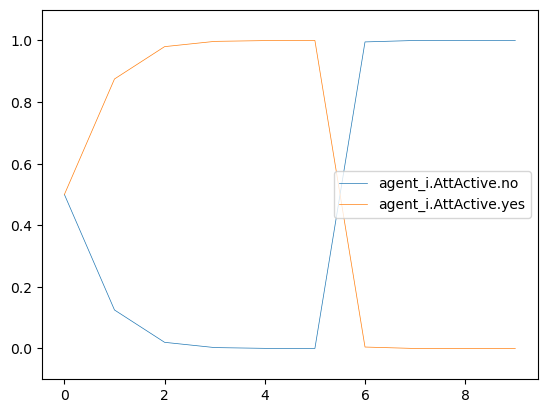

,agent_j.AttActive.no,agent_j.AttActive.yes,agent_j.action,agent_i.action,agent_j.observation.HostObs',agent_j.observation.ActionResult',agent_j.observation.ConnObs'
0,0.0,1.0,EnumAccounts,Nop,none,failure,active
1,0.0,1.0,EnumAccounts,Nop,user_files,success,active
2,0.0,1.0,PrivEscAcc,DeployDataDecoys,user_files,success,active
3,0.0,1.0,FileRecon,Nop,none,success,active
4,0.0,1.0,ManipulateData,Nop,user_files,failure,active
5,0.0,1.0,Exit,Nop,user_files,success,inactive
6,1.0,0.0,Nop,Nop,none,success,inactive
7,1.0,0.0,Nop,Nop,none,failure,inactive
8,1.0,0.0,Nop,Nop,user_files,failure,inactive
9,1.0,0.0,Nop,Nop,none,failure,inactive


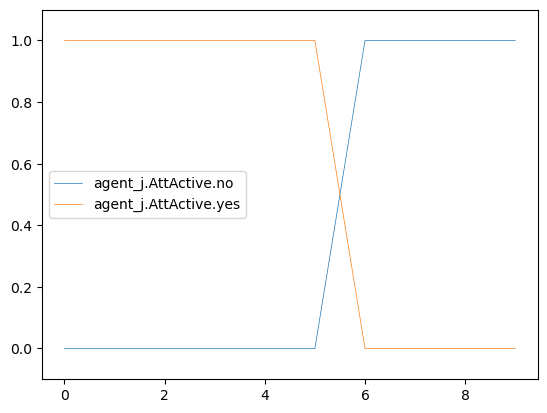

=============DataInjected============


,state.DataInjected.no,state.DataInjected.yes,agent_i.action,agent_j.action
0,1.0,0.0,Nop,EnumAccounts
1,1.0,0.0,Nop,EnumAccounts
2,1.0,0.0,DeployDataDecoys,PrivEscAcc
3,1.0,0.0,Nop,FileRecon
4,1.0,0.0,Nop,ManipulateData
5,0.0,1.0,Nop,Exit
6,0.0,1.0,Nop,Nop
7,0.0,1.0,Nop,Nop
8,0.0,1.0,Nop,Nop
9,0.0,1.0,Nop,Nop


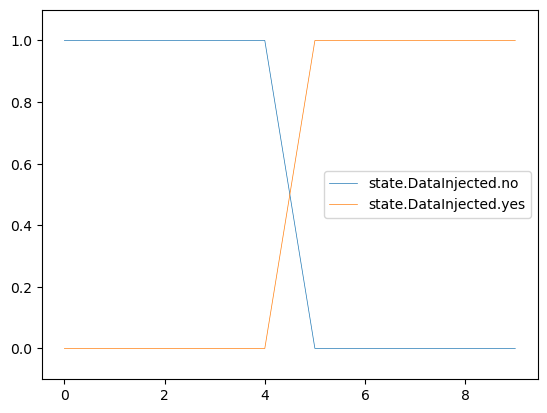

,agent_i.DataInjected.no,agent_i.DataInjected.yes,agent_i.action,agent_j.action,agent_i.observation.EndPtAlerts'
0,1.000000,0.000000,Nop,EnumAccounts,file_enum
1,1.000000,0.000000,Nop,EnumAccounts,file_enum
2,1.000000,0.000000,DeployDataDecoys,PrivEscAcc,su_login
3,1.000000,0.000000,Nop,FileRecon,file_enum
4,1.000000,0.000000,Nop,ManipulateData,file_write
5,0.044905,0.955095,Nop,Exit,none
6,0.013867,0.986133,Nop,Nop,none
7,0.013867,0.986133,Nop,Nop,none
8,0.013867,0.986133,Nop,Nop,file_enum
9,0.013867,0.986133,Nop,Nop,none


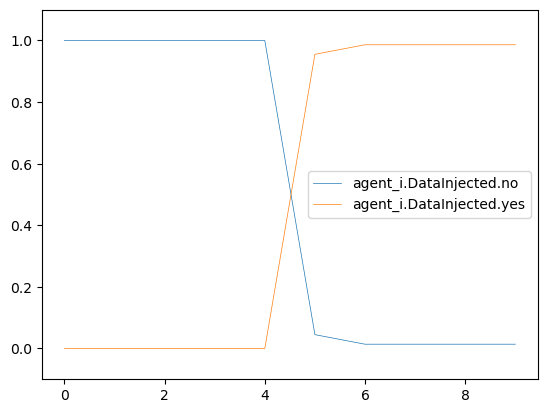

,agent_j.DataInjected.no,agent_j.DataInjected.yes,agent_j.action,agent_i.action,agent_j.observation.HostObs',agent_j.observation.ActionResult',agent_j.observation.ConnObs'
0,1.000000,0.000000,EnumAccounts,Nop,none,failure,active
1,1.000000,0.000000,EnumAccounts,Nop,user_files,success,active
2,1.000000,0.000000,PrivEscAcc,DeployDataDecoys,user_files,success,active
3,1.000000,0.000000,FileRecon,Nop,none,success,active
4,1.000000,0.000000,ManipulateData,Nop,user_files,failure,active
5,0.337744,0.662256,Exit,Nop,user_files,success,inactive
6,0.337744,0.662256,Nop,Nop,none,success,inactive
7,0.337744,0.662256,Nop,Nop,none,failure,inactive
8,0.337744,0.662256,Nop,Nop,user_files,failure,inactive
9,0.337744,0.662256,Nop,Nop,none,failure,inactive


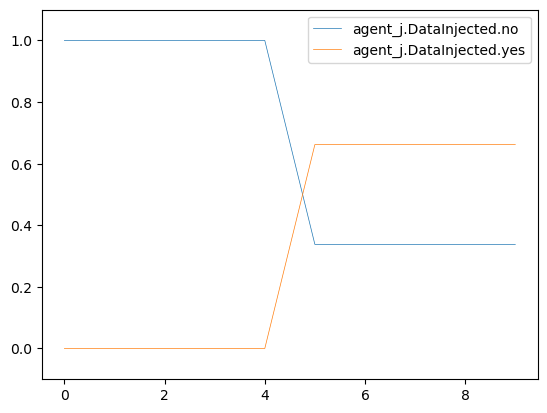

+++++++++++++++++++ End Interaction +++++++++++++++++++
+++++++++++++++++++ Begin Interaction +++++++++++++++++++


,agent_i.thetaj.AttackerFrame.att,agent_i.observation.EndPtAlerts'
0,1.0,file_enum
1,1.0,file_enum
2,1.0,none
3,1.0,file_enum
4,1.0,file_enum
5,1.0,none
6,1.0,none
7,1.0,none
8,1.0,none
9,1.0,file_enum


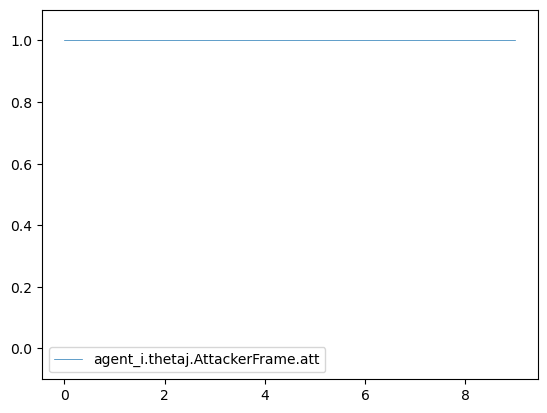

,agent_j.thetaj.DefFrame.highCap,agent_j.thetaj.DefFrame.lowCap,agent_j.observation.HostObs',agent_j.observation.ActionResult',agent_j.observation.ConnObs'
0,0.500000,0.500000,none,success,active
1,0.500000,0.500000,none,success,active
2,0.393939,0.606061,user_files,success,active
3,0.344262,0.655738,user_files,success,active
4,0.372842,0.627158,none,success,active
5,0.372842,0.627158,none,success,inactive
6,0.372842,0.627158,none,success,inactive
7,0.372842,0.627158,user_files,success,inactive
8,0.372842,0.627158,user_files,success,inactive
9,0.372842,0.627158,none,success,inactive


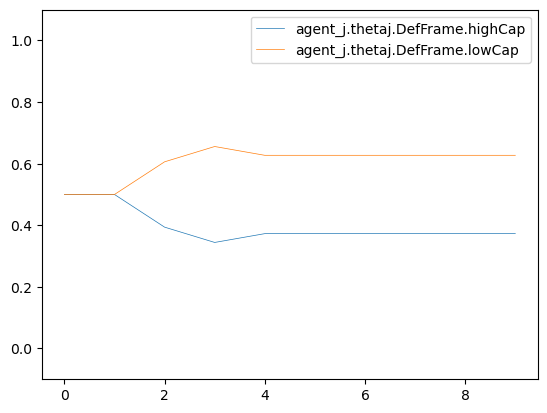

=============DataFound============


,state.DataFound.no,state.DataFound.yes,agent_i.action,agent_j.action
0,1.0,0.0,Nop,EnumAccounts
1,1.0,0.0,Nop,EnumAccounts
2,1.0,0.0,DeployDataDecoys,PrivEscAcc
3,1.0,0.0,Nop,FileRecon
4,0.0,1.0,Nop,ManipulateData
5,0.0,1.0,Nop,Exit
6,0.0,1.0,Nop,Nop
7,0.0,1.0,Nop,Nop
8,0.0,1.0,Nop,Nop
9,0.0,1.0,Nop,Nop


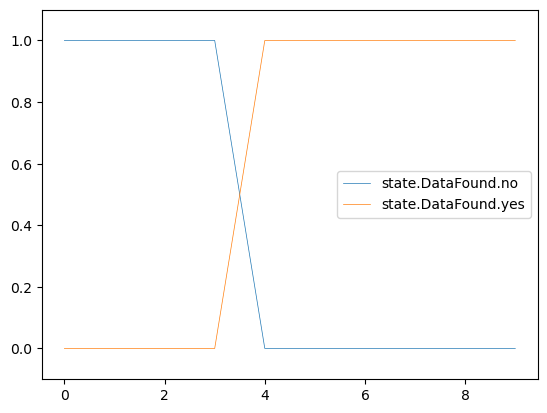

,agent_i.DataFound.no,agent_i.DataFound.yes,agent_i.action,agent_j.action,agent_i.observation.EndPtAlerts'
0,1.000000,0.000000,Nop,EnumAccounts,file_enum
1,1.000000,0.000000,Nop,EnumAccounts,file_enum
2,1.000000,0.000000,DeployDataDecoys,PrivEscAcc,none
3,1.000000,0.000000,Nop,FileRecon,file_enum
4,0.126820,0.873180,Nop,ManipulateData,file_enum
5,0.073091,0.926909,Nop,Exit,none
6,0.048234,0.951766,Nop,Nop,none
7,0.048234,0.951766,Nop,Nop,none
8,0.048234,0.951766,Nop,Nop,none
9,0.048234,0.951766,Nop,Nop,file_enum


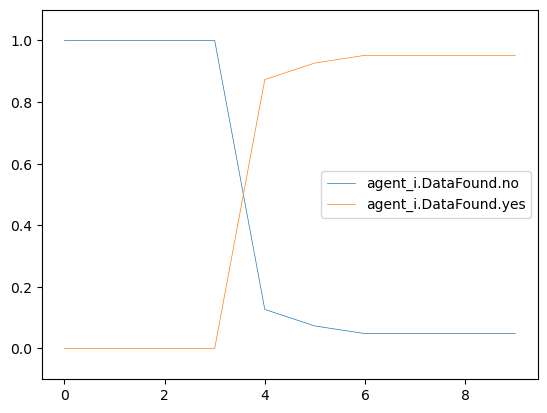

,agent_j.DataFound.no,agent_j.DataFound.yes,agent_j.action,agent_i.action,agent_j.observation.HostObs',agent_j.observation.ActionResult',agent_j.observation.ConnObs'
0,1.000000,0.000000,EnumAccounts,Nop,none,success,active
1,1.000000,0.000000,EnumAccounts,Nop,none,success,active
2,1.000000,0.000000,PrivEscAcc,DeployDataDecoys,user_files,success,active
3,1.000000,0.000000,FileRecon,Nop,user_files,success,active
4,0.323793,0.676207,ManipulateData,Nop,none,success,active
5,0.323793,0.676207,Exit,Nop,none,success,inactive
6,0.323793,0.676207,Nop,Nop,none,success,inactive
7,0.323793,0.676207,Nop,Nop,user_files,success,inactive
8,0.323793,0.676207,Nop,Nop,user_files,success,inactive
9,0.323793,0.676207,Nop,Nop,none,success,inactive


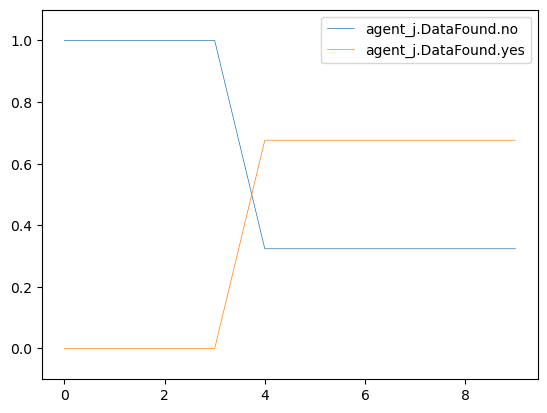

=============HostType============


,state.HostType.critical,state.HostType.critical_honeypot,state.HostType.honeypot,agent_i.action,agent_j.action
0,0.0,0.0,1.0,Nop,EnumAccounts
1,0.0,0.0,1.0,Nop,EnumAccounts
2,0.0,0.0,1.0,DeployDataDecoys,PrivEscAcc
3,0.0,0.0,1.0,Nop,FileRecon
4,0.0,0.0,1.0,Nop,ManipulateData
5,0.0,0.0,1.0,Nop,Exit
6,0.0,0.0,1.0,Nop,Nop
7,0.0,0.0,1.0,Nop,Nop
8,0.0,0.0,1.0,Nop,Nop
9,0.0,0.0,1.0,Nop,Nop


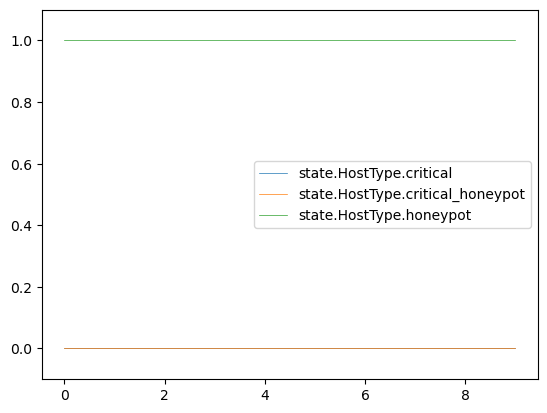

,agent_i.HostType.critical,agent_i.HostType.critical_honeypot,agent_i.HostType.honeypot,agent_i.action,agent_j.action,agent_i.observation.EndPtAlerts'
0,0.0,0.0,1.0,Nop,EnumAccounts,file_enum
1,0.0,0.0,1.0,Nop,EnumAccounts,file_enum
2,0.0,0.0,1.0,DeployDataDecoys,PrivEscAcc,none
3,0.0,0.0,1.0,Nop,FileRecon,file_enum
4,0.0,0.0,1.0,Nop,ManipulateData,file_enum
5,0.0,0.0,1.0,Nop,Exit,none
6,0.0,0.0,1.0,Nop,Nop,none
7,0.0,0.0,1.0,Nop,Nop,none
8,0.0,0.0,1.0,Nop,Nop,none
9,0.0,0.0,1.0,Nop,Nop,file_enum


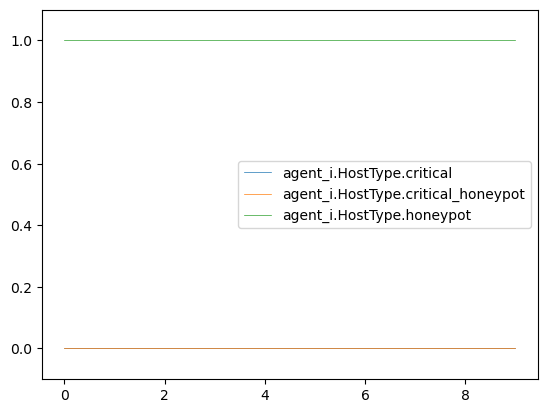

,agent_j.HostType.critical,agent_j.HostType.critical_honeypot,agent_j.HostType.honeypot,agent_j.action,agent_i.action,agent_j.observation.HostObs',agent_j.observation.ActionResult',agent_j.observation.ConnObs'
0,0.0,1.0,0.0,EnumAccounts,Nop,none,success,active
1,0.0,1.0,0.0,EnumAccounts,Nop,none,success,active
2,0.0,1.0,0.0,PrivEscAcc,DeployDataDecoys,user_files,success,active
3,0.0,1.0,0.0,FileRecon,Nop,user_files,success,active
4,0.0,1.0,0.0,ManipulateData,Nop,none,success,active
5,0.0,1.0,0.0,Exit,Nop,none,success,inactive
6,0.0,1.0,0.0,Nop,Nop,none,success,inactive
7,0.0,1.0,0.0,Nop,Nop,user_files,success,inactive
8,0.0,1.0,0.0,Nop,Nop,user_files,success,inactive
9,0.0,1.0,0.0,Nop,Nop,none,success,inactive


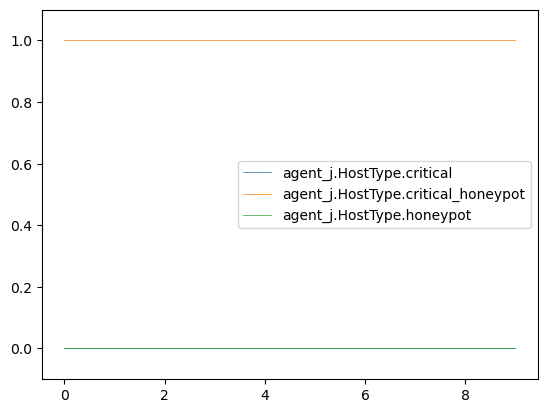

=============AccessLevel============


,state.AccessLevel.root,state.AccessLevel.user,agent_i.action,agent_j.action
0,0.0,1.0,Nop,EnumAccounts
1,0.0,1.0,Nop,EnumAccounts
2,0.0,1.0,DeployDataDecoys,PrivEscAcc
3,1.0,0.0,Nop,FileRecon
4,1.0,0.0,Nop,ManipulateData
5,1.0,0.0,Nop,Exit
6,1.0,0.0,Nop,Nop
7,1.0,0.0,Nop,Nop
8,1.0,0.0,Nop,Nop
9,1.0,0.0,Nop,Nop


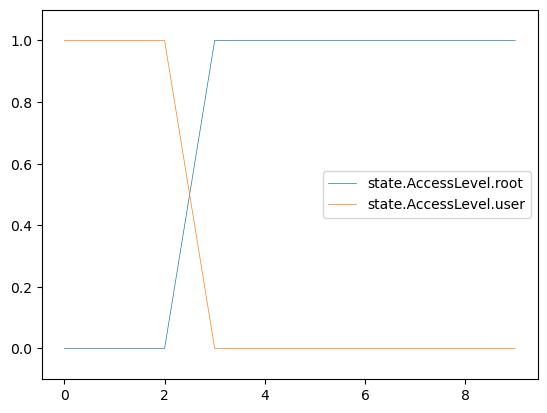

,agent_i.AccessLevel.root,agent_i.AccessLevel.user,agent_i.action,agent_j.action,agent_i.observation.EndPtAlerts'
0,0.000000,1.000000,Nop,EnumAccounts,file_enum
1,0.000000,1.000000,Nop,EnumAccounts,file_enum
2,0.000000,1.000000,DeployDataDecoys,PrivEscAcc,none
3,0.866250,0.133750,Nop,FileRecon,file_enum
4,0.970200,0.029800,Nop,ManipulateData,file_enum
5,0.960623,0.039377,Nop,Exit,none
6,0.970200,0.029800,Nop,Nop,none
7,0.970200,0.029800,Nop,Nop,none
8,0.970200,0.029800,Nop,Nop,none
9,0.970200,0.029800,Nop,Nop,file_enum


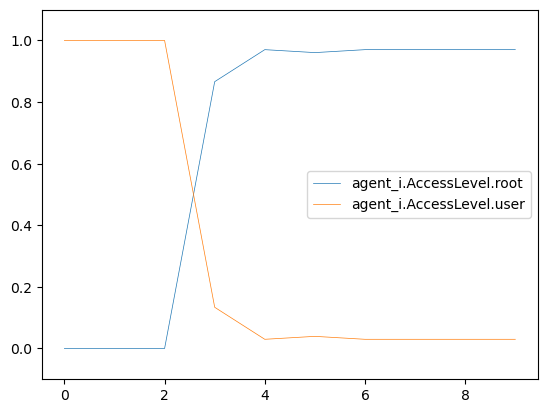

,agent_j.AccessLevel.root,agent_j.AccessLevel.user,agent_j.action,agent_i.action,agent_j.observation.HostObs',agent_j.observation.ActionResult',agent_j.observation.ConnObs'
0,0.000000,1.000000,EnumAccounts,Nop,none,success,active
1,0.000000,1.000000,EnumAccounts,Nop,none,success,active
2,0.000000,1.000000,PrivEscAcc,DeployDataDecoys,user_files,success,active
3,0.960175,0.039825,FileRecon,Nop,user_files,success,active
4,0.964642,0.035358,ManipulateData,Nop,none,success,active
5,0.964642,0.035358,Exit,Nop,none,success,inactive
6,0.964642,0.035358,Nop,Nop,none,success,inactive
7,0.964642,0.035358,Nop,Nop,user_files,success,inactive
8,0.964642,0.035358,Nop,Nop,user_files,success,inactive
9,0.964642,0.035358,Nop,Nop,none,success,inactive


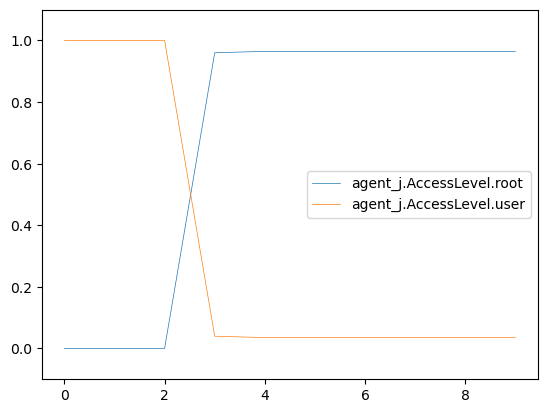

=============DataPrivs============


,state.DataPrivs.root,state.DataPrivs.user,agent_i.action,agent_j.action
0,1.0,0.0,Nop,EnumAccounts
1,1.0,0.0,Nop,EnumAccounts
2,1.0,0.0,DeployDataDecoys,PrivEscAcc
3,1.0,0.0,Nop,FileRecon
4,1.0,0.0,Nop,ManipulateData
5,1.0,0.0,Nop,Exit
6,1.0,0.0,Nop,Nop
7,1.0,0.0,Nop,Nop
8,1.0,0.0,Nop,Nop
9,1.0,0.0,Nop,Nop


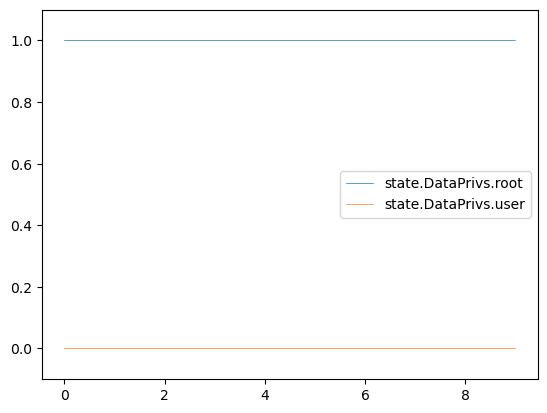

,agent_i.DataPrivs.root,agent_i.DataPrivs.user,agent_i.action,agent_j.action,agent_i.observation.EndPtAlerts'
0,1.0,0.0,Nop,EnumAccounts,file_enum
1,1.0,0.0,Nop,EnumAccounts,file_enum
2,1.0,0.0,DeployDataDecoys,PrivEscAcc,none
3,1.0,0.0,Nop,FileRecon,file_enum
4,1.0,0.0,Nop,ManipulateData,file_enum
5,1.0,0.0,Nop,Exit,none
6,1.0,0.0,Nop,Nop,none
7,1.0,0.0,Nop,Nop,none
8,1.0,0.0,Nop,Nop,none
9,1.0,0.0,Nop,Nop,file_enum


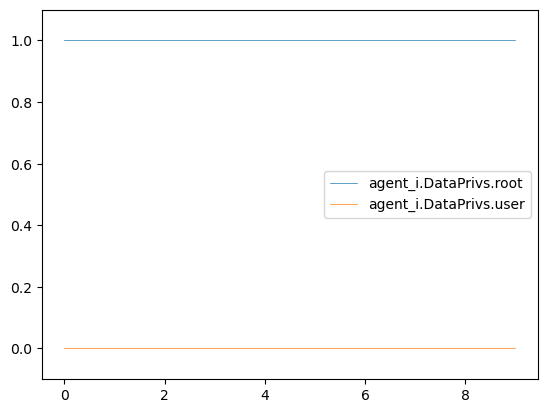

,agent_j.DataPrivs.root,agent_j.DataPrivs.user,agent_j.action,agent_i.action,agent_j.observation.HostObs',agent_j.observation.ActionResult',agent_j.observation.ConnObs'
0,0.500000,0.500000,EnumAccounts,Nop,none,success,active
1,0.500000,0.500000,EnumAccounts,Nop,none,success,active
2,0.500000,0.500000,PrivEscAcc,DeployDataDecoys,user_files,success,active
3,0.500000,0.500000,FileRecon,Nop,user_files,success,active
4,0.497674,0.502326,ManipulateData,Nop,none,success,active
5,0.497674,0.502326,Exit,Nop,none,success,inactive
6,0.497674,0.502326,Nop,Nop,none,success,inactive
7,0.497674,0.502326,Nop,Nop,user_files,success,inactive
8,0.497674,0.502326,Nop,Nop,user_files,success,inactive
9,0.497674,0.502326,Nop,Nop,none,success,inactive


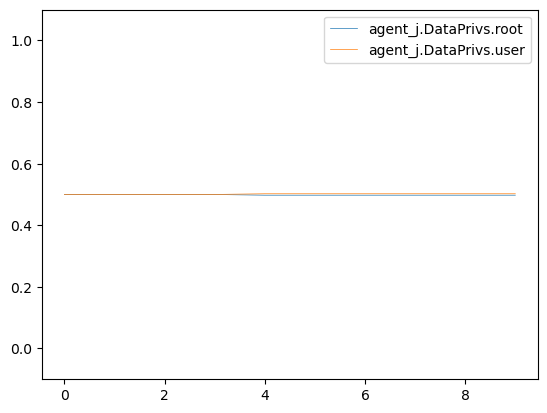

=============EscAccounts============


,state.EscAccounts.no,state.EscAccounts.yes,agent_i.action,agent_j.action
0,0.0,1.0,Nop,EnumAccounts
1,0.0,1.0,Nop,EnumAccounts
2,0.0,1.0,DeployDataDecoys,PrivEscAcc
3,0.0,1.0,Nop,FileRecon
4,0.0,1.0,Nop,ManipulateData
5,0.0,1.0,Nop,Exit
6,0.0,1.0,Nop,Nop
7,0.0,1.0,Nop,Nop
8,0.0,1.0,Nop,Nop
9,0.0,1.0,Nop,Nop


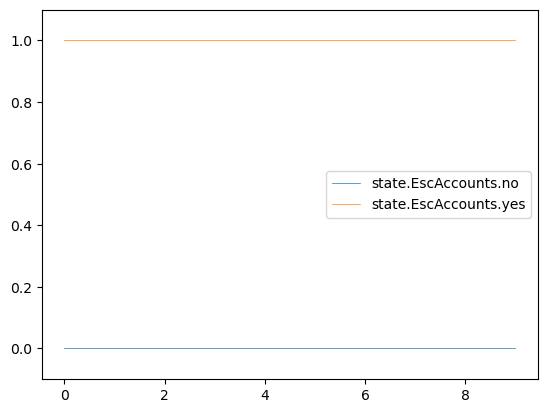

,agent_i.EscAccounts.no,agent_i.EscAccounts.yes,agent_i.action,agent_j.action,agent_i.observation.EndPtAlerts'
0,0.0,1.0,Nop,EnumAccounts,file_enum
1,0.0,1.0,Nop,EnumAccounts,file_enum
2,0.0,1.0,DeployDataDecoys,PrivEscAcc,none
3,0.0,1.0,Nop,FileRecon,file_enum
4,0.0,1.0,Nop,ManipulateData,file_enum
5,0.0,1.0,Nop,Exit,none
6,0.0,1.0,Nop,Nop,none
7,0.0,1.0,Nop,Nop,none
8,0.0,1.0,Nop,Nop,none
9,0.0,1.0,Nop,Nop,file_enum


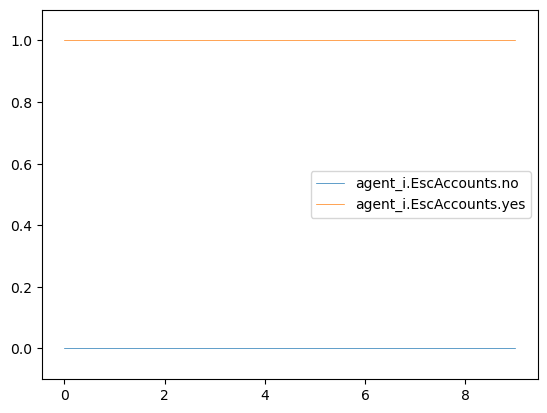

,agent_j.EscAccounts.no,agent_j.EscAccounts.yes,agent_j.action,agent_i.action,agent_j.observation.HostObs',agent_j.observation.ActionResult',agent_j.observation.ConnObs'
0,0.500000,0.500000,EnumAccounts,Nop,none,success,active
1,0.408682,0.591318,EnumAccounts,Nop,none,success,active
2,0.312959,0.687041,PrivEscAcc,DeployDataDecoys,user_files,success,active
3,0.039430,0.960569,FileRecon,Nop,user_files,success,active
4,0.035008,0.964992,ManipulateData,Nop,none,success,active
5,0.035008,0.964992,Exit,Nop,none,success,inactive
6,0.035008,0.964992,Nop,Nop,none,success,inactive
7,0.035008,0.964992,Nop,Nop,user_files,success,inactive
8,0.035008,0.964992,Nop,Nop,user_files,success,inactive
9,0.035008,0.964992,Nop,Nop,none,success,inactive


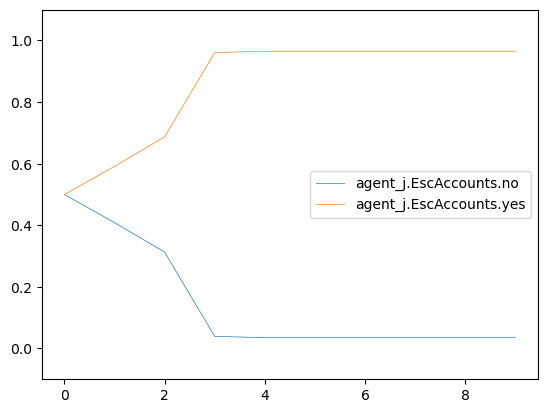

=============AccFound============


,state.AccFound.no,state.AccFound.yes,agent_i.action,agent_j.action
0,1.0,0.0,Nop,EnumAccounts
1,0.0,1.0,Nop,EnumAccounts
2,0.0,1.0,DeployDataDecoys,PrivEscAcc
3,0.0,1.0,Nop,FileRecon
4,0.0,1.0,Nop,ManipulateData
5,0.0,1.0,Nop,Exit
6,0.0,1.0,Nop,Nop
7,0.0,1.0,Nop,Nop
8,0.0,1.0,Nop,Nop
9,0.0,1.0,Nop,Nop


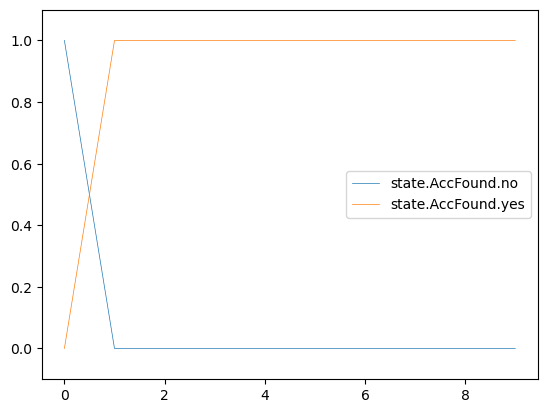

,agent_i.AccFound.no,agent_i.AccFound.yes,agent_i.action,agent_j.action,agent_i.observation.EndPtAlerts'
0,1.000000,0.000000,Nop,EnumAccounts,file_enum
1,0.212500,0.787500,Nop,EnumAccounts,file_enum
2,0.029800,0.970200,DeployDataDecoys,PrivEscAcc,none
3,0.133750,0.866250,Nop,FileRecon,file_enum
4,0.029800,0.970200,Nop,ManipulateData,file_enum
5,0.039377,0.960623,Nop,Exit,none
6,0.029800,0.970200,Nop,Nop,none
7,0.029800,0.970200,Nop,Nop,none
8,0.029800,0.970200,Nop,Nop,none
9,0.029800,0.970200,Nop,Nop,file_enum


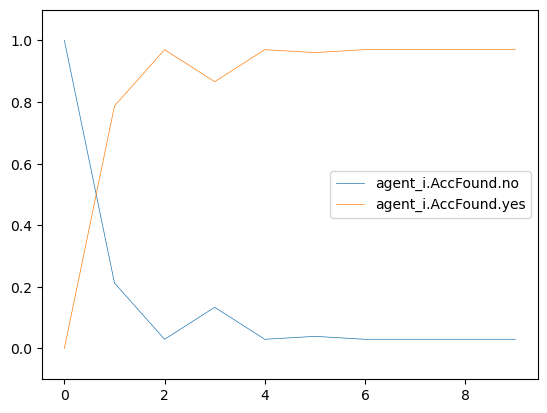

,agent_j.AccFound.no,agent_j.AccFound.yes,agent_j.action,agent_i.action,agent_j.observation.HostObs',agent_j.observation.ActionResult',agent_j.observation.ConnObs'
0,1.000000,0.000000,EnumAccounts,Nop,none,success,active
1,0.449550,0.550450,EnumAccounts,Nop,none,success,active
2,0.316088,0.683912,PrivEscAcc,DeployDataDecoys,user_files,success,active
3,0.039825,0.960175,FileRecon,Nop,user_files,success,active
4,0.035358,0.964642,ManipulateData,Nop,none,success,active
5,0.035358,0.964642,Exit,Nop,none,success,inactive
6,0.035358,0.964642,Nop,Nop,none,success,inactive
7,0.035358,0.964642,Nop,Nop,user_files,success,inactive
8,0.035358,0.964642,Nop,Nop,user_files,success,inactive
9,0.035358,0.964642,Nop,Nop,none,success,inactive


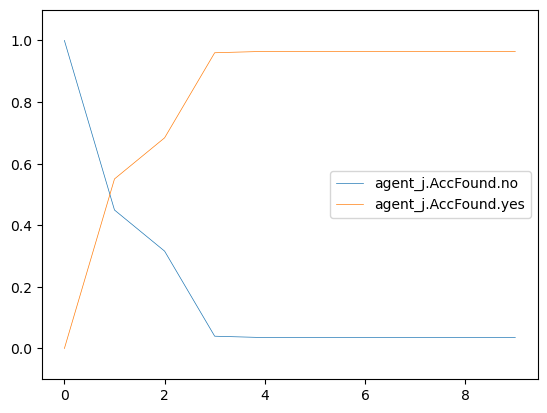

=============HostHasData============


,state.HostHasData.no,state.HostHasData.yes,agent_i.action,agent_j.action
0,1.0,0.0,Nop,EnumAccounts
1,1.0,0.0,Nop,EnumAccounts
2,1.0,0.0,DeployDataDecoys,PrivEscAcc
3,0.0,1.0,Nop,FileRecon
4,0.0,1.0,Nop,ManipulateData
5,0.0,1.0,Nop,Exit
6,0.0,1.0,Nop,Nop
7,0.0,1.0,Nop,Nop
8,0.0,1.0,Nop,Nop
9,0.0,1.0,Nop,Nop


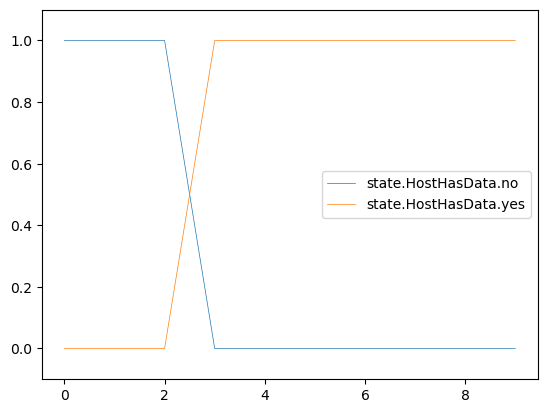

,agent_i.HostHasData.no,agent_i.HostHasData.yes,agent_i.action,agent_j.action,agent_i.observation.EndPtAlerts'
0,1.0,0.0,Nop,EnumAccounts,file_enum
1,1.0,0.0,Nop,EnumAccounts,file_enum
2,1.0,0.0,DeployDataDecoys,PrivEscAcc,none
3,0.0,1.0,Nop,FileRecon,file_enum
4,0.0,1.0,Nop,ManipulateData,file_enum
5,0.0,1.0,Nop,Exit,none
6,0.0,1.0,Nop,Nop,none
7,0.0,1.0,Nop,Nop,none
8,0.0,1.0,Nop,Nop,none
9,0.0,1.0,Nop,Nop,file_enum


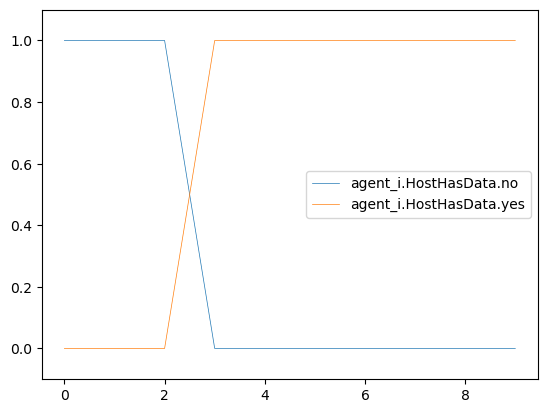

,agent_j.HostHasData.no,agent_j.HostHasData.yes,agent_j.action,agent_i.action,agent_j.observation.HostObs',agent_j.observation.ActionResult',agent_j.observation.ConnObs'
0,0.500000,0.500000,EnumAccounts,Nop,none,success,active
1,0.500000,0.500000,EnumAccounts,Nop,none,success,active
2,0.500000,0.500000,PrivEscAcc,DeployDataDecoys,user_files,success,active
3,0.344262,0.655738,FileRecon,Nop,user_files,success,active
4,0.264004,0.735996,ManipulateData,Nop,none,success,active
5,0.264004,0.735996,Exit,Nop,none,success,inactive
6,0.264004,0.735996,Nop,Nop,none,success,inactive
7,0.264004,0.735996,Nop,Nop,user_files,success,inactive
8,0.264004,0.735996,Nop,Nop,user_files,success,inactive
9,0.264004,0.735996,Nop,Nop,none,success,inactive


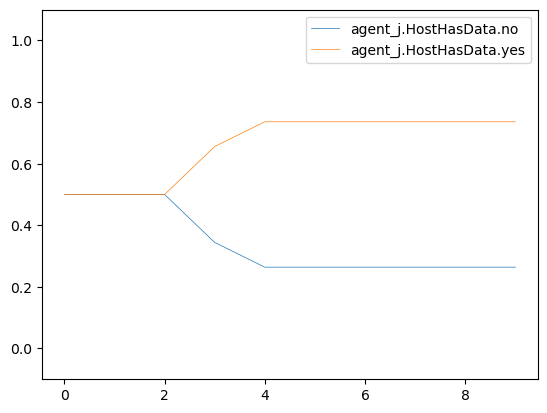

=============AttActive============


,state.AttActive.no,state.AttActive.yes,agent_i.action,agent_j.action
0,0.0,1.0,Nop,EnumAccounts
1,0.0,1.0,Nop,EnumAccounts
2,0.0,1.0,DeployDataDecoys,PrivEscAcc
3,0.0,1.0,Nop,FileRecon
4,0.0,1.0,Nop,ManipulateData
5,0.0,1.0,Nop,Exit
6,1.0,0.0,Nop,Nop
7,1.0,0.0,Nop,Nop
8,1.0,0.0,Nop,Nop
9,1.0,0.0,Nop,Nop


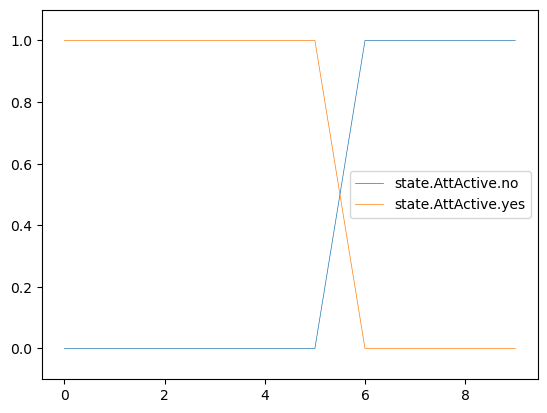

,agent_i.AttActive.no,agent_i.AttActive.yes,agent_i.action,agent_j.action,agent_i.observation.EndPtAlerts'
0,0.500000,0.500000,Nop,EnumAccounts,file_enum
1,0.125000,0.875000,Nop,EnumAccounts,file_enum
2,0.020000,0.980000,DeployDataDecoys,PrivEscAcc,none
3,0.125000,0.875000,Nop,FileRecon,file_enum
4,0.020000,0.980000,Nop,ManipulateData,file_enum
5,0.009520,0.990480,Nop,Exit,none
6,0.816544,0.183456,Nop,Nop,none
7,1.000000,0.000000,Nop,Nop,none
8,1.000000,0.000000,Nop,Nop,none
9,1.000000,0.000000,Nop,Nop,file_enum


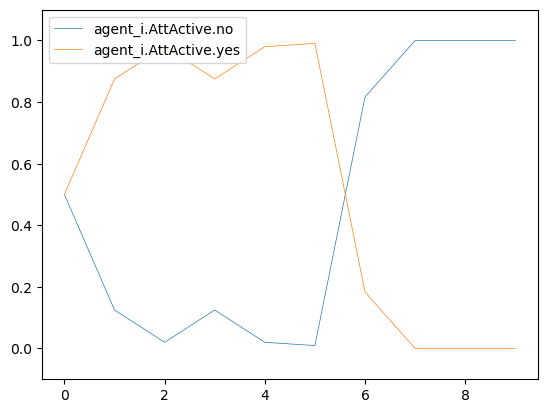

,agent_j.AttActive.no,agent_j.AttActive.yes,agent_j.action,agent_i.action,agent_j.observation.HostObs',agent_j.observation.ActionResult',agent_j.observation.ConnObs'
0,0.0,1.0,EnumAccounts,Nop,none,success,active
1,0.0,1.0,EnumAccounts,Nop,none,success,active
2,0.0,1.0,PrivEscAcc,DeployDataDecoys,user_files,success,active
3,0.0,1.0,FileRecon,Nop,user_files,success,active
4,0.0,1.0,ManipulateData,Nop,none,success,active
5,0.0,1.0,Exit,Nop,none,success,inactive
6,1.0,0.0,Nop,Nop,none,success,inactive
7,1.0,0.0,Nop,Nop,user_files,success,inactive
8,1.0,0.0,Nop,Nop,user_files,success,inactive
9,1.0,0.0,Nop,Nop,none,success,inactive


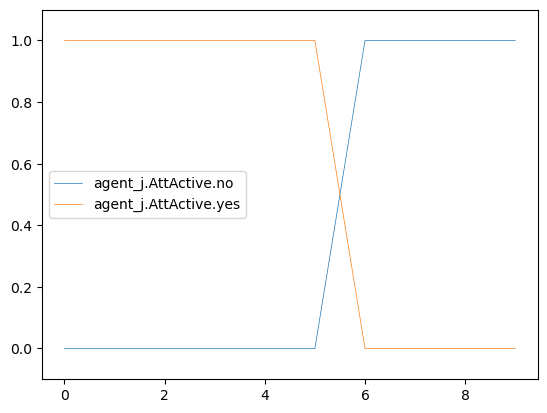

=============DataInjected============


,state.DataInjected.no,state.DataInjected.yes,agent_i.action,agent_j.action
0,1.0,0.0,Nop,EnumAccounts
1,1.0,0.0,Nop,EnumAccounts
2,1.0,0.0,DeployDataDecoys,PrivEscAcc
3,1.0,0.0,Nop,FileRecon
4,1.0,0.0,Nop,ManipulateData
5,0.0,1.0,Nop,Exit
6,0.0,1.0,Nop,Nop
7,0.0,1.0,Nop,Nop
8,0.0,1.0,Nop,Nop
9,0.0,1.0,Nop,Nop


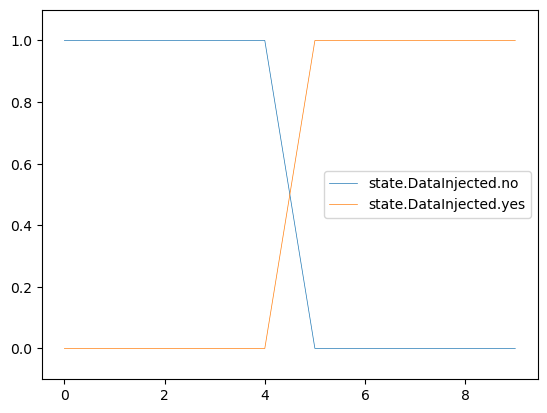

,agent_i.DataInjected.no,agent_i.DataInjected.yes,agent_i.action,agent_j.action,agent_i.observation.EndPtAlerts'
0,1.000000,0.000000,Nop,EnumAccounts,file_enum
1,1.000000,0.000000,Nop,EnumAccounts,file_enum
2,1.000000,0.000000,DeployDataDecoys,PrivEscAcc,none
3,1.000000,0.000000,Nop,FileRecon,file_enum
4,1.000000,0.000000,Nop,ManipulateData,file_enum
5,0.625911,0.374089,Nop,Exit,none
6,0.048234,0.951766,Nop,Nop,none
7,0.048234,0.951766,Nop,Nop,none
8,0.048234,0.951766,Nop,Nop,none
9,0.048234,0.951766,Nop,Nop,file_enum


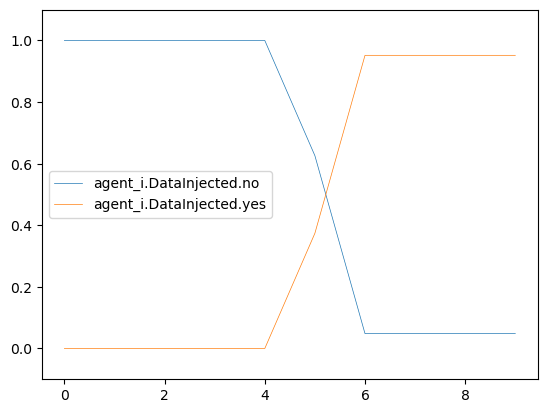

,agent_j.DataInjected.no,agent_j.DataInjected.yes,agent_j.action,agent_i.action,agent_j.observation.HostObs',agent_j.observation.ActionResult',agent_j.observation.ConnObs'
0,1.000000,0.000000,EnumAccounts,Nop,none,success,active
1,1.000000,0.000000,EnumAccounts,Nop,none,success,active
2,1.000000,0.000000,PrivEscAcc,DeployDataDecoys,user_files,success,active
3,1.000000,0.000000,FileRecon,Nop,user_files,success,active
4,1.000000,0.000000,ManipulateData,Nop,none,success,active
5,0.323793,0.676207,Exit,Nop,none,success,inactive
6,0.323793,0.676207,Nop,Nop,none,success,inactive
7,0.323793,0.676207,Nop,Nop,user_files,success,inactive
8,0.323793,0.676207,Nop,Nop,user_files,success,inactive
9,0.323793,0.676207,Nop,Nop,none,success,inactive


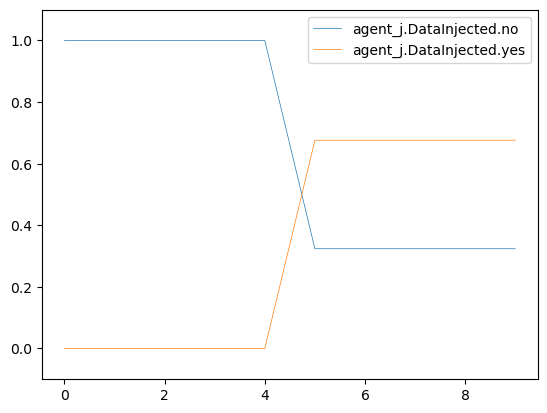

+++++++++++++++++++ End Interaction +++++++++++++++++++
+++++++++++++++++++ Begin Interaction +++++++++++++++++++


,agent_i.thetaj.AttackerFrame.att,agent_i.observation.EndPtAlerts'
0,1.0,file_enum
1,1.0,file_enum
2,1.0,file_enum
3,1.0,none
4,1.0,file_enum
5,1.0,none
6,1.0,none
7,1.0,none
8,1.0,none
9,1.0,file_enum


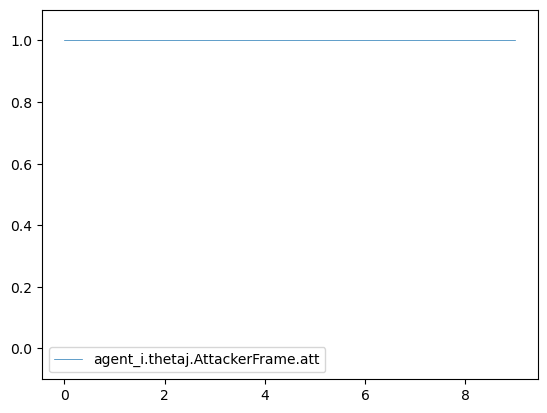

,agent_j.thetaj.DefFrame.highCap,agent_j.thetaj.DefFrame.lowCap,agent_j.observation.HostObs',agent_j.observation.ActionResult',agent_j.observation.ConnObs'
0,0.500000,0.500000,none,failure,active
1,0.500000,0.500000,none,success,active
2,0.393939,0.606061,none,success,active
3,0.344262,0.655738,none,success,active
4,0.372010,0.627990,none,success,active
5,0.372010,0.627990,none,success,inactive
6,0.372010,0.627990,none,success,inactive
7,0.372010,0.627990,none,failure,inactive
8,0.372010,0.627990,none,success,inactive
9,0.372010,0.627990,user_files,success,inactive


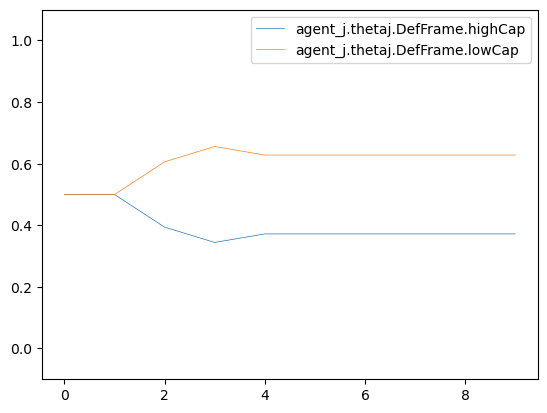

=============DataFound============


,state.DataFound.no,state.DataFound.yes,agent_i.action,agent_j.action
0,1.0,0.0,Nop,EnumAccounts
1,1.0,0.0,Nop,EnumAccounts
2,1.0,0.0,DeployDataDecoys,PrivEscAcc
3,1.0,0.0,Nop,FileRecon
4,0.0,1.0,Nop,ManipulateData
5,0.0,1.0,Nop,Exit
6,0.0,1.0,Nop,Nop
7,0.0,1.0,Nop,Nop
8,0.0,1.0,Nop,Nop
9,0.0,1.0,Nop,Nop


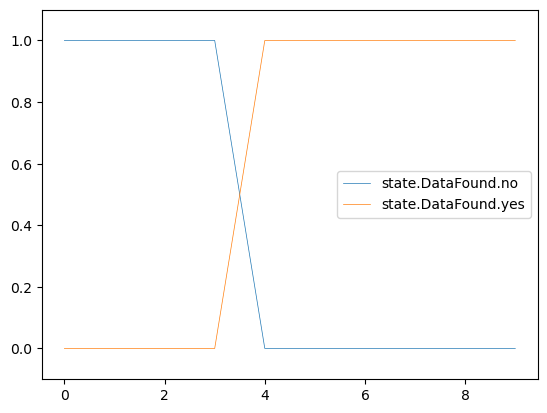

,agent_i.DataFound.no,agent_i.DataFound.yes,agent_i.action,agent_j.action,agent_i.observation.EndPtAlerts'
0,1.000000,0.000000,Nop,EnumAccounts,file_enum
1,1.000000,0.000000,Nop,EnumAccounts,file_enum
2,1.000000,0.000000,DeployDataDecoys,PrivEscAcc,file_enum
3,1.000000,0.000000,Nop,FileRecon,none
4,0.220375,0.779625,Nop,ManipulateData,file_enum
5,0.123177,0.876823,Nop,Exit,none
6,0.150209,0.849791,Nop,Nop,none
7,0.150209,0.849791,Nop,Nop,none
8,0.150209,0.849791,Nop,Nop,none
9,0.150209,0.849791,Nop,Nop,file_enum


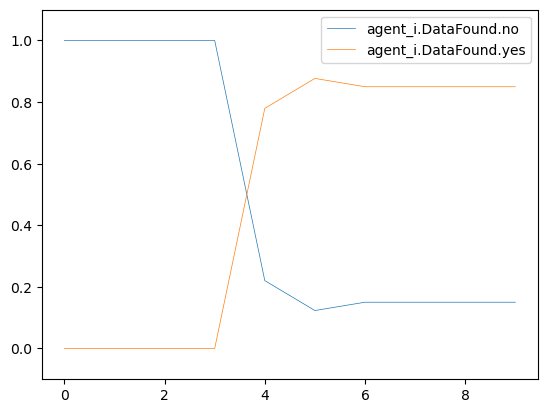

,agent_j.DataFound.no,agent_j.DataFound.yes,agent_j.action,agent_i.action,agent_j.observation.HostObs',agent_j.observation.ActionResult',agent_j.observation.ConnObs'
0,1.000000,0.000000,EnumAccounts,Nop,none,failure,active
1,1.000000,0.000000,EnumAccounts,Nop,none,success,active
2,1.000000,0.000000,PrivEscAcc,DeployDataDecoys,none,success,active
3,1.000000,0.000000,FileRecon,Nop,none,success,active
4,0.337744,0.662256,ManipulateData,Nop,none,success,active
5,0.337744,0.662256,Exit,Nop,none,success,inactive
6,0.337744,0.662256,Nop,Nop,none,success,inactive
7,0.337744,0.662256,Nop,Nop,none,failure,inactive
8,0.337744,0.662256,Nop,Nop,none,success,inactive
9,0.337744,0.662256,Nop,Nop,user_files,success,inactive


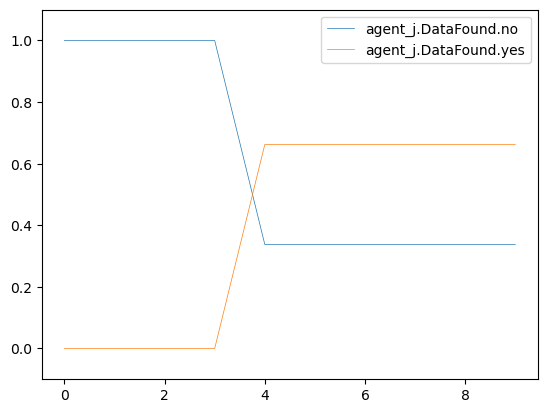

=============HostType============


,state.HostType.critical,state.HostType.critical_honeypot,state.HostType.honeypot,agent_i.action,agent_j.action
0,0.0,0.0,1.0,Nop,EnumAccounts
1,0.0,0.0,1.0,Nop,EnumAccounts
2,0.0,0.0,1.0,DeployDataDecoys,PrivEscAcc
3,0.0,0.0,1.0,Nop,FileRecon
4,0.0,0.0,1.0,Nop,ManipulateData
5,0.0,0.0,1.0,Nop,Exit
6,0.0,0.0,1.0,Nop,Nop
7,0.0,0.0,1.0,Nop,Nop
8,0.0,0.0,1.0,Nop,Nop
9,0.0,0.0,1.0,Nop,Nop


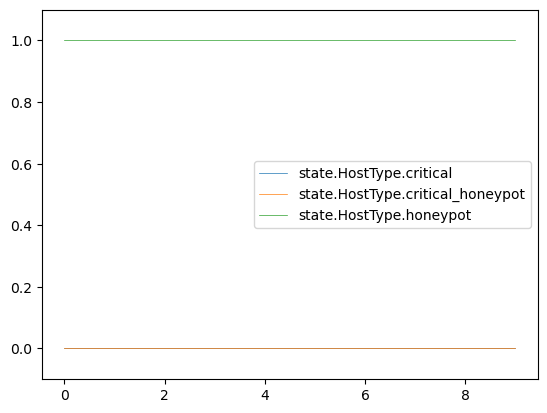

,agent_i.HostType.critical,agent_i.HostType.critical_honeypot,agent_i.HostType.honeypot,agent_i.action,agent_j.action,agent_i.observation.EndPtAlerts'
0,0.0,0.0,1.0,Nop,EnumAccounts,file_enum
1,0.0,0.0,1.0,Nop,EnumAccounts,file_enum
2,0.0,0.0,1.0,DeployDataDecoys,PrivEscAcc,file_enum
3,0.0,0.0,1.0,Nop,FileRecon,none
4,0.0,0.0,1.0,Nop,ManipulateData,file_enum
5,0.0,0.0,1.0,Nop,Exit,none
6,0.0,0.0,1.0,Nop,Nop,none
7,0.0,0.0,1.0,Nop,Nop,none
8,0.0,0.0,1.0,Nop,Nop,none
9,0.0,0.0,1.0,Nop,Nop,file_enum


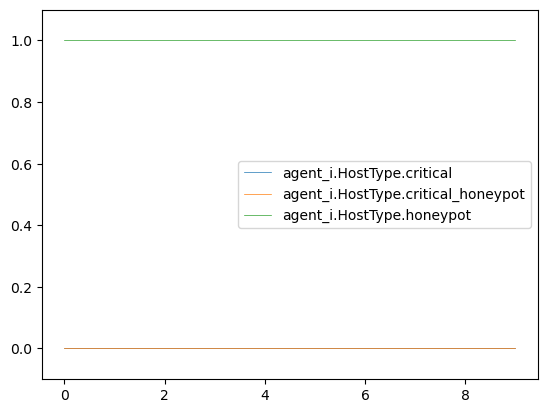

,agent_j.HostType.critical,agent_j.HostType.critical_honeypot,agent_j.HostType.honeypot,agent_j.action,agent_i.action,agent_j.observation.HostObs',agent_j.observation.ActionResult',agent_j.observation.ConnObs'
0,0.0,1.0,0.0,EnumAccounts,Nop,none,failure,active
1,0.0,1.0,0.0,EnumAccounts,Nop,none,success,active
2,0.0,1.0,0.0,PrivEscAcc,DeployDataDecoys,none,success,active
3,0.0,1.0,0.0,FileRecon,Nop,none,success,active
4,0.0,1.0,0.0,ManipulateData,Nop,none,success,active
5,0.0,1.0,0.0,Exit,Nop,none,success,inactive
6,0.0,1.0,0.0,Nop,Nop,none,success,inactive
7,0.0,1.0,0.0,Nop,Nop,none,failure,inactive
8,0.0,1.0,0.0,Nop,Nop,none,success,inactive
9,0.0,1.0,0.0,Nop,Nop,user_files,success,inactive


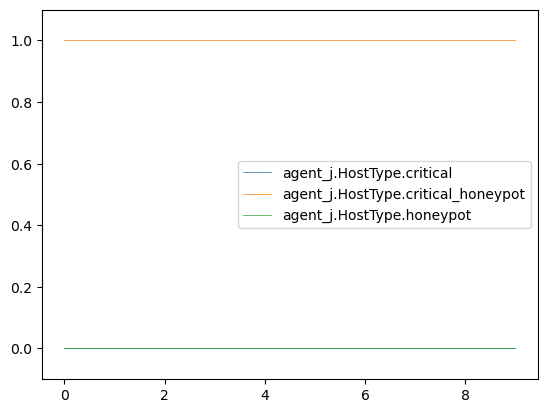

=============AccessLevel============


,state.AccessLevel.root,state.AccessLevel.user,agent_i.action,agent_j.action
0,0.0,1.0,Nop,EnumAccounts
1,0.0,1.0,Nop,EnumAccounts
2,0.0,1.0,DeployDataDecoys,PrivEscAcc
3,1.0,0.0,Nop,FileRecon
4,1.0,0.0,Nop,ManipulateData
5,1.0,0.0,Nop,Exit
6,1.0,0.0,Nop,Nop
7,1.0,0.0,Nop,Nop
8,1.0,0.0,Nop,Nop
9,1.0,0.0,Nop,Nop


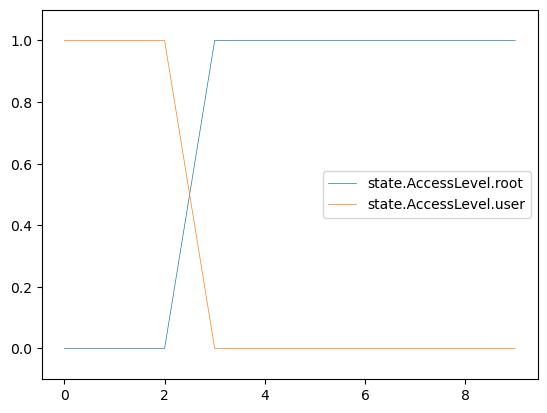

,agent_i.AccessLevel.root,agent_i.AccessLevel.user,agent_i.action,agent_j.action,agent_i.observation.EndPtAlerts'
0,0.000000,1.000000,Nop,EnumAccounts,file_enum
1,0.000000,1.000000,Nop,EnumAccounts,file_enum
2,0.000000,1.000000,DeployDataDecoys,PrivEscAcc,file_enum
3,0.970200,0.029800,Nop,FileRecon,none
4,0.866250,0.133750,Nop,ManipulateData,file_enum
5,0.908715,0.091285,Nop,Exit,none
6,0.866250,0.133750,Nop,Nop,none
7,0.866250,0.133750,Nop,Nop,none
8,0.866250,0.133750,Nop,Nop,none
9,0.866250,0.133750,Nop,Nop,file_enum


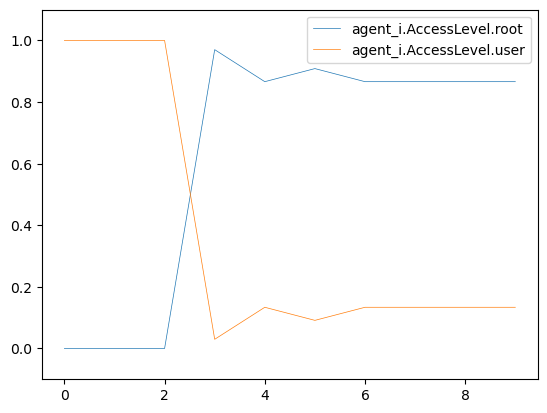

,agent_j.AccessLevel.root,agent_j.AccessLevel.user,agent_j.action,agent_i.action,agent_j.observation.HostObs',agent_j.observation.ActionResult',agent_j.observation.ConnObs'
0,0.000000,1.000000,EnumAccounts,Nop,none,failure,active
1,0.000000,1.000000,EnumAccounts,Nop,none,success,active
2,0.000000,1.000000,PrivEscAcc,DeployDataDecoys,none,success,active
3,0.909011,0.090989,FileRecon,Nop,none,success,active
4,0.918705,0.081295,ManipulateData,Nop,none,success,active
5,0.918705,0.081295,Exit,Nop,none,success,inactive
6,0.918705,0.081295,Nop,Nop,none,success,inactive
7,0.918705,0.081295,Nop,Nop,none,failure,inactive
8,0.918705,0.081295,Nop,Nop,none,success,inactive
9,0.918705,0.081295,Nop,Nop,user_files,success,inactive


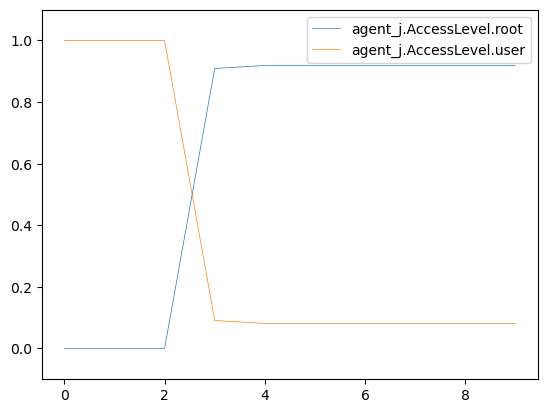

=============DataPrivs============


,state.DataPrivs.root,state.DataPrivs.user,agent_i.action,agent_j.action
0,1.0,0.0,Nop,EnumAccounts
1,1.0,0.0,Nop,EnumAccounts
2,1.0,0.0,DeployDataDecoys,PrivEscAcc
3,1.0,0.0,Nop,FileRecon
4,1.0,0.0,Nop,ManipulateData
5,1.0,0.0,Nop,Exit
6,1.0,0.0,Nop,Nop
7,1.0,0.0,Nop,Nop
8,1.0,0.0,Nop,Nop
9,1.0,0.0,Nop,Nop


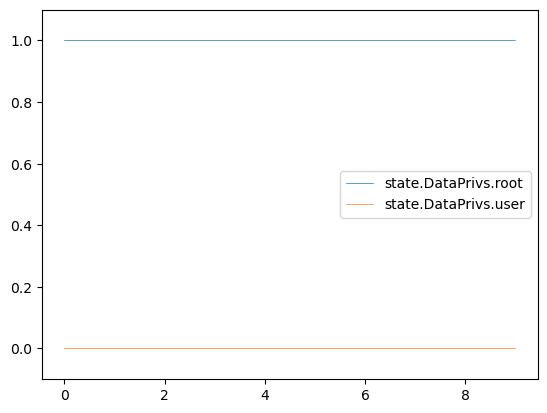

,agent_i.DataPrivs.root,agent_i.DataPrivs.user,agent_i.action,agent_j.action,agent_i.observation.EndPtAlerts'
0,1.0,0.0,Nop,EnumAccounts,file_enum
1,1.0,0.0,Nop,EnumAccounts,file_enum
2,1.0,0.0,DeployDataDecoys,PrivEscAcc,file_enum
3,1.0,0.0,Nop,FileRecon,none
4,1.0,0.0,Nop,ManipulateData,file_enum
5,1.0,0.0,Nop,Exit,none
6,1.0,0.0,Nop,Nop,none
7,1.0,0.0,Nop,Nop,none
8,1.0,0.0,Nop,Nop,none
9,1.0,0.0,Nop,Nop,file_enum


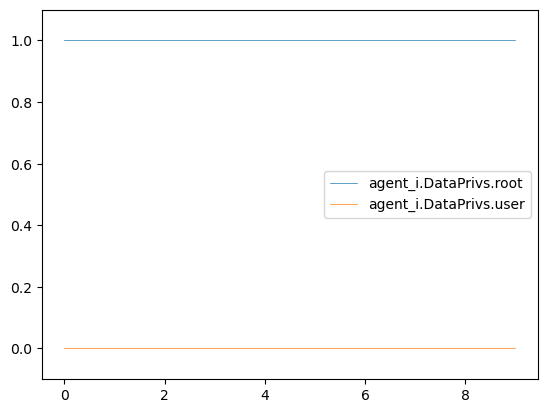

,agent_j.DataPrivs.root,agent_j.DataPrivs.user,agent_j.action,agent_i.action,agent_j.observation.HostObs',agent_j.observation.ActionResult',agent_j.observation.ConnObs'
0,0.500000,0.500000,EnumAccounts,Nop,none,failure,active
1,0.500000,0.500000,EnumAccounts,Nop,none,success,active
2,0.500000,0.500000,PrivEscAcc,DeployDataDecoys,none,success,active
3,0.500000,0.500000,FileRecon,Nop,none,success,active
4,0.494668,0.505332,ManipulateData,Nop,none,success,active
5,0.494668,0.505332,Exit,Nop,none,success,inactive
6,0.494668,0.505332,Nop,Nop,none,success,inactive
7,0.494668,0.505332,Nop,Nop,none,failure,inactive
8,0.494668,0.505332,Nop,Nop,none,success,inactive
9,0.494668,0.505332,Nop,Nop,user_files,success,inactive


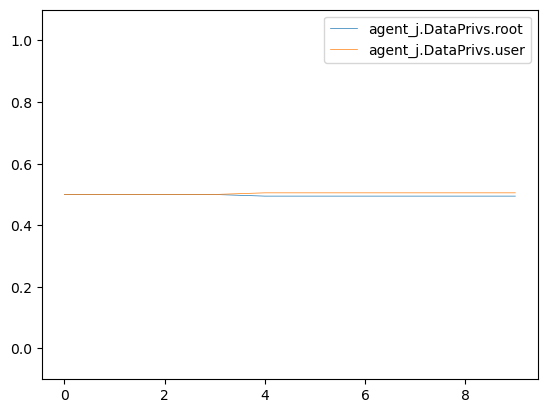

=============EscAccounts============


,state.EscAccounts.no,state.EscAccounts.yes,agent_i.action,agent_j.action
0,0.0,1.0,Nop,EnumAccounts
1,0.0,1.0,Nop,EnumAccounts
2,0.0,1.0,DeployDataDecoys,PrivEscAcc
3,0.0,1.0,Nop,FileRecon
4,0.0,1.0,Nop,ManipulateData
5,0.0,1.0,Nop,Exit
6,0.0,1.0,Nop,Nop
7,0.0,1.0,Nop,Nop
8,0.0,1.0,Nop,Nop
9,0.0,1.0,Nop,Nop


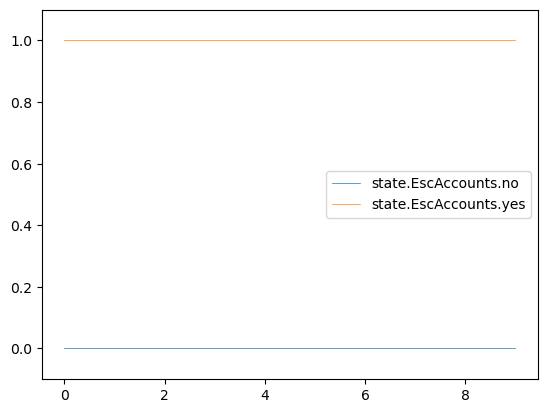

,agent_i.EscAccounts.no,agent_i.EscAccounts.yes,agent_i.action,agent_j.action,agent_i.observation.EndPtAlerts'
0,0.0,1.0,Nop,EnumAccounts,file_enum
1,0.0,1.0,Nop,EnumAccounts,file_enum
2,0.0,1.0,DeployDataDecoys,PrivEscAcc,file_enum
3,0.0,1.0,Nop,FileRecon,none
4,0.0,1.0,Nop,ManipulateData,file_enum
5,0.0,1.0,Nop,Exit,none
6,0.0,1.0,Nop,Nop,none
7,0.0,1.0,Nop,Nop,none
8,0.0,1.0,Nop,Nop,none
9,0.0,1.0,Nop,Nop,file_enum


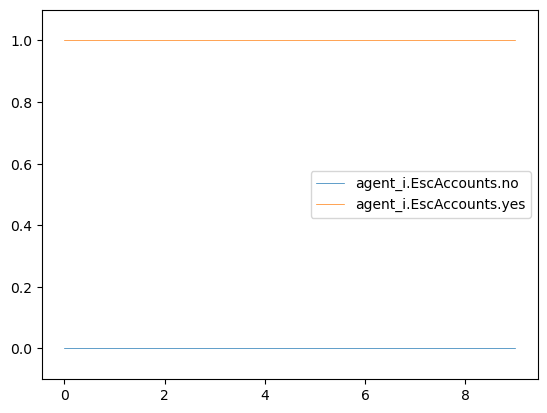

,agent_j.EscAccounts.no,agent_j.EscAccounts.yes,agent_j.action,agent_i.action,agent_j.observation.HostObs',agent_j.observation.ActionResult',agent_j.observation.ConnObs'
0,0.500000,0.500000,EnumAccounts,Nop,none,failure,active
1,0.589321,0.410679,EnumAccounts,Nop,none,success,active
2,0.489602,0.510398,PrivEscAcc,DeployDataDecoys,none,success,active
3,0.090088,0.909912,FileRecon,Nop,none,success,active
4,0.080491,0.919509,ManipulateData,Nop,none,success,active
5,0.080491,0.919509,Exit,Nop,none,success,inactive
6,0.080491,0.919509,Nop,Nop,none,success,inactive
7,0.080491,0.919509,Nop,Nop,none,failure,inactive
8,0.080491,0.919509,Nop,Nop,none,success,inactive
9,0.080491,0.919509,Nop,Nop,user_files,success,inactive


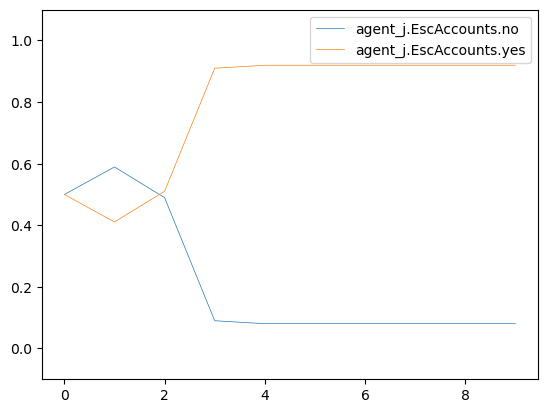

=============AccFound============


,state.AccFound.no,state.AccFound.yes,agent_i.action,agent_j.action
0,1.0,0.0,Nop,EnumAccounts
1,1.0,0.0,Nop,EnumAccounts
2,0.0,1.0,DeployDataDecoys,PrivEscAcc
3,0.0,1.0,Nop,FileRecon
4,0.0,1.0,Nop,ManipulateData
5,0.0,1.0,Nop,Exit
6,0.0,1.0,Nop,Nop
7,0.0,1.0,Nop,Nop
8,0.0,1.0,Nop,Nop
9,0.0,1.0,Nop,Nop


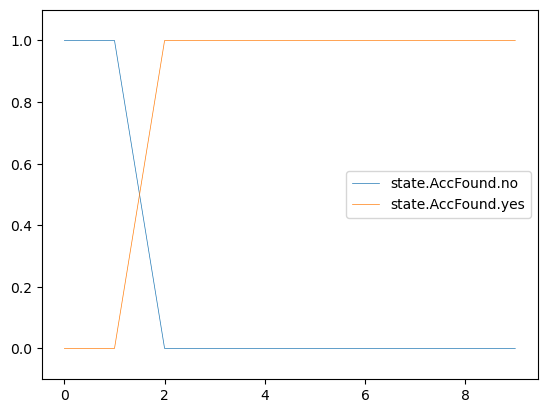

,agent_i.AccFound.no,agent_i.AccFound.yes,agent_i.action,agent_j.action,agent_i.observation.EndPtAlerts'
0,1.000000,0.000000,Nop,EnumAccounts,file_enum
1,0.212500,0.787500,Nop,EnumAccounts,file_enum
2,0.029800,0.970200,DeployDataDecoys,PrivEscAcc,file_enum
3,0.029800,0.970200,Nop,FileRecon,none
4,0.133750,0.866250,Nop,ManipulateData,file_enum
5,0.091285,0.908715,Nop,Exit,none
6,0.133750,0.866250,Nop,Nop,none
7,0.133750,0.866250,Nop,Nop,none
8,0.133750,0.866250,Nop,Nop,none
9,0.133750,0.866250,Nop,Nop,file_enum


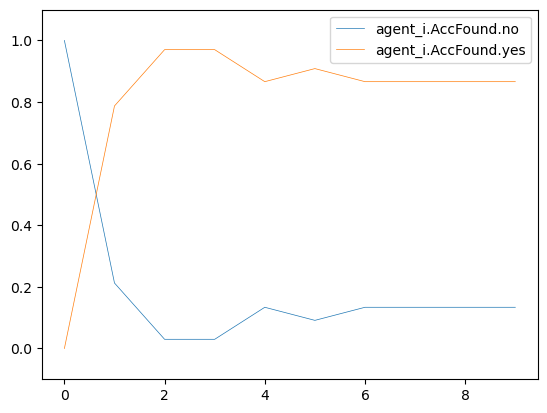

,agent_j.AccFound.no,agent_j.AccFound.yes,agent_j.action,agent_i.action,agent_j.observation.HostObs',agent_j.observation.ActionResult',agent_j.observation.ConnObs'
0,1.000000,0.000000,EnumAccounts,Nop,none,failure,active
1,0.648253,0.351747,EnumAccounts,Nop,none,success,active
2,0.494498,0.505502,PrivEscAcc,DeployDataDecoys,none,success,active
3,0.090989,0.909011,FileRecon,Nop,none,success,active
4,0.081295,0.918705,ManipulateData,Nop,none,success,active
5,0.081295,0.918705,Exit,Nop,none,success,inactive
6,0.081295,0.918705,Nop,Nop,none,success,inactive
7,0.081295,0.918705,Nop,Nop,none,failure,inactive
8,0.081295,0.918705,Nop,Nop,none,success,inactive
9,0.081295,0.918705,Nop,Nop,user_files,success,inactive


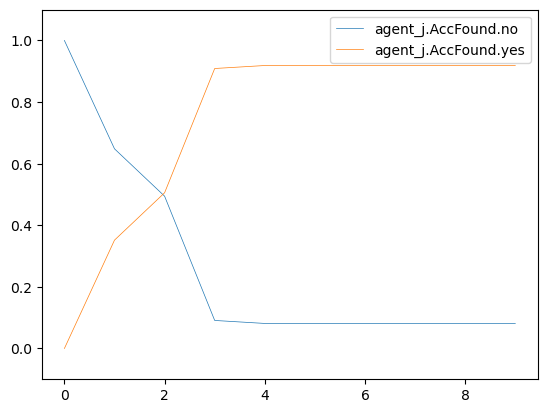

=============HostHasData============


,state.HostHasData.no,state.HostHasData.yes,agent_i.action,agent_j.action
0,1.0,0.0,Nop,EnumAccounts
1,1.0,0.0,Nop,EnumAccounts
2,1.0,0.0,DeployDataDecoys,PrivEscAcc
3,0.0,1.0,Nop,FileRecon
4,0.0,1.0,Nop,ManipulateData
5,0.0,1.0,Nop,Exit
6,0.0,1.0,Nop,Nop
7,0.0,1.0,Nop,Nop
8,0.0,1.0,Nop,Nop
9,0.0,1.0,Nop,Nop


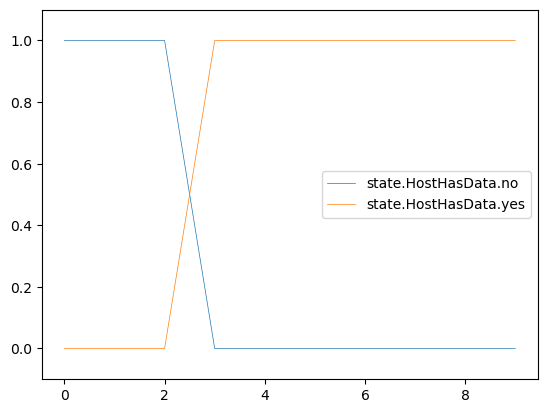

,agent_i.HostHasData.no,agent_i.HostHasData.yes,agent_i.action,agent_j.action,agent_i.observation.EndPtAlerts'
0,1.0,0.0,Nop,EnumAccounts,file_enum
1,1.0,0.0,Nop,EnumAccounts,file_enum
2,1.0,0.0,DeployDataDecoys,PrivEscAcc,file_enum
3,0.0,1.0,Nop,FileRecon,none
4,0.0,1.0,Nop,ManipulateData,file_enum
5,0.0,1.0,Nop,Exit,none
6,0.0,1.0,Nop,Nop,none
7,0.0,1.0,Nop,Nop,none
8,0.0,1.0,Nop,Nop,none
9,0.0,1.0,Nop,Nop,file_enum


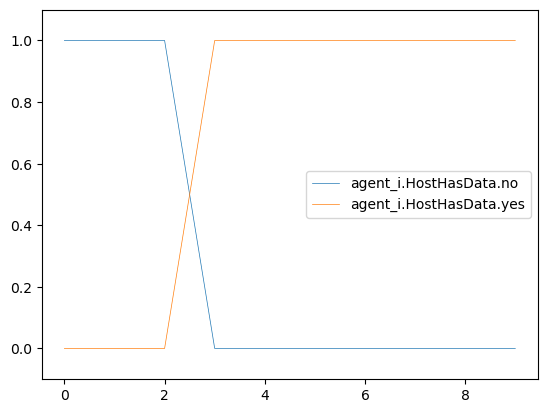

,agent_j.HostHasData.no,agent_j.HostHasData.yes,agent_j.action,agent_i.action,agent_j.observation.HostObs',agent_j.observation.ActionResult',agent_j.observation.ConnObs'
0,0.500000,0.500000,EnumAccounts,Nop,none,failure,active
1,0.500000,0.500000,EnumAccounts,Nop,none,success,active
2,0.500000,0.500000,PrivEscAcc,DeployDataDecoys,none,success,active
3,0.344262,0.655738,FileRecon,Nop,none,success,active
4,0.265795,0.734205,ManipulateData,Nop,none,success,active
5,0.265795,0.734205,Exit,Nop,none,success,inactive
6,0.265795,0.734205,Nop,Nop,none,success,inactive
7,0.265795,0.734205,Nop,Nop,none,failure,inactive
8,0.265795,0.734205,Nop,Nop,none,success,inactive
9,0.265795,0.734205,Nop,Nop,user_files,success,inactive


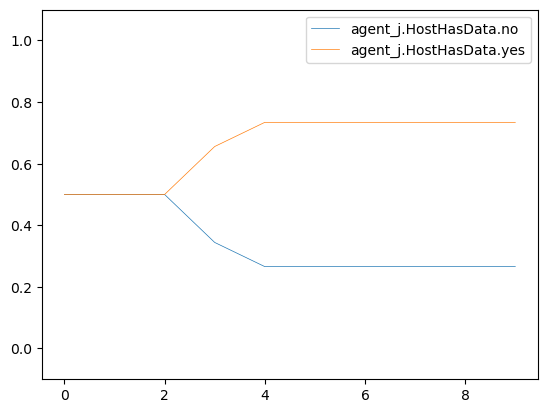

=============AttActive============


,state.AttActive.no,state.AttActive.yes,agent_i.action,agent_j.action
0,0.0,1.0,Nop,EnumAccounts
1,0.0,1.0,Nop,EnumAccounts
2,0.0,1.0,DeployDataDecoys,PrivEscAcc
3,0.0,1.0,Nop,FileRecon
4,0.0,1.0,Nop,ManipulateData
5,0.0,1.0,Nop,Exit
6,1.0,0.0,Nop,Nop
7,1.0,0.0,Nop,Nop
8,1.0,0.0,Nop,Nop
9,1.0,0.0,Nop,Nop


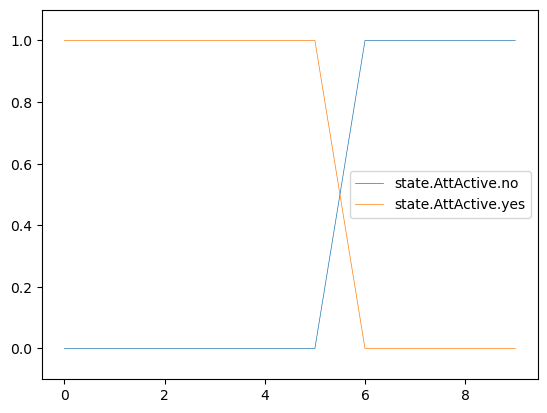

,agent_i.AttActive.no,agent_i.AttActive.yes,agent_i.action,agent_j.action,agent_i.observation.EndPtAlerts'
0,0.500000,0.500000,Nop,EnumAccounts,file_enum
1,0.125000,0.875000,Nop,EnumAccounts,file_enum
2,0.020000,0.980000,DeployDataDecoys,PrivEscAcc,file_enum
3,0.020000,0.980000,Nop,FileRecon,none
4,0.125000,0.875000,Nop,ManipulateData,file_enum
5,0.063042,0.936958,Nop,Exit,none
6,0.836200,0.163800,Nop,Nop,none
7,1.000000,0.000000,Nop,Nop,none
8,1.000000,0.000000,Nop,Nop,none
9,1.000000,0.000000,Nop,Nop,file_enum


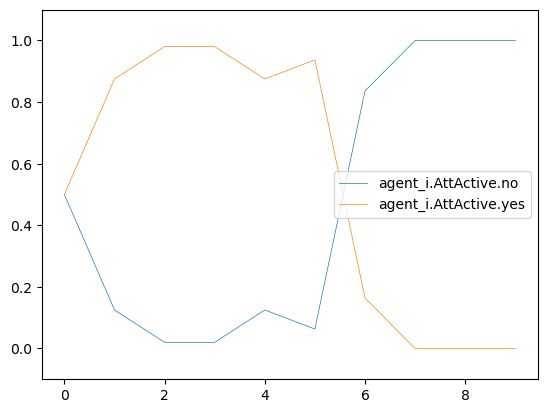

,agent_j.AttActive.no,agent_j.AttActive.yes,agent_j.action,agent_i.action,agent_j.observation.HostObs',agent_j.observation.ActionResult',agent_j.observation.ConnObs'
0,0.0,1.0,EnumAccounts,Nop,none,failure,active
1,0.0,1.0,EnumAccounts,Nop,none,success,active
2,0.0,1.0,PrivEscAcc,DeployDataDecoys,none,success,active
3,0.0,1.0,FileRecon,Nop,none,success,active
4,0.0,1.0,ManipulateData,Nop,none,success,active
5,0.0,1.0,Exit,Nop,none,success,inactive
6,1.0,0.0,Nop,Nop,none,success,inactive
7,1.0,0.0,Nop,Nop,none,failure,inactive
8,1.0,0.0,Nop,Nop,none,success,inactive
9,1.0,0.0,Nop,Nop,user_files,success,inactive


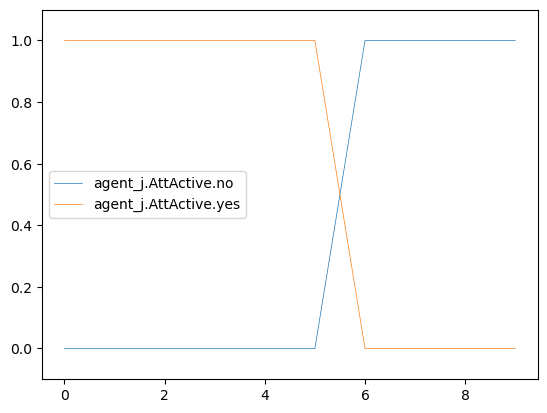

=============DataInjected============


,state.DataInjected.no,state.DataInjected.yes,agent_i.action,agent_j.action
0,1.0,0.0,Nop,EnumAccounts
1,1.0,0.0,Nop,EnumAccounts
2,1.0,0.0,DeployDataDecoys,PrivEscAcc
3,1.0,0.0,Nop,FileRecon
4,1.0,0.0,Nop,ManipulateData
5,0.0,1.0,Nop,Exit
6,0.0,1.0,Nop,Nop
7,0.0,1.0,Nop,Nop
8,0.0,1.0,Nop,Nop
9,0.0,1.0,Nop,Nop


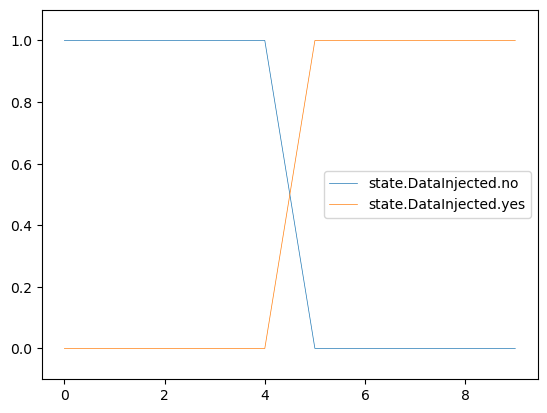

,agent_i.DataInjected.no,agent_i.DataInjected.yes,agent_i.action,agent_j.action,agent_i.observation.EndPtAlerts'
0,1.000000,0.000000,Nop,EnumAccounts,file_enum
1,1.000000,0.000000,Nop,EnumAccounts,file_enum
2,1.000000,0.000000,DeployDataDecoys,PrivEscAcc,file_enum
3,1.000000,0.000000,Nop,FileRecon,none
4,1.000000,0.000000,Nop,ManipulateData,file_enum
5,0.646125,0.353875,Nop,Exit,none
6,0.150209,0.849791,Nop,Nop,none
7,0.150209,0.849791,Nop,Nop,none
8,0.150209,0.849791,Nop,Nop,none
9,0.150209,0.849791,Nop,Nop,file_enum


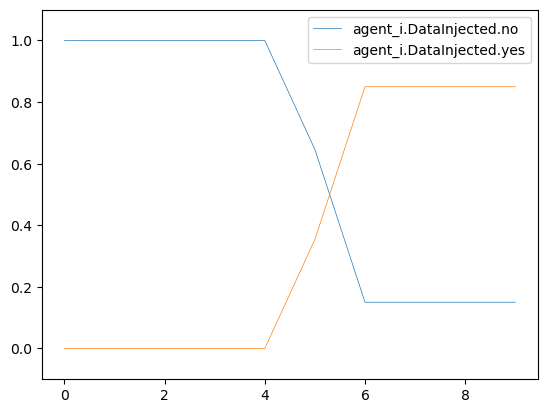

,agent_j.DataInjected.no,agent_j.DataInjected.yes,agent_j.action,agent_i.action,agent_j.observation.HostObs',agent_j.observation.ActionResult',agent_j.observation.ConnObs'
0,1.000000,0.000000,EnumAccounts,Nop,none,failure,active
1,1.000000,0.000000,EnumAccounts,Nop,none,success,active
2,1.000000,0.000000,PrivEscAcc,DeployDataDecoys,none,success,active
3,1.000000,0.000000,FileRecon,Nop,none,success,active
4,1.000000,0.000000,ManipulateData,Nop,none,success,active
5,0.337744,0.662256,Exit,Nop,none,success,inactive
6,0.337744,0.662256,Nop,Nop,none,success,inactive
7,0.337744,0.662256,Nop,Nop,none,failure,inactive
8,0.337744,0.662256,Nop,Nop,none,success,inactive
9,0.337744,0.662256,Nop,Nop,user_files,success,inactive


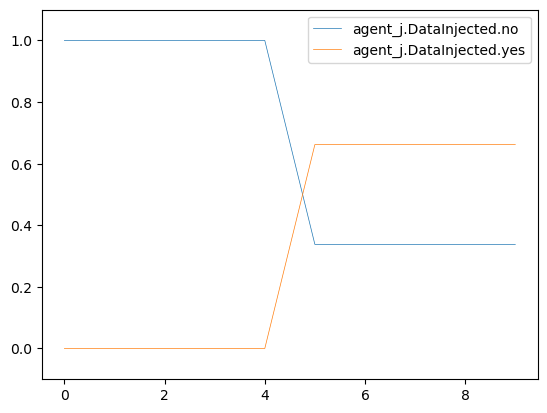

+++++++++++++++++++ End Interaction +++++++++++++++++++


In [7]:
# Get belief over opponent frames
def get_opponent_frame(dataframe):
    
    thetaj_columns = list(filter(lambda x: "thetaj" in x.split("."), dataframe))
    
    if len(thetaj_columns) > 0:
        return dataframe[thetaj_columns]
    
    else:
        return None

# Print and plot P(Theta_j)
def print_thetaj_belief(belief_thetaj_df, obs):
    df = pandas.concat([belief_thetaj_df, obs], axis=1)
    display(df)
    df.plot(linewidth=0.5)
    plotter.ylim(-0.1, 1.1)
    plotter.show()

# Summarize beliefs
def summarize_beliefs(state_vars, dataframe):
    print(f"+++++++++++++++++++ Begin Interaction +++++++++++++++++++")
    agent_i_data = filter_columns_by_agent(dataframe, "agent_i")
    agent_j_data = filter_columns_by_agent(dataframe, "agent_j")
    states = filter_columns_by_agent(dataframe, "state")
    
    actions_i = filter_columns_by_state(agent_i_data, "action")
    actions_j = filter_columns_by_state(agent_j_data, "action")
    
    obs_i = filter_columns_by_state(agent_i_data, "observation")
    obs_j = filter_columns_by_state(agent_j_data, "observation")
    
    i_belief_thetaj = get_opponent_frame(agent_i_data)
    if i_belief_thetaj is not None:
        print_thetaj_belief(i_belief_thetaj, obs_i)
    
    j_belief_thetaj = get_opponent_frame(agent_j_data)
    if j_belief_thetaj is not None:
        print_thetaj_belief(j_belief_thetaj, obs_j)
    
    for var in state_vars:
        # if var != "HostType":
        #     continue
        print(f"============={var}============")
        # show state
        state_values = filter_columns_by_state(states, var)
        state_values = pandas.concat([state_values, actions_i, actions_j], axis = 1)
        display(state_values)
        state_values.plot(linewidth=0.5)
        plotter.ylim(-0.1, 1.1)
        plotter.show()
        
        # show agent i
        agent_i_beliefs = filter_columns_by_state(agent_i_data, var)
        agent_i_beliefs = pandas.concat([agent_i_beliefs, actions_i, actions_j, obs_i], axis = 1)
        display(agent_i_beliefs)
        agent_i_beliefs.plot(linewidth=0.5)
        plotter.ylim(-0.1, 1.1)
        plotter.show()
        
        # show agent j
        agent_j_beliefs = filter_columns_by_state(agent_j_data, var)
        agent_j_beliefs = pandas.concat([agent_j_beliefs, actions_j, actions_i, obs_j], axis = 1)
        display(agent_j_beliefs)
        agent_j_beliefs.plot(linewidth=0.5)
        plotter.ylim(-0.1, 1.1)
        plotter.show()
        print("==============================")
    
    print(f"+++++++++++++++++++ End Interaction +++++++++++++++++++")

# Use state data to figure out the state variables
def get_state_vars(columns):
    
    states = filter(lambda x: "state" in x.split(".") and len(x.split(".")) >= 2, columns)
    state_vars = map(lambda x: x.split(".")[1], states)
    
    return list(set(state_vars))

# Fetch dataframe with columns belonging to a particular agent
def filter_columns_by_agent(dataframe, name):
    columns = dataframe.columns
    filtered_columns = list(filter(lambda x: name in x.split("."), columns))
    
    df = dataframe[filtered_columns]
    return df

# Get columns containing the state name in the header
def filter_columns_by_state(dataframe, state):
    filtered_columns = list(filter(lambda x: state in x.split("."), dataframe.columns))
    return dataframe[filtered_columns]

# Main loop to summarize all traces
for trace in TRACE_FILES[:5]:
    data = load_json(trace)
    
    dataframe = pandas.json_normalize(data)    
    state_vars = get_state_vars(dataframe.columns)
    
    summarize_beliefs(state_vars, dataframe)
    